# Import Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import gc

import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

from datetime import datetime
import datetime as dt

from scipy.stats import kruskal, rankdata
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

from statsmodels.graphics.gofplots import qqplot
from scipy.stats.distributions import norm
from scipy.stats import shapiro,anderson


!pip install scikit-posthocs
import scikit_posthocs as sp

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.expand_frame_repr', False)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Defaulting to user installation because normal site-packages is not writeable


# Import Dataset

In [2]:
data = pd.read_csv(r"C:\Users\dell\Downloads\Global Video Games Analysis\Video Games Sales.csv")

In [3]:
df = data.copy()

In [4]:
df.drop(columns = 'index', inplace = True)

# Overview of the Dataset

In [5]:
def check_df(dataset, head = 5):
    print("-"*10 + ' Shape Information of Dataset ' + "-"*10, end = '\n'*2)
    print(f" The dataset consist of {dataset.shape[0]} rows & {dataset.shape[1]} columns", end = '\n'*2)
    print("-"*10 + ' General informations about to Dataset ' + "-"*10, end = '\n'*2)
    print(dataset.info(), end = '\n'*2)
    print("-"*10 + " Are there any null values in the dataset? " + "-"*10, end = '\n'*2)
    print(dataset.isnull().sum(), end = '\n'*2)
    print("-"*10 + " Are there any dublicated values in the dataset? " + "-"*10, end = '\n'*2)
    print(dataset[dataset.duplicated()].shape[0], end = '\n'*2)
    print("-"*10 + " What is the Number of Unique Classes in the Variables ? " + ' ' + "-"*10, end = '\n'*2)
    print(dataset.nunique(), end = '\n'*2)
    print('-'*10 + ' Descriptive Statistics of Numerical Features ' + "-"*10, end = '\n'*2)
    print(dataset.describe().T, end = '\n'*2)
    print("-"*10 + 'Quantiles of Numerical Features' + "-"*10, end ='\n'*2)
    print(dataset.describe([0,0.25, 0.50,0.75,1.0]).T, end = '\n'*2)

- I am writing the check_df function above to get information about the general structure of the dataset. With this, I am getting information about the dataframe,

    - Shape,
    - Number of empty values ​​of variables,
    - Type of variables in the dataset,
    - Statistics of numerical variables.

In [6]:
check_df(df)

---------- Shape Information of Dataset ----------

 The dataset consist of 1907 rows & 12 columns

---------- General informations about to Dataset ----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1907 non-null   int64  
 1   Game Title     1907 non-null   object 
 2   Platform       1907 non-null   object 
 3   Year           1878 non-null   float64
 4   Genre          1907 non-null   object 
 5   Publisher      1905 non-null   object 
 6   North America  1907 non-null   float64
 7   Europe         1907 non-null   float64
 8   Japan          1907 non-null   float64
 9   Rest of World  1907 non-null   float64
 10  Global         1907 non-null   float64
 11  Review         1907 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 178.9+ KB
None

---------- Are there any null values in the da

- When I look at the outputs of the function, I see that there are missing values ​​in some variables in the values ​​returned by df.info().

- I want to fill these values ​​as the first step to complete-clean my dataset. Normally, categorical variables can be filled according to the Mode value of the series, or numerical values ​​can be filled with median or mean values ​​depending on the distribution of the series. But since the number of missing values ​​is low, I fill in my missing values ​​with a simple Google Search.

In [7]:
df.loc[(df['Publisher'].isnull()) & (df['Game Title'] == 'wwe Smackdown vs. Raw 2006'), 'Publisher'] = 'THQ'
df.loc[(df['Publisher'].isnull()) & (df['Game Title'] == 'Triple Play 99'), 'Publisher'] = 'Electronic Arts'

df.loc[(df['Year'].isnull()) & (df['Game Title'] == 'Blitz: The League'), 'Year'] = 2005
df.loc[(df['Year'].isnull()) & (df['Game Title'] == 'Call of Duty 3'), 'Year'] = 2006
df.loc[(df['Year'].isnull()) & (df['Game Title'] == 'Call of Duty: Black Ops'), 'Year'] = 2010
df.loc[(df['Year'].isnull()) & (df['Game Title'] == 'Donkey Kong Land III'), 'Year'] = 1997
df.loc[(df['Year'].isnull()) & (df['Game Title'] == 'Dragon Warrior VII'), 'Year'] = 2001
df.loc[(df['Year'].isnull()) & (df['Game Title'] == 'FIFA Soccer 2004'), 'Year'] = 2004
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "Frogger's Adventures: Temple of the Frog"), 'Year'] = 2001
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "Gran Turismo Concept 2001 Tokyo"), 'Year'] = 2002
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "Hitman 2: Silent Assassin"), 'Year'] = 2002
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "LEGO Batman: The Videogame"), 'Year'] = 2008
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "LEGO Harry Potter: Years 5-7"), 'Year'] = 2011
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "LEGO Indiana Jones: The Original Adventures"), 'Year'] = 2008
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "Legacy of Kain: Soul Reaver"), 'Year'] = 1999
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "Madden NFL 07"), 'Year'] = 2006
df.loc[(df['Year'].isnull()) & (df['Game Title'] == 'Madden NFL 2004'), 'Year'] = 2003
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "NASCAR Thunder 2003"), 'Year'] = 2002
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "Namco Museum"), 'Year'] = 1995
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "Rock Band"), 'Year'] = 2007
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "RollerCoaster Tycoon"), 'Year'] = 1999
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "Suikoden III"), 'Year'] = 2002
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "Teenage Mutant Ninja Turtles"), 'Year'] = 2003
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "Triple Play 99"), 'Year'] = 1998
df.loc[(df['Year'].isnull()) & (df['Game Title'] == "Wheel of Fortune"), 'Year'] = 2003
df.loc[(df['Year'].isnull()) & (df['Game Title'] == 'wwe Smackdown vs. Raw 2006'), 'Year'] = 2005
df.loc[(df['Year'].isnull()) & (df['Game Title'] == 'Yakuza 4'), 'Year'] = 2010

In [8]:
check_df(df)

---------- Shape Information of Dataset ----------

 The dataset consist of 1907 rows & 12 columns

---------- General informations about to Dataset ----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1907 non-null   int64  
 1   Game Title     1907 non-null   object 
 2   Platform       1907 non-null   object 
 3   Year           1907 non-null   float64
 4   Genre          1907 non-null   object 
 5   Publisher      1907 non-null   object 
 6   North America  1907 non-null   float64
 7   Europe         1907 non-null   float64
 8   Japan          1907 non-null   float64
 9   Rest of World  1907 non-null   float64
 10  Global         1907 non-null   float64
 11  Review         1907 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 178.9+ KB
None

---------- Are there any null values in the da

# Data Cleaning & Data Manipulation

In [9]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year']= df['Year'].dt.year

Thinking that I might need to do time-based analysis, I convert the Year variable in the dataset to datetime format.

In [10]:
platform_type = ["Home Video Game Console", "Handheld Video Game Console", "Computer/PC"]
home_video = "GC|PS2|PS|X360|PS3|Wii|XB|NES|N64|GC|SNES|DC|SAT|WiiU|GEN|SCD"
handheld = "DS|GBA|PSP|GB|3DS|PSV"
pc = "PC"

conditions = [
            (df["Platform"].str.contains(home_video)), 
            (df["Platform"].str.contains(handheld)),   
            (df["Platform"].str.contains(pc)),  
            ]

df["Platform_Type"] = np.select(conditions,
                                    platform_type,
                                    default="Other")

In the second stage of the Data Manipulation steps, I create the Platform_Type variable using the values ​​of the variable named Platform. In order to obtain more generalizable information, I separate the platforms such as Home Video Game Console, Hanheld Console and PC in my Platform Type variable.

In [11]:
generation_type = ['3rd Gen.','4th Gen.', '5th Gen.', '6th Gen.', 
                   '7th Gen.', '8th Gen.', 'All Generation\PC']

third_gen = 'NES'
fourth_gen = 'GB|SNES|SCD|GEN'
fifth_gen = 'PS|XB|N64|SAT'
sixth_gen = 'PS2|GBA|GC|DC'
seventh_gen = 'X360|PS3|Wii|DS|PSP|WiiU'
eigth_gen = '3DS|PSV'
all_gen = 'PC'

conditions_ = [
            (df["Platform"].str.contains(third_gen)), 
            (df["Platform"].str.contains(fourth_gen)),   
            (df["Platform"].str.contains(fifth_gen)),  
            (df["Platform"].str.contains(sixth_gen)), 
            (df["Platform"].str.contains(seventh_gen)), 
            (df["Platform"].str.contains(eigth_gen)), 
            (df["Platform"].str.contains(all_gen)), 
            ]

df["Generation"] = np.select(conditions_,
                                    generation_type,
                                    default="Other")

We all agree that published games evolve over time. For example, when we compare FIFA 2005 for Playstation 2 and EAFC 2024 for Playstation 5, we can clearly see the difference between these generations. For this, I create the Generation variable using the Platform names.

In [12]:
pd.crosstab(df["Platform_Type"], df["Genre"])

Genre                        Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  Role-Playing  Shooter  Simulation  Sports  Strategy
Platform_Type                                                                                                                                
Computer/PC                       3          4         0     3         0       0       0            14       10          16       3        18
Handheld Video Game Console      24         34         2    31        57      23      10            53        2          30      10        11
Home Video Game Console         248         72       124   125       131      21     176           106      194          46     295        11

- When we examine the number of games published in different game categories on different console types, we see that the most games are published in the Home Console type. In the game category, there are more games in the Platform, Role Play and Adventure genres published by publishers in the dataset. First, let's see how many games are in the dataset according to platform type.

In [13]:
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' {v:d}'.format(v=val)
    return my_format

I am defining a function to use in Data Visualization operations. With this function, I will be able to display float values ​​in a more proper format in the graphics I will create.

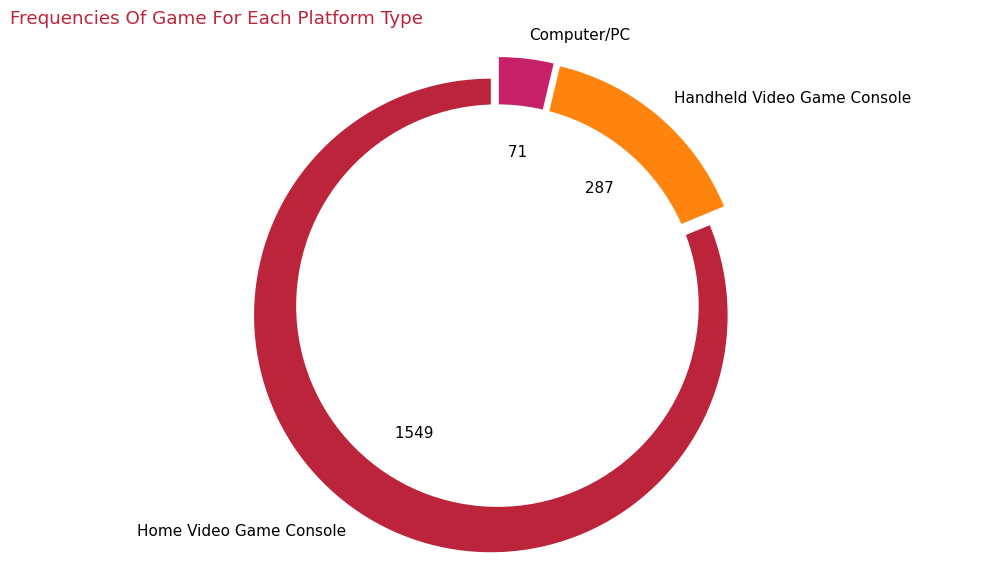

In [14]:
platform_type = df.groupby('Platform_Type', as_index = False).agg({"Game Title":"count"}).rename(columns = {"Game Title" : "Count", "Platform_Type":"Platform_Type"}).sort_values(by = "Count", ascending = False)


plt.rcParams["figure.figsize"] = (10,6) 
plt.rcParams['font.size'] = 11.0 
plt.rcParams['font.weight'] = 6 
colors = ['#BC243C','#FE840E','#C62168'] 
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(platform_type['Count'], colors = colors, labels=platform_type['Platform_Type'], autopct= autopct_format(platform_type['Count']),startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.85,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal') 
ax1.set_title("Frequencies Of Game For Each Platform Type", loc = 'left', color = '#BC243C')
plt.tight_layout()
del platform_type
plt.show()

- In this chart, we see that more games are shared in the Home Video Game Console type. At least there are Computer / PC type games.
- As you can see, we are working with an Imbalanced dataset.

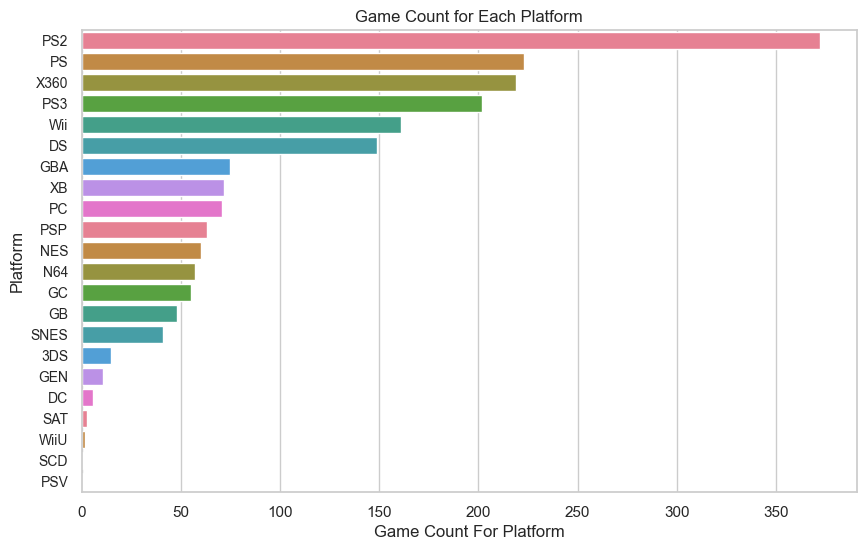

In [15]:
plt.figure(figsize=(10, 6))
sns.set_theme(style = "whitegrid")
custom_palette = sns.color_palette("husl", 9)
platform_counts = df['Platform'].value_counts().sort_values(ascending=False).reset_index()
platform_chart = sns.barplot(data = platform_counts, y = 'Platform',x = "count", palette = custom_palette)
#set(xlabel = 'Genre', ylabel = 'Count Of Platform Type', title = 'Genre vs Platform Type')
platform_chart.set_ylabel("Platform")
platform_chart.set_xlabel("Game Count For Platform")
platform_chart.set_title("Game Count for Each Platform",)
platform_chart.set_yticklabels(
    platform_chart.get_yticklabels(), 
    fontsize = 10
)


#sns.move_legend(chart, "upper left", bbox_to_anchor=(1, 1))
del platform_counts
del platform_chart
plt.show()

- When I examine the records in the data set, we see that the PS2 console is the console with the most records. This is not an interesting situation. Because PS2 is currently the game console that sells the most copies worldwide.

- The PS2 console is followed by another Sony product. In the chart, the PS console has the highest number of recordings after PS2. These two consoles are followed by XBOX360, Wii and PS3 consoles.

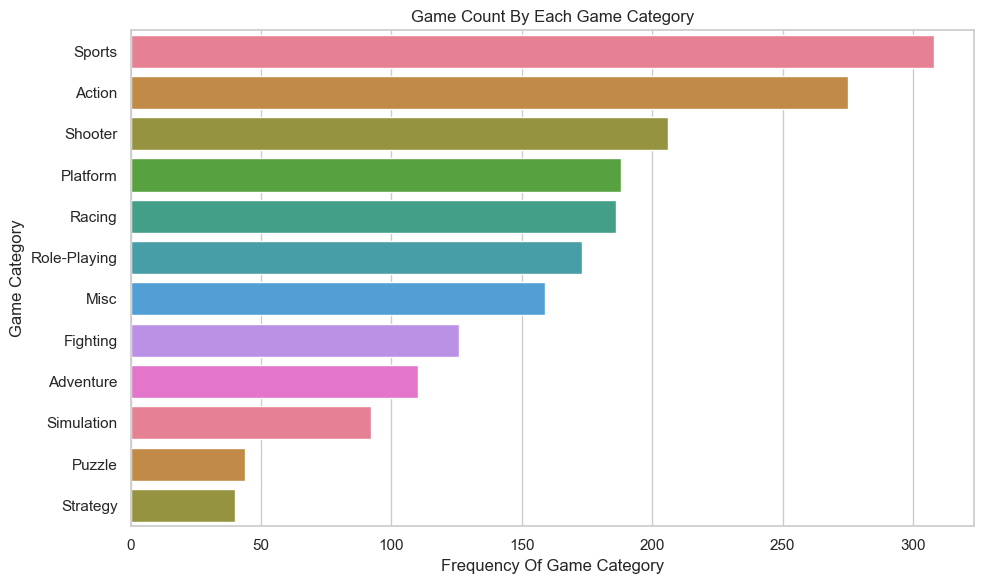

In [16]:
plt.figure(figsize=(10, 6))
sns.set_theme(style = "whitegrid")
custom_palette = sns.color_palette("husl", 9)
genre_counts = df['Genre'].value_counts().sort_values(ascending=False).reset_index()
genre_chart = sns.barplot(data = genre_counts, y = 'Genre',x = 'count', palette = custom_palette)
genre_chart.set_ylabel("Game Category")
genre_chart.set_xlabel("Frequency Of Game Category")
genre_chart.set_title("Game Count By Each Game Category")
genre_chart.set_yticklabels(genre_chart.get_yticklabels(), fontsize=11)
plt.tight_layout()
del genre_counts
del genre_chart

plt.show()

- When the records in the dataset are examined from the Game Category perspective, it is seen that the most records are in the Sport, Action and Shooter categories.

- The least number of registrations appear to be in the Puzzle, Strategy and Simulation categories.

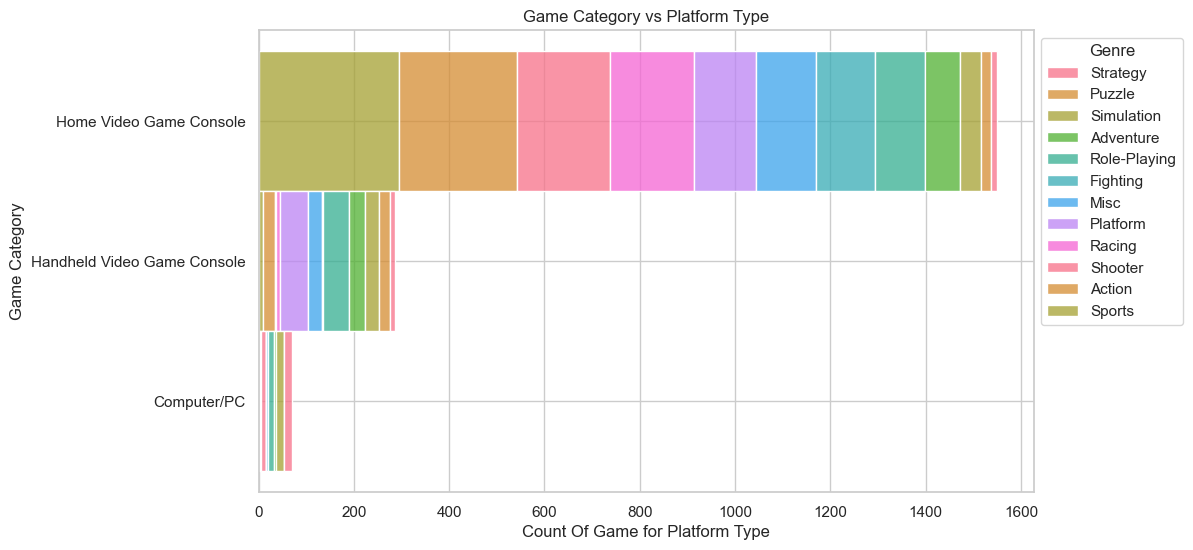

In [17]:
plt.figure(figsize=(10, 6))

platform_types_genres = df.groupby(['Platform_Type','Genre']).agg({'Game Title':'count'}).rename(columns = {'Game Title': 'Count'}).reset_index().sort_values(by = ['Platform_Type','Count'], ascending = [False, True])
custom_palette = sns.color_palette("husl", 9)
cat_plat_plot = sns.histplot(platform_types_genres, y='Platform_Type', hue='Genre', weights='Count', multiple='stack', palette=custom_palette)
cat_plat_plot.set_ylabel("Game Category")
cat_plat_plot.set_xlabel("Count Of Game for Platform Type")
cat_plat_plot.set_title("Game Category vs Platform Type")
cat_plat_plot.set_xticklabels(
    cat_plat_plot.get_xticklabels(), 
fontsize = 11
)
sns.move_legend(cat_plat_plot, "upper left", bbox_to_anchor=(1, 1))
sns.set_theme(style = "whitegrid")

del platform_types_genres
del cat_plat_plot

plt.show()

- When we break down game genres according to platform genres, we see that there are more registrations for Home Video game consoles.

- The game types with the most records among handheld consoles are Platform, Role-Playing and Adventure types.

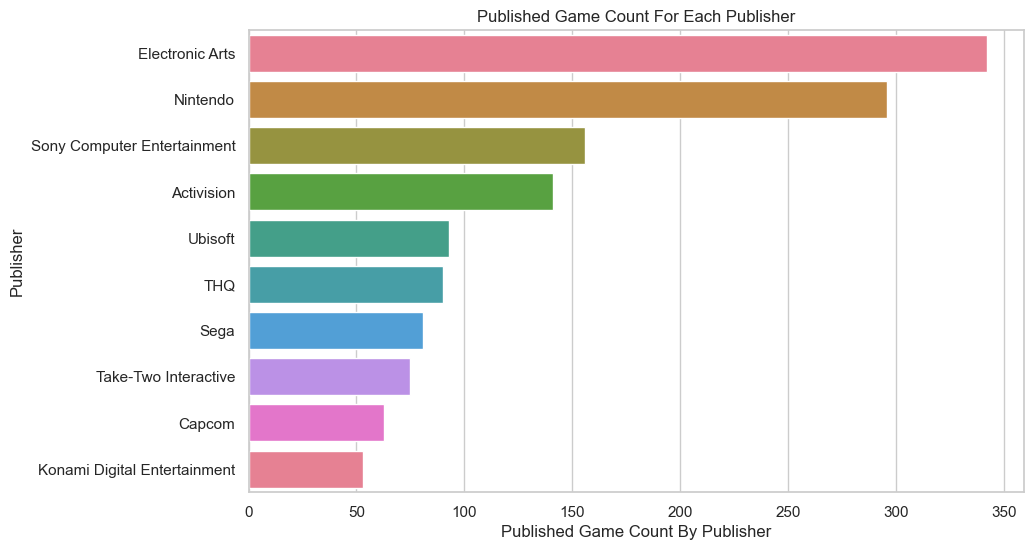

In [18]:
publisher_group = df.groupby("Publisher", as_index = False).agg({"Rank" : "count"}).rename(columns = {"Rank": 'Count'}).sort_values(by = 'Count', ascending = False)[:10]


plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("husl", 9)
publisher_chart = sns.barplot(data = publisher_group, y = 'Publisher',x = 'Count', palette = custom_palette)

publisher_chart.set_ylabel("Publisher")
publisher_chart.set_xlabel("Published Game Count By Publisher")
publisher_chart.set_title("Published Game Count For Each Publisher",)
publisher_chart.set_yticklabels(
    publisher_chart.get_yticklabels(),  
    fontsize = 11
)
#sns.move_legend(chart, "upper left", bbox_to_anchor=(1, 1))
sns.set_theme(style = "whitegrid")

del publisher_group
del publisher_chart

plt.show()

- When the frequency frequencies of the Publisher values in the data set are examined, it is seen that the most records belong to the Electronic Arts company. Electronic arts is followed by Nintendo and Sony Computer companies.

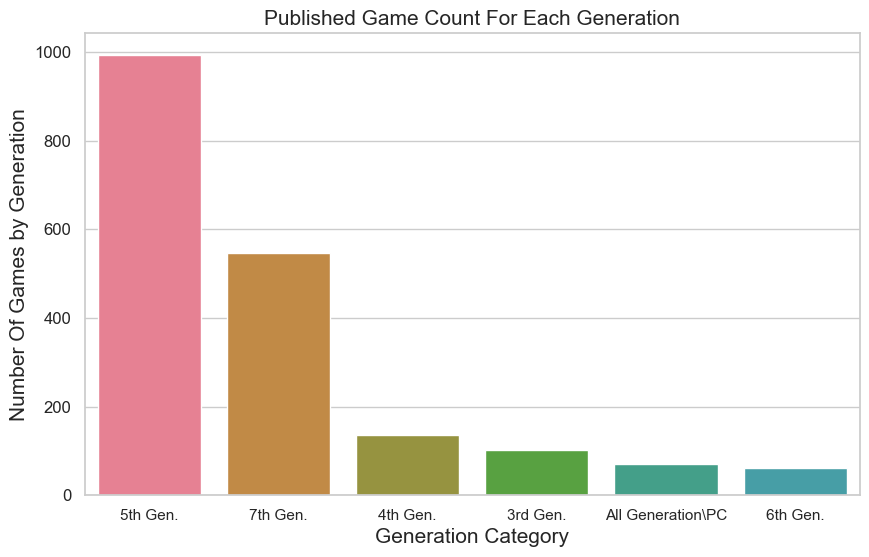

In [19]:
generation_group = df.groupby("Generation", as_index = False).agg({"Rank" : "count"}).rename(columns = {"Rank": 'Count'}).sort_values(by = 'Count', ascending = False)


plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("husl", 9)
generation_chart = sns.barplot(data = generation_group, x = 'Generation',y = 'Count', palette = custom_palette)

generation_chart.set_xlabel("Generation Category", fontsize = 15)
generation_chart.set_ylabel("Number Of Games by Generation", fontsize = 15)
generation_chart.set_title("Published Game Count For Each Generation", fontsize = 15)
generation_chart.set_yticklabels(
    generation_chart.get_yticklabels(),  
    fontsize = 12
)
#sns.move_legend(chart, "upper left", bbox_to_anchor=(1, 1))
sns.set_theme(style = "whitegrid")

del generation_group
del generation_chart

plt.show()

- When I examine the frequency of game consoles in the data set according to Generation information, we see that 5th generation consoles are in majority in the data set.

- After creating some countplots on the class frequencies in different categorical variables in the dataset, I will advance our study on more important variables of the dataset. Let's continue to gain insights from the data with visualizations on the Review variable, which shows the evaluation score, and the North America, Japan, Rest Of World and global variables, which express sales values.

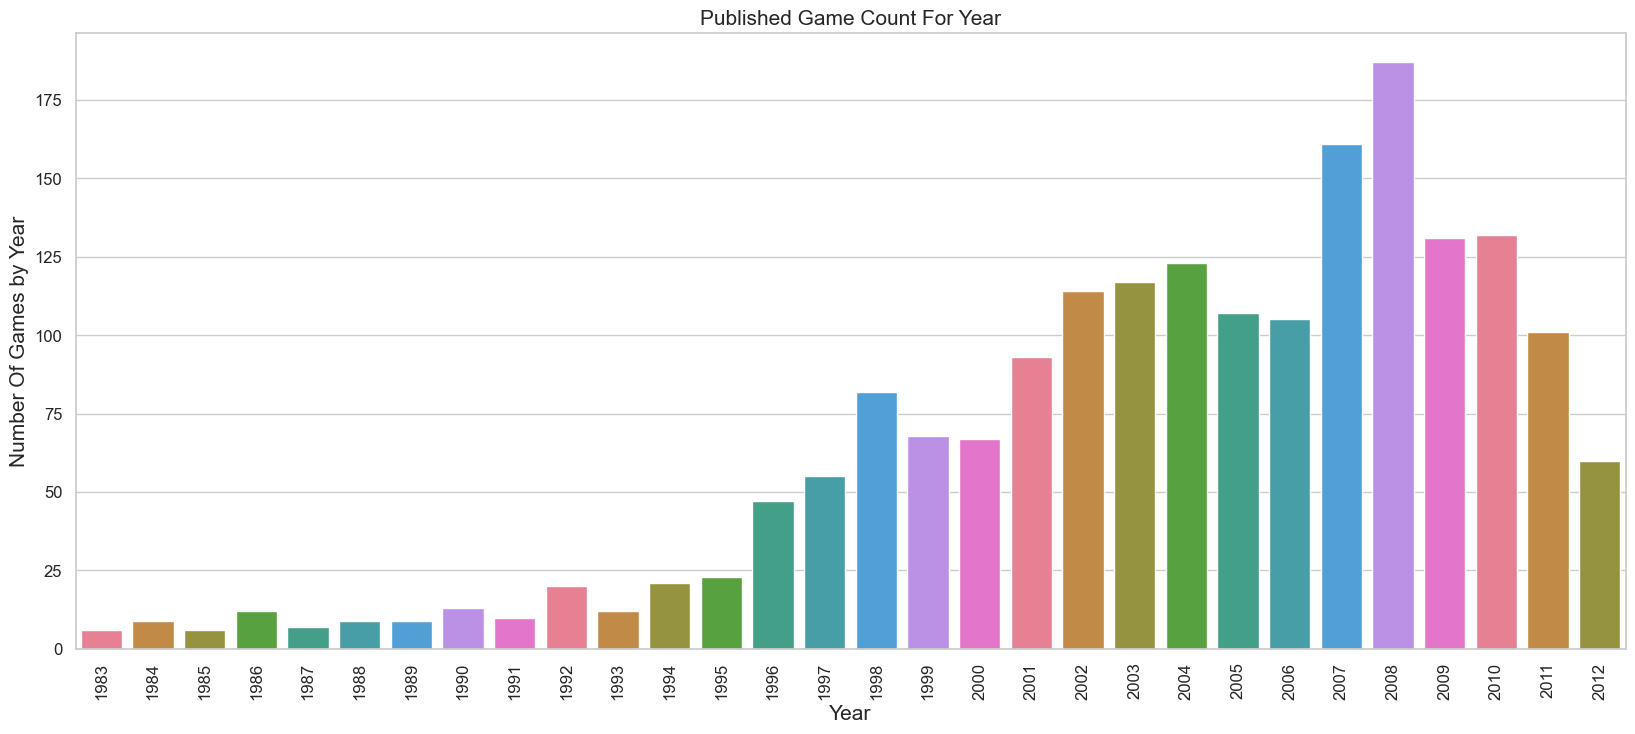

In [20]:
year_group = df.groupby('Year', as_index = False).agg({'Game Title':'count'}).rename(columns = {'Game Title': 'Count'}).sort_values(by = 'Year', ascending = True)

plt.figure(figsize = (20,8))
custom_palette = sns.color_palette("husl", 9)
year_chart = sns.barplot(data = year_group, x = 'Year', y = 'Count', palette = custom_palette)

year_chart.set_xlabel("Year", fontsize = 15)
year_chart.set_ylabel("Number Of Games by Year", fontsize = 15)
year_chart.set_title("Published Game Count For Year",fontsize = 15)
year_chart.set_yticklabels(
    year_chart.get_yticklabels(),  
    fontsize = 12
)

year_chart.set_xticklabels(
    year_chart.get_xticklabels(),  
    fontsize = 12,
    rotation = 90
)
#sns.move_legend(chart, "upper left", bbox_to_anchor=(1, 1))
sns.set_theme(style = "whitegrid")

del year_group
del year_chart

plt.show()

- When the graph is examined, it is seen that there is an imbalance in the dataset. The dataset we have contains mostly games published between 2002-2010.

- Important conclusions that can be drawn about the graph are that as technology develops, more complex and more expensive games are being produced. This may be one of the reasons why the number of games published in the 2000s is not as high as in the 1990s.

- The number of independent game developers has increased. This may have contributed to the increase in the number of games published in recent years.Mobile games have become popular. This may have contributed to the increase in the number of games published in recent years.

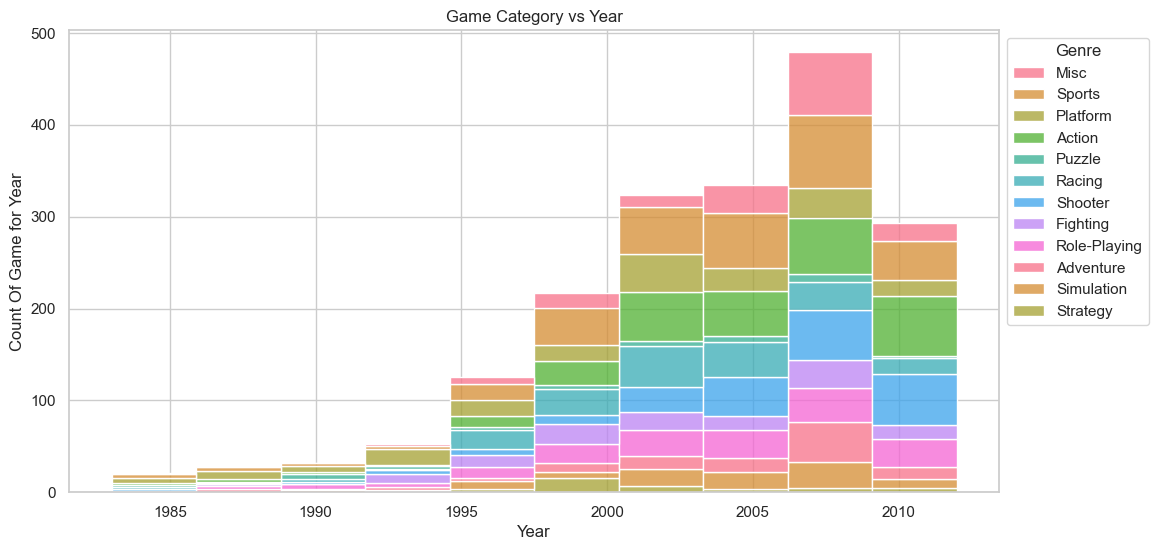

In [21]:
plt.figure(figsize=(12, 6))

df_plot_yearly = df.groupby(['Year','Genre']).agg({'Game Title':'count'}).rename(columns = {'Game Title': 'Count'}).reset_index().sort_values(by = ['Year', 'Count'], ascending = [True, True])

custom_palette = sns.color_palette("husl", 9)
cat_plat_plot = sns.histplot(df_plot_yearly, x='Year', hue='Genre', weights='Count', multiple='stack', palette = custom_palette)
cat_plat_plot.set_xlabel("Year")
cat_plat_plot.set_ylabel("Count Of Game for Year")
cat_plat_plot.set_title("Game Category vs Year")
cat_plat_plot.set_xticklabels(
    cat_plat_plot.get_xticklabels(), 
fontsize = 11
)
sns.move_legend(cat_plat_plot, "upper left", bbox_to_anchor=(1, 1))
sns.set_theme(style = "whitegrid")

del df_plot_yearly
del cat_plat_plot

plt.show()

- Trend Analysis:

    - There's a clear upward trend in the total number of games across all categories from 1985 to 2005.
    - The trend appears to plateau or slightly decrease from 2005 to 2010.


- Category Evolution:

    - Early years (1985-1995) show dominance of a few categories like Action, Sports, and Strategy.
    - Later years see diversification with more categories emerging and growing.
    - Some categories like Shooter and Action show significant growth over time.


- Relative Category Sizes:

    - Action, Sports, and Misc consistently remain large categories.
    - Shooter games show notable growth, especially from 2000 onwards.
    - Some categories like Fighting and Racing remain relatively small throughout.


- Data Quality:

   - The 'Misc' category is quite large, suggesting potential issues with categorization or data collection.
   - There might be overlap between categories (e.g., Action and Shooter).


- Market Saturation:

    - The plateau/decline from 2005-2010 could indicate market saturation or changes in data collection methods.

# Explatory Data Analysis

- In the data set we are working on, there are 2 important variables that we will consider as numerical variables. These two variables are Review and Global variables, respectively. North America, Europe, Japan and Rest Of World variables are sub-variables of the Global variable.

- Before starting my analytical studies, I want to look at the relationships and linearity of these two main variables and my other sub-variables. To do this, first, I will create a heatmap, and then I will examine the linearity of these variables with the regplot in seaborn.

- First, I want to examine the distributions of my Review, Global, North America, Europe, Japan and Rest Of World variables.

In [22]:
def normality_test(dataset,column, test_type = 'shapiro', dist_type = 'norm', alpha_value = 0.05):
    if test_type == 'shapiro':
        stat,p = shapiro(dataset[column])
        return stat,p
    elif test_type == 'anderson': 
        result_and = anderson(x = dataset[column], dist = dist_type)
        return result_and.statistic, result_and.significance_level,result_and.critical_values

In [23]:
def distribution_tests(dataset, column, dist_type = 'norm'):

    if dist_type == 'norm':
        print("-"*10 + f" Normality Test About {column.upper()} " + "-"*10, end = '\n'*2)
        stat_shapiro = normality_test(dataset, column, test_type = 'shapiro')[0]
        pval_shapiro = normality_test(dataset, column, test_type = 'shapiro')[1]
    
        stat_anderson = normality_test(dataset, column, test_type = 'anderson')[0]
        sign_level_anderson = normality_test(dataset, column, test_type = 'anderson')[1]
        critics_anderson = normality_test(dataset, column, test_type = 'anderson')[2]
        
        fig, (ax0, ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
        g1 = qqplot(dataset[column], line = 's', dist = norm, ax = ax0)
        ax0.set(title = 'Normality Test for {} Values (p-value: {:.4f}) (Test-Statistics : {:.4f})'.format(column,pval_shapiro, stat_shapiro))


        g2 = sns.histplot(dataset[column], stat='density',color = '#F44336', ax=ax1)
        g2.axvline(dataset[column].mean(), color='#2196F3', linestyle='--', label='Mean')
        g2.axvline(dataset[column].median(), color='#4CAF50', linestyle='-.', label='Median')
        g2.set(xlabel=f'{column} Values', ylabel=f'Density Of {column} Values', title=f'Distribution Of {column}(Histogram)')
        g2.legend()

        g3 = sns.boxenplot(dataset, x = column, color = '#FFC107', ax = ax2)
        g3.axvline(dataset[column].mean(), color='#2196F3', linestyle='--', label='Mean')
        g3.axvline(dataset[column].median(), color='#4CAF50', linestyle='-.', label='Median')
        g3.set(xlabel=f'{column} Values', title=f'Distribution Of {column}(Boxplot with Outliers)')
        g3.legend()


        print(f"Normality Test Results Using With Shapiro Wilk's Test : {pval_shapiro:.5f} \n\nTest Statistics For Shapiro Wilks : {stat_shapiro:.4f} \n")
        print(f"Test Statistics For Anderson Darling : {round(stat_anderson,4)} \nSignificance Level For Anderson Test : {sign_level_anderson} \nCritical Values For Anderson Test : {critics_anderson} \n")
        
        del g1,g2,g3
        
        plt.show()

---------- Normality Test About REVIEW ----------

Normality Test Results Using With Shapiro Wilk's Test : 0.00000 

Test Statistics For Shapiro Wilks : 0.9126 

Test Statistics For Anderson Darling : 42.5871 
Significance Level For Anderson Test : [15.  10.   5.   2.5  1. ] 
Critical Values For Anderson Test : [0.575 0.655 0.785 0.916 1.09 ] 



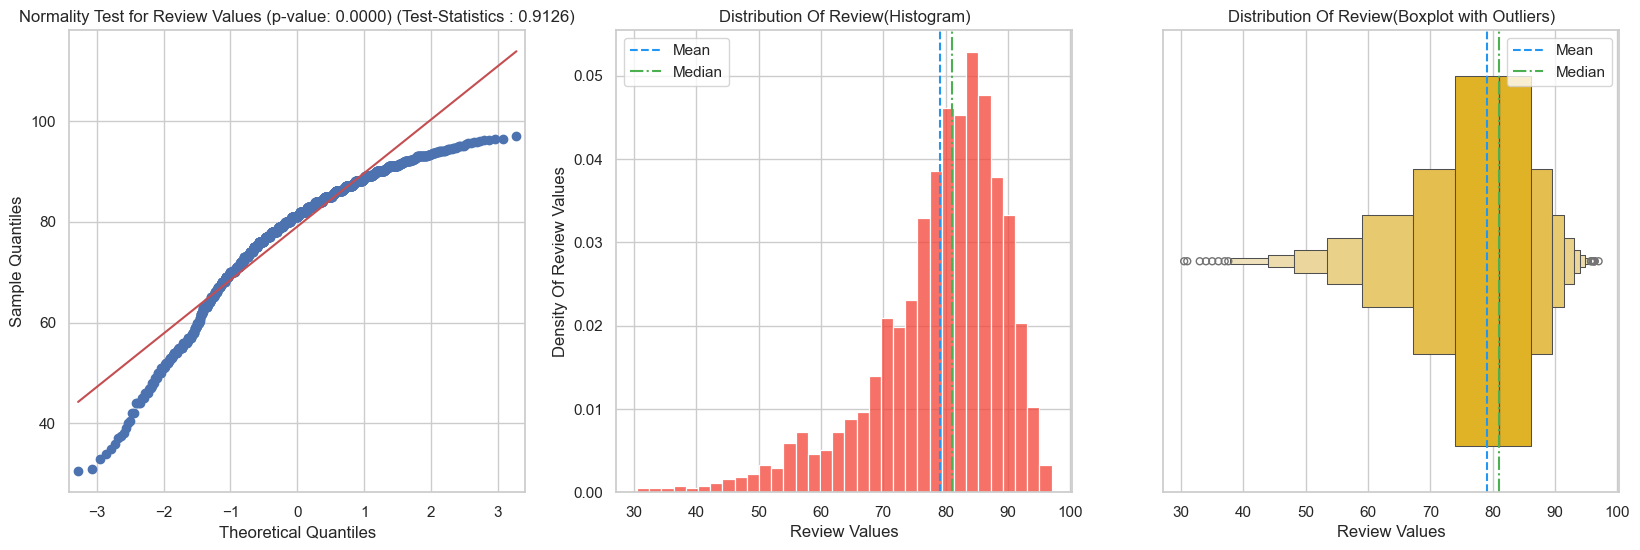

In [24]:
distribution_tests(df, 'Review')

- Okay, when I check the distribution, as you can see, I see that the distribution of the reviews is skewed, skewed to the left. The tails of left-skewed distributions remain on the left of the graph, and the vast majority of the values ​​in the series are clustered around larger values. Small values ​​remain as outliers on the left side of the graph. We can support this explanation with the boxen plot on the right. Small values ​​of the series are found as outliers on the left side of the graph. In data distributed in this way, when examining the classes within categorical variables, the median value of the relevant numerical variable will be more suitable for inter-class evaluation and comparison.

- In order to support the assumption that the data is skewed, I first performed the qqplot, then the Shapiro Wilks and Anderson Darling tests to perform a normality test. While the Shapiro Wilks test is a more suitable test for smaller sample sizes, the Anderson Darling test calculates a normality fit by including the skewness and kurtosis factors in its calculation. As can be seen in the two tests we conducted and the qqplot we drew, the Review values ​​in the dataset are far from a Normal distribution.

- Leaving aside the technical features of the distribution, if we want to explain the data we have, the review values ​​are high. There are also very low review values, but these values, as can be explained from the graphs above, are probably the result of reviews made by a smaller population in previous years when games reached smaller audiences. After 2005, with the increase in the number of published games, such a distribution may have occurred because the population size that reviewed and evaluated the game and produced the Review value was higher. In the next stages of our study, I will make inferences that support this assumption.

- I will performing a normality test for my 4 variables that hold my Sales data next steps.

- For now, I make some group by process for evaluating to the sales and review by Game title and other categorical feature.

In [25]:
df.groupby('Game Title', as_index = False).agg({'Review' :'median',
                                               'Global':'sum',
                                               'North America' : 'sum',
                                               'Europe' :'sum',
                                               'Japan' : 'sum',
                                               'Rest of World' : 'sum'}).sort_values(by = ['Global','Review'], ascending = [False, False])[:10]

Game Title  Review  Global  North America  Europe  Japan  Rest of World
1456                      Wii Sports   76.28   81.12          40.43   28.39   3.77           8.54
1193               Super Mario Bros.   91.00   40.24          29.08    3.58   6.81           0.77
1254                          Tetris   87.00   35.84          26.17    2.95   6.03           0.69
630                   Mario Kart Wii   82.07   33.55          14.50   12.22   3.63           3.21
1457               Wii Sports Resort   82.65   31.52          14.82   10.51   3.18           3.01
849            New Super Mario Bros.   90.00   29.08          10.85    8.87   6.48           2.88
1455                        Wii Play   61.64   28.71          13.83    9.11   2.93           2.84
101          Call of Duty: Black Ops   86.72   28.47          16.00    8.49   0.57           3.44
264                        Duck Hunt   84.00   28.31          26.93    0.63   0.28           0.47
105   Call of Duty: Modern Warfare 3   88.29   27.52          14.69    8.79   0.59           3.45

- First, I collect the Game Title by Global and Review value. And I rank them by Global and Review value. Finally, as you can see, the game called Wii Sports is the game with the best Review value and it is the best selling game. When I examine these values in detail, I see that the region where the Wii Sports game reached the highest sales value is the sales regions in North America.But this is not coincidental, I see that other games are also sold the most in North America.

In [26]:
df.groupby('Genre', as_index = False).agg({'Review' :['count','min','median','max','sum'],
                                               'Global':['min','median','max','sum'],
                                               'North America' :['min','median','max','sum'],
                                               'Europe' :['min','median','max','sum'],
                                               'Japan' : ['min','median','max','sum'],
                                               'Rest of World' : ['min','median','max','sum']}).sort_values(by = [('Global','sum'),('Review','median')], ascending = [False, False])

Genre Review                             Global                     North America                     Europe                     Japan                    Rest of World                  
                  count   min median   max      sum    min median   max    sum           min median   max    sum    min median   max    sum   min median  max    sum           min median  max   sum
10        Sports    308 30.50  81.12 94.50 24282.57   0.83   1.46 81.12 703.11          0.00   0.78 40.43 354.62   0.00   0.35 28.39 221.09  0.00   0.00 3.77  56.47          0.00   0.12 8.54 71.06
0         Action    275 40.38  81.00 96.09 21712.27   0.83   1.55 20.81 637.27          0.00   0.83  9.43 320.88   0.00   0.49  8.48 205.91  0.00   0.03 2.02  45.66          0.00   0.14 2.49 64.87
4       Platform    188 34.00  81.00 94.00 14736.23   0.84   1.68 40.24 595.24          0.00   0.89 29.08 317.03   0.00   0.46  8.87 139.54  0.00   0.14 6.81 104.17          0.00   0.11 2.88 34.42
8        Shooter    206 44.00  83.56 96.36 16702.44   0.83   1.48 28.31 557.20          0.00   0.90 26.93 333.40   0.00   0.48  4.70 155.89  0.00   0.02 1.27  14.22          0.00   0.15 2.02 53.84
7   Role-Playing    173 51.08  85.88 95.69 14517.02   0.83   1.77 23.10 496.20          0.00   0.71  9.00 197.54   0.00   0.29  6.18 100.90  0.00   0.53 7.20 169.32          0.00   0.08 1.35 28.53
6         Racing    186 49.00  81.00 94.47 14527.60   0.83   1.35 33.55 451.80          0.00   0.72 14.50 214.35   0.00   0.48 12.22 151.62  0.00   0.01 4.11  43.79          0.00   0.14 3.21 42.08
3           Misc    159 33.00  75.40 92.25 11570.41   0.83   1.61 28.71 426.12          0.00   0.88 13.83 205.46   0.00   0.49  9.11 131.48  0.00   0.00 5.32  50.78          0.00   0.15 2.84 38.35
2       Fighting    126 38.15  84.00 96.30 10358.29   0.83   1.51 11.58 249.00          0.00   0.92  5.90 133.07   0.00   0.38  2.28  63.49  0.00   0.03 2.87  34.01          0.00   0.11 0.93 18.44
1      Adventure    110 40.00  82.00 97.00  8962.82   0.84   1.65  8.03 239.45          0.00   0.81  4.91 116.83   0.00   0.51  2.79  76.88  0.00   0.03 1.69  27.01          0.01   0.13 0.78 18.80
9     Simulation     92 44.00  76.99 90.89  6790.69   0.83   1.46 24.50 205.14          0.00   0.68 11.22 101.13   0.00   0.46 10.81  64.08  0.00   0.00 5.33  24.31          0.00   0.11 2.73 15.53
5         Puzzle     44 37.00  77.56 94.00  3269.50   0.84   1.49 30.26 108.65          0.00   0.71 23.20  60.72   0.00   0.32  2.26  18.58  0.00   0.33 4.22  25.00          0.00   0.07 0.58  4.35
11      Strategy     40 52.00  82.53 94.75  3297.49   0.86   1.45  5.45  77.80          0.00   0.82  3.82  45.48   0.00   0.22  2.27  18.17  0.00   0.00 1.61  10.72          0.00   0.07 0.48  3.47

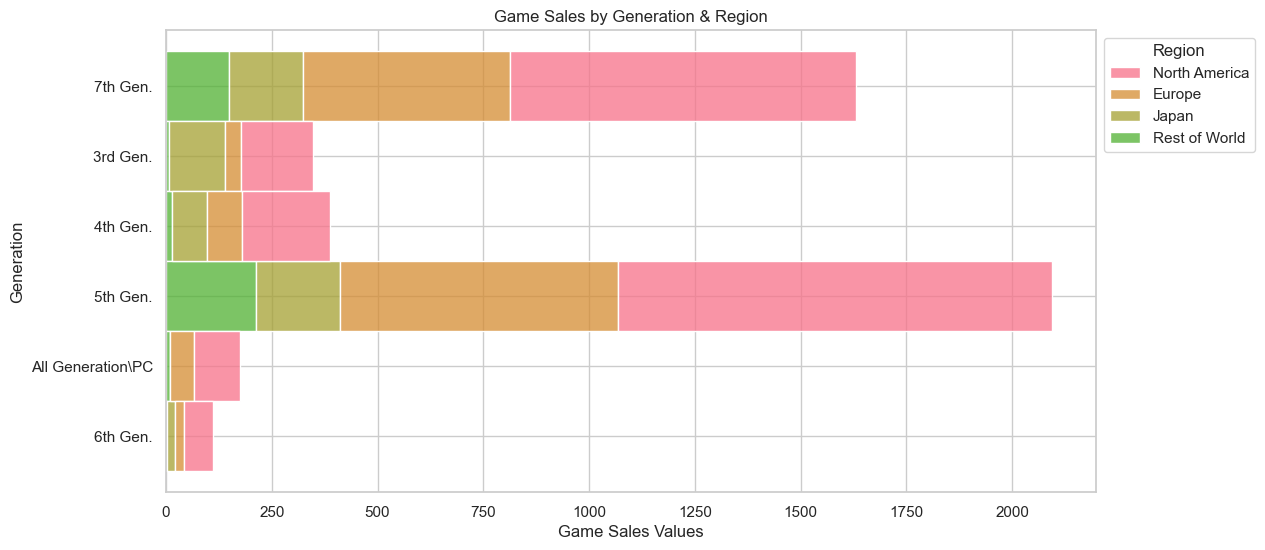

In [27]:
generation_melted = pd.melt(df, 
                        id_vars = ['Generation'], 
                        value_vars = ['North America','Europe', 'Japan', 'Rest of World'],
                        var_name = 'Region', 
                        value_name = 'Sales')

plt.figure(figsize=(12, 6))


custom_palette = sns.color_palette("husl", 9)
generation_plot = sns.histplot(generation_melted, y='Generation', hue='Region', weights='Sales', multiple='stack', palette = custom_palette)
generation_plot.set_ylabel("Generation")
generation_plot.set_xlabel("Game Sales Values")
generation_plot.set_title("Game Sales by Generation & Region")
generation_plot.set_yticklabels(
    generation_plot.get_yticklabels(), 
fontsize = 11
)
sns.move_legend(generation_plot, "upper left", bbox_to_anchor=(1, 1))
sns.set_theme(style = "whitegrid")

del generation_melted
del generation_plot

plt.show()

- Overall Trends:

    - Generational Trends: The 7th generation appears to have the highest overall sales, followed by the 5th generation. This suggests that the gaming industry has seen significant growth in recent years.

    - Regional Trends: North America consistently dominates the market, followed by Europe. Japan, while still a major player, has seen its market share decline relative to the past.

- Specific Insights:

    - Region-Specific Preferences: Some regions exhibit distinct preferences for certain generations. For example, Japan shows a strong preference for the 3rd generation, while North America and Europe have more evenly distributed sales across generations.
    
    - Generation-Specific Success: Certain generations have achieved remarkable success in specific regions. The 5th generation, for instance, seems to have been particularly popular in North America.

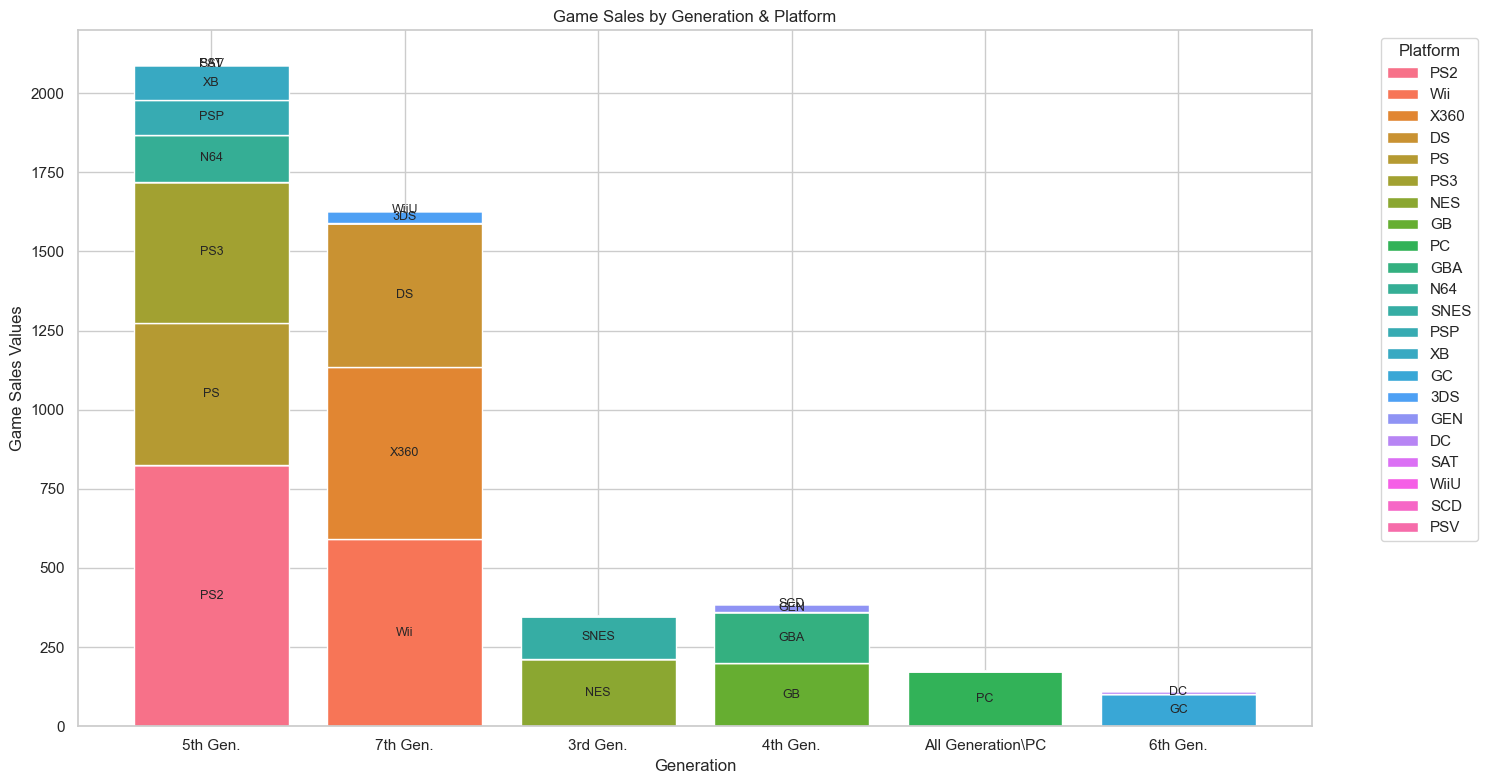

In [28]:
# Assuming df is your DataFrame
gen_by_platform = df.groupby(['Generation','Platform']).agg({'Global':'sum'}).rename(columns = {'Global': 'Sales'}).reset_index().sort_values(by = ['Sales'], ascending = [False])

plt.figure(figsize=(15, 8))

custom_palette = sns.color_palette("husl", len(gen_by_platform['Platform'].unique()))
colors = dict(zip(gen_by_platform['Platform'].unique(), custom_palette))

generations = gen_by_platform['Generation'].unique()
platforms = gen_by_platform['Platform'].unique()

bottom = np.zeros(len(generations))

for platform in platforms:
    mask = gen_by_platform['Platform'] == platform
    heights = gen_by_platform[mask].set_index('Generation')['Sales'].reindex(generations).fillna(0)
    plt.bar(generations, heights, bottom=bottom, width=0.8, label=platform, color=colors[platform])
    
    # Add labels on the bars
    for i, (gen, height) in enumerate(zip(generations, heights)):
        if height > 0:
            plt.text(i, bottom[i] + height/2, platform, ha='center', va='center', fontweight='light', fontsize = 9)
    
    bottom += heights

plt.xlabel("Generation")
plt.ylabel("Game Sales Values")
plt.title("Game Sales by Generation & Platform")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

del gen_by_platform, custom_palette, colors, generations, platforms, bottom



plt.show()

  - Overall Trends:

    - Generational Trends: The 7th generation appears to have the highest overall sales, followed by the 5th generation. This suggests that the gaming industry has seen significant growth in recent years.
    
    - Platform Trends: The PlayStation 2 (PS2) and PlayStation (PS) have dominated the market across multiple generations, indicating their enduring popularity.

- Specific Insights:

    - Platform-Specific Success: Certain platforms have achieved remarkable success within specific generations. For example, the Wii and DS were particularly popular in the 5th generation, while the PS2 dominated the 6th generation.
    
    - Generational Shifts: The dominance of platforms has shifted across generations. The 5th generation saw a rise in handheld consoles (Game Boy Advance, PSP), while the 7th generation witnessed the growing popularity of motion-controlled consoles (Wii, Kinect).

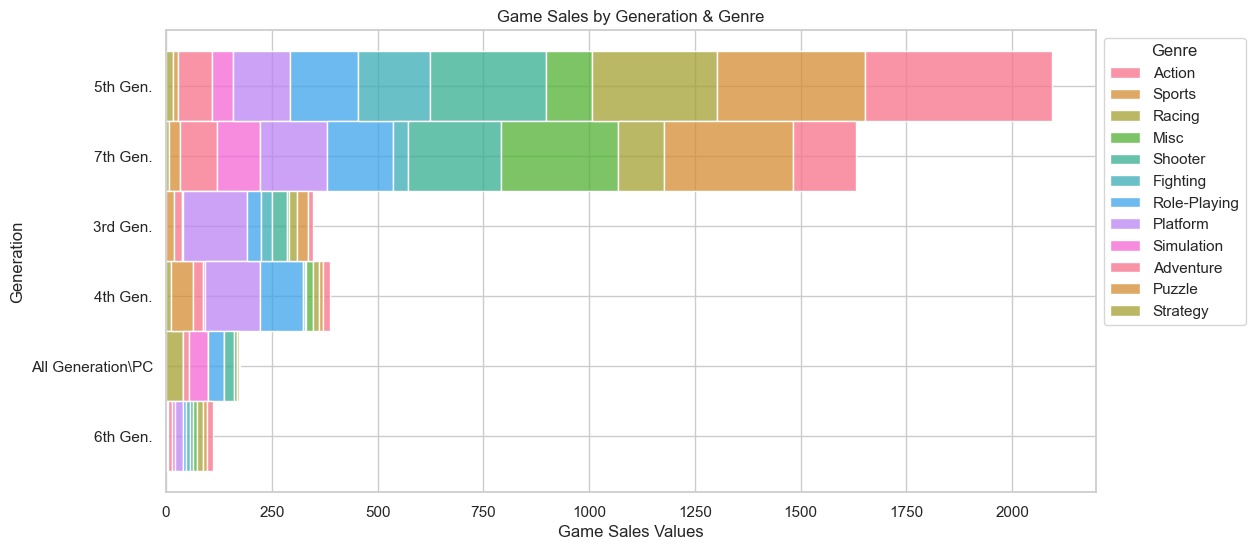

In [29]:
gen_by_genre = df.groupby(['Generation','Genre']).agg({'Global':'sum'}).rename(columns = {'Global': 'Sales'}).reset_index().sort_values(by = ['Sales'], ascending = [False])
plt.figure(figsize=(12, 6))


custom_palette = sns.color_palette("husl", 9)
gen_by_genre_plot = sns.histplot(gen_by_genre, y='Generation', hue='Genre', weights='Sales', multiple='stack', palette = custom_palette)
gen_by_genre_plot.set_ylabel("Generation")
gen_by_genre_plot.set_xlabel("Game Sales Values")
gen_by_genre_plot.set_title("Game Sales by Generation & Genre")
gen_by_genre_plot.set_yticklabels(
    gen_by_genre_plot.get_yticklabels(), 
fontsize = 11
)
sns.move_legend(gen_by_genre_plot, "upper left", bbox_to_anchor=(1, 1))
sns.set_theme(style = "whitegrid")

del gen_by_genre
del gen_by_genre_plot

plt.show()

- Overall Trends:

    - Generational Trends: The 5th and 7th generations appear to have the highest overall sales, indicating the significant growth of the gaming industry during these periods.
    - Genre Trends: Action, Sports, and Racing consistently dominate the market across generations, suggesting their enduring popularity.
    
- Specific Insights:

    - Genre-Specific Success: Certain genres have achieved remarkable success within specific generations. For example, Role-Playing games were particularly popular in the 5th and 7th generations, while Platformers dominated the 3rd generation.
    
    - Generational Shifts: The popularity of genres has shifted across generations. The 5th generation saw a rise in Role-Playing and Action games, while the 6th generation witnessed a resurgence of Platformers and Puzzle games.

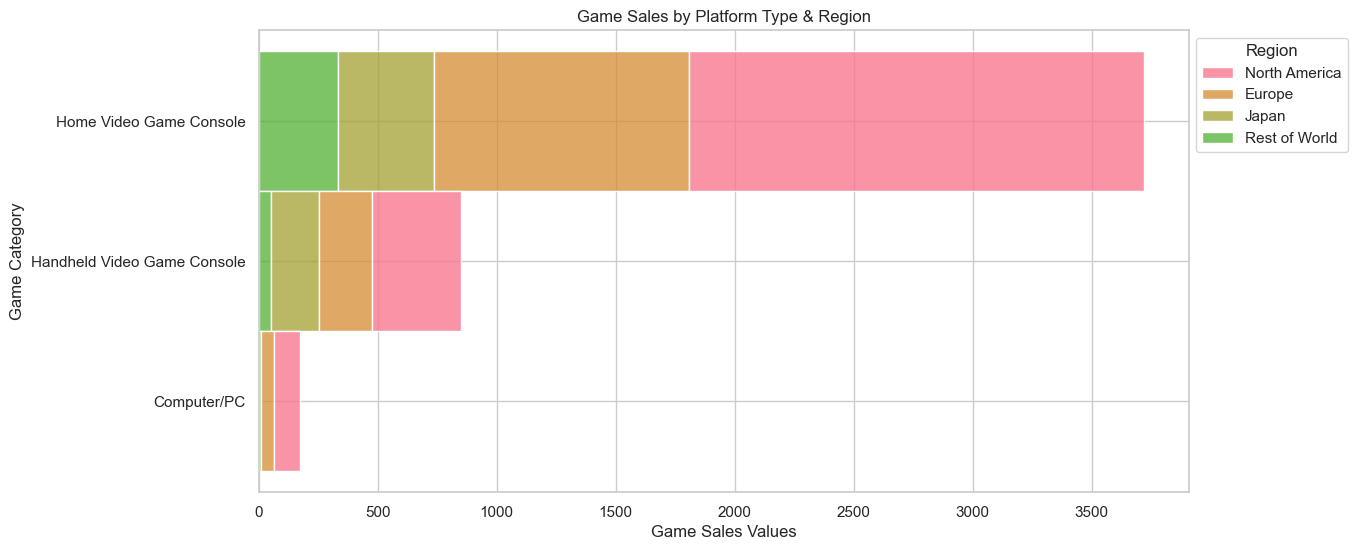

In [30]:
platformType_melted = pd.melt(df, 
                        id_vars = ['Platform_Type'], 
                        value_vars = ['North America','Europe', 'Japan', 'Rest of World'],
                        var_name = 'Region', 
                        value_name = 'Sales')

plt.figure(figsize=(12, 6))


custom_palette = sns.color_palette("husl", 9)
platformType_plot = sns.histplot(platformType_melted, y='Platform_Type', hue='Region', weights='Sales', multiple='stack', palette = custom_palette)
platformType_plot.set_ylabel("Game Category")
platformType_plot.set_xlabel("Game Sales Values")
platformType_plot.set_title("Game Sales by Platform Type & Region")
platformType_plot.set_yticklabels(
    platformType_plot.get_yticklabels(), 
fontsize = 11
)
sns.move_legend(platformType_plot, "upper left", bbox_to_anchor=(1, 1))
sns.set_theme(style = "whitegrid")

del platformType_melted
del platformType_plot

plt.show()

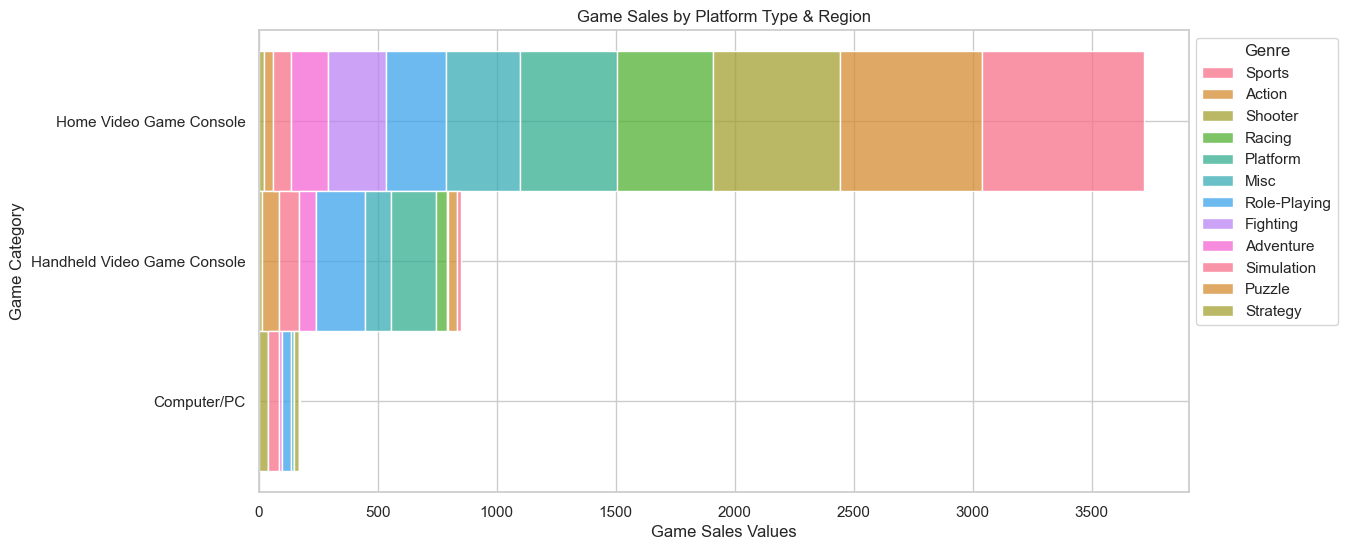

In [31]:
platformType_genre = df.groupby(['Platform_Type', 'Genre'], as_index = False).agg({'Global' : 'sum'}).rename(columns = {'Global' : 'Sales'}).sort_values(by = ['Platform_Type','Sales'], ascending = [False,False])
plt.figure(figsize=(12, 6))


custom_palette = sns.color_palette("husl", 9)
platformType_genre_plot = sns.histplot(platformType_genre, y='Platform_Type', hue='Genre', weights='Sales', multiple='stack', palette = custom_palette)
platformType_genre_plot.set_ylabel("Game Category")
platformType_genre_plot.set_xlabel("Game Sales Values")
platformType_genre_plot.set_title("Game Sales by Platform Type & Region")
platformType_genre_plot.set_yticklabels(
    platformType_genre_plot.get_yticklabels(), 
fontsize = 11
)
sns.move_legend(platformType_genre_plot, "upper left", bbox_to_anchor=(1, 1))
sns.set_theme(style = "whitegrid")

del platformType_genre
del platformType_genre_plot

plt.show()

- Overall Trends:

    - Platform Type Trends: Home video game consoles consistently dominate the market, followed by handheld consoles. Computer/PC platforms have a smaller market share.
    - Genre Trends: Sports, Action, and Shooter games appear to be the most popular across all platform types.

- Specific Insights:

    - Platform-Specific Preferences: Certain genres are more prevalent on specific platform types. For example, Role-Playing games are more common on home video game consoles, while handheld consoles tend to have a higher proportion of Platformers and Puzzle games.
    - Regional Variations: The graph shows some regional differences in genre preferences. However, without specific regional data, it's difficult to draw definitive conclusions.

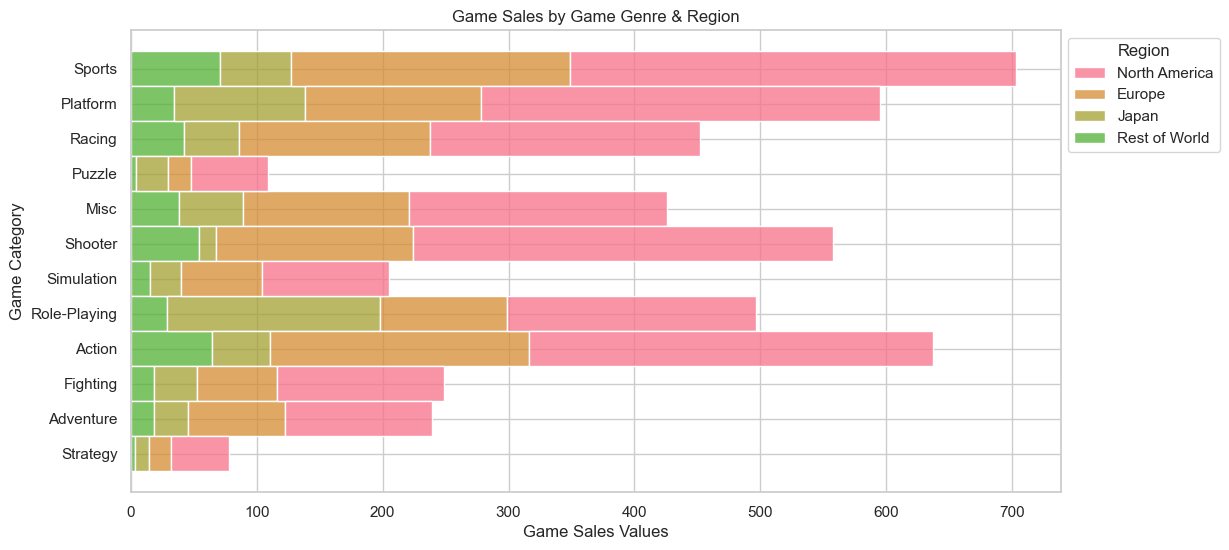

In [32]:
genre_melted = pd.melt(df, 
                        id_vars = ['Genre'], 
                        value_vars = ['North America','Europe', 'Japan', 'Rest of World'],
                        var_name = 'Region', 
                        value_name = 'Sales')

plt.figure(figsize=(12, 6))


custom_palette = sns.color_palette("husl", 9)
genre_plot = sns.histplot(genre_melted, y='Genre', hue='Region', weights='Sales', multiple='stack', palette = custom_palette)
genre_plot.set_ylabel("Game Category")
genre_plot.set_xlabel("Game Sales Values")
genre_plot.set_title("Game Sales by Game Genre & Region")
genre_plot.set_yticklabels(
    genre_plot.get_yticklabels(), 
fontsize = 11
)
sns.move_legend(genre_plot, "upper left", bbox_to_anchor=(1, 1))
sns.set_theme(style = "whitegrid")

del genre_melted
del genre_plot

plt.show()

- Market Size and Distribution:

    - North America appears to be the largest market for most game genres, followed by Europe.
    - Japan has a significant market share in certain genres, particularly Role-Playing and Platform games.
    - The "Rest of World" category generally has the smallest share, but is notable in some genres like Sports and Racing.


- Genre Popularity:

    - Sports, Platform, and Action games seem to have the highest overall sales across regions.
    - Strategy games appear to have the lowest sales globally.
    - Shooter games show strong sales, particularly in North America.


- Regional Preferences:

    - Japan shows a strong preference for Role-Playing games compared to other regions.
    - North America dominates in Shooter and Sports game sales.
    - Europe shows balanced consumption across most genres.


- Market Segmentation:

    - Different genres show varying levels of global vs. regional appeal.
    - Some genres (e.g., Sports, Action) have more evenly distributed sales across regions.
    - Others (e.g., Role-Playing, Fighting) show more pronounced regional preferences.


- Data Representation:

    - The stacked bar chart effectively shows both the total sales for each genre and the regional breakdown.
    - The color coding clearly distinguishes between regions.


- Potential Insights for Industry:

    - Game developers might use this data to target game development for specific markets.
    - Publishers could optimize marketing strategies based on regional preferences.
    - It suggests opportunities for expanding certain genres in underrepresented markets.


- I complete to my first step of Explatory Data Analysis sections. After this section,I m gonna maked deeply analysis about my sales columns named like North America, Europe etc. To be first, i m gonna make a normality test for them. And if they not distributited normally i will make some transformation.

---------- Normality Test About NORTH AMERICA ----------

Normality Test Results Using With Shapiro Wilk's Test : 0.00000 

Test Statistics For Shapiro Wilks : 0.4146 

Test Statistics For Anderson Darling : 259.8351 
Significance Level For Anderson Test : [15.  10.   5.   2.5  1. ] 
Critical Values For Anderson Test : [0.575 0.655 0.785 0.916 1.09 ] 



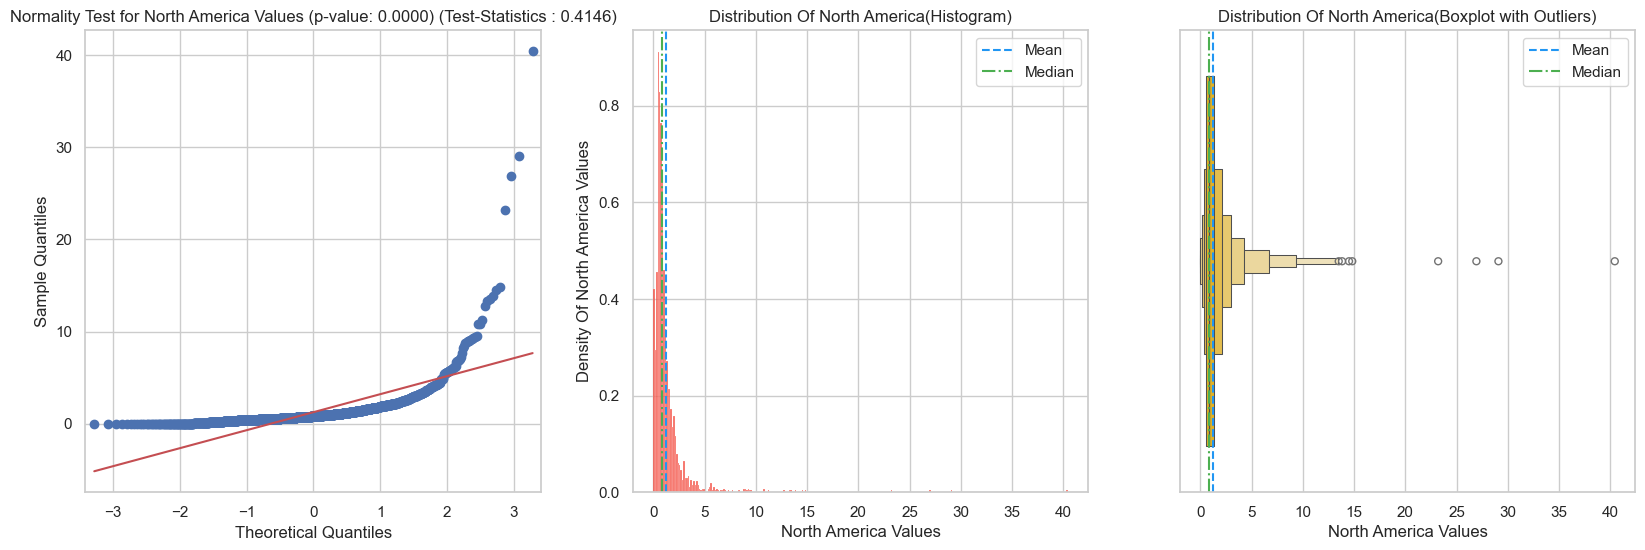

---------- Normality Test About EUROPE ----------

Normality Test Results Using With Shapiro Wilk's Test : 0.00000 

Test Statistics For Shapiro Wilks : 0.4421 

Test Statistics For Anderson Darling : 231.4224 
Significance Level For Anderson Test : [15.  10.   5.   2.5  1. ] 
Critical Values For Anderson Test : [0.575 0.655 0.785 0.916 1.09 ] 



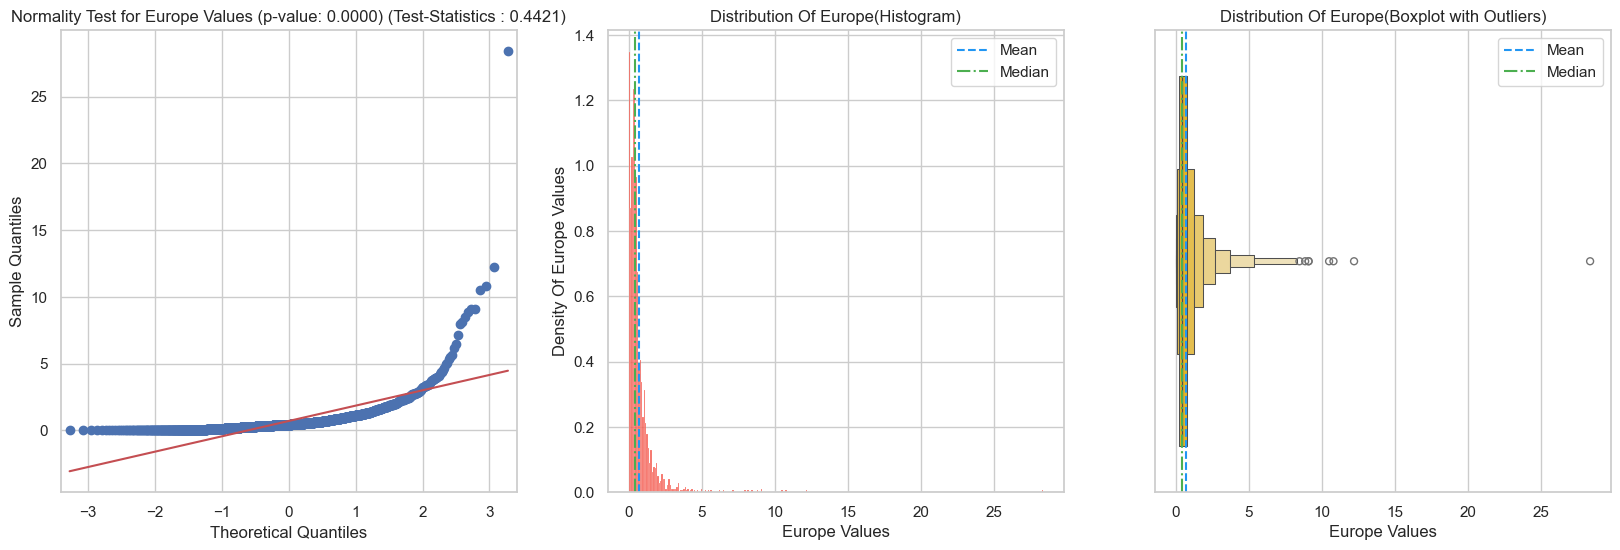

---------- Normality Test About JAPAN ----------

Normality Test Results Using With Shapiro Wilk's Test : 0.00000 

Test Statistics For Shapiro Wilks : 0.4898 

Test Statistics For Anderson Darling : 324.9693 
Significance Level For Anderson Test : [15.  10.   5.   2.5  1. ] 
Critical Values For Anderson Test : [0.575 0.655 0.785 0.916 1.09 ] 



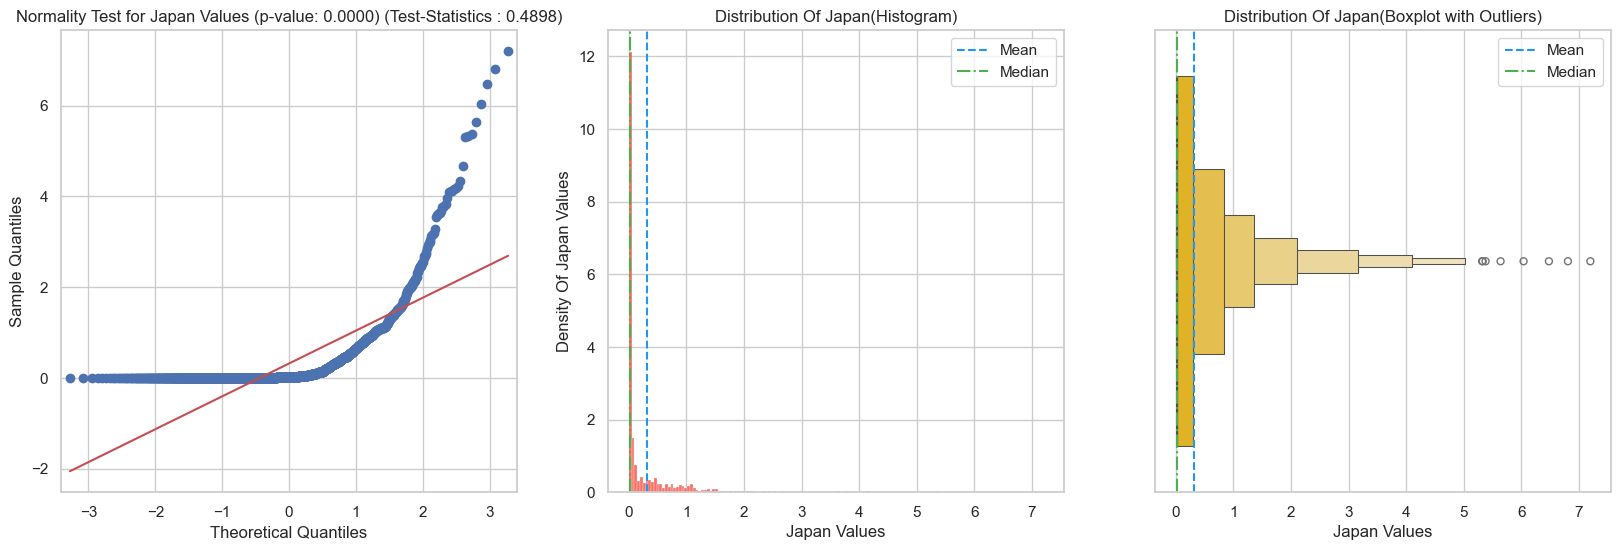

---------- Normality Test About REST OF WORLD ----------

Normality Test Results Using With Shapiro Wilk's Test : 0.00000 

Test Statistics For Shapiro Wilks : 0.4363 

Test Statistics For Anderson Darling : 250.2931 
Significance Level For Anderson Test : [15.  10.   5.   2.5  1. ] 
Critical Values For Anderson Test : [0.575 0.655 0.785 0.916 1.09 ] 



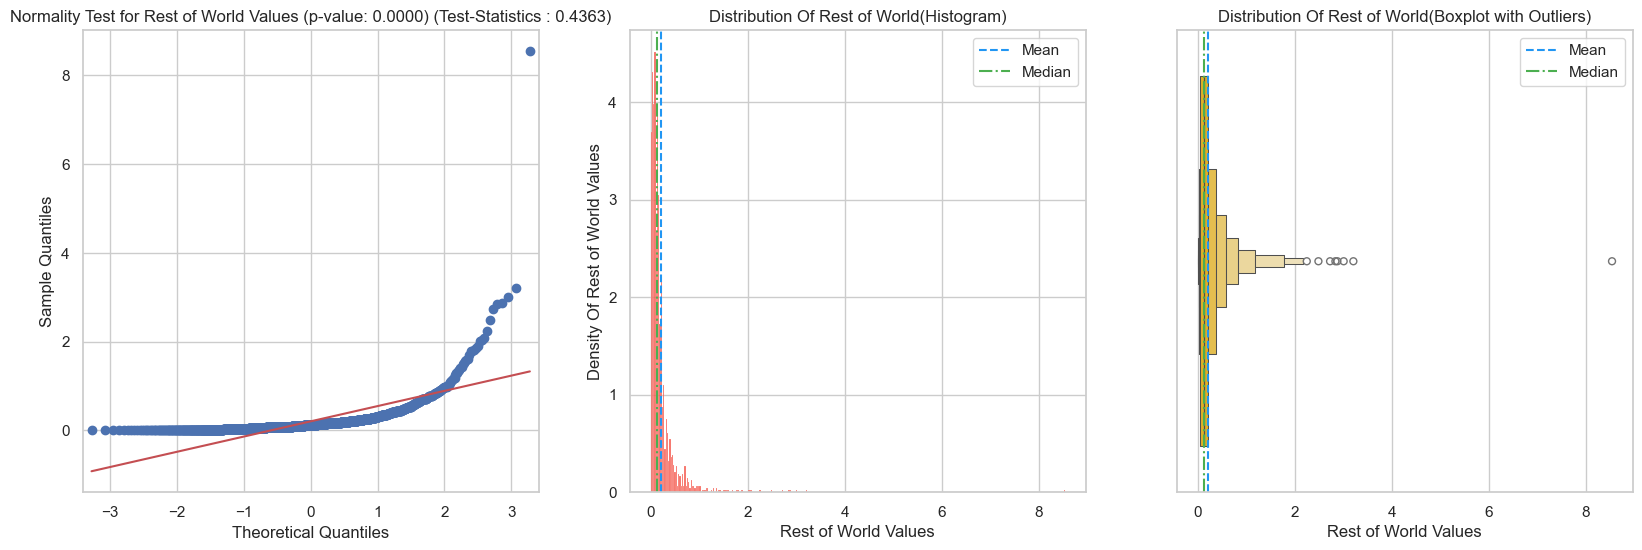

---------- Normality Test About GLOBAL ----------

Normality Test Results Using With Shapiro Wilk's Test : 0.00000 

Test Statistics For Shapiro Wilks : 0.3885 

Test Statistics For Anderson Darling : 305.0678 
Significance Level For Anderson Test : [15.  10.   5.   2.5  1. ] 
Critical Values For Anderson Test : [0.575 0.655 0.785 0.916 1.09 ] 



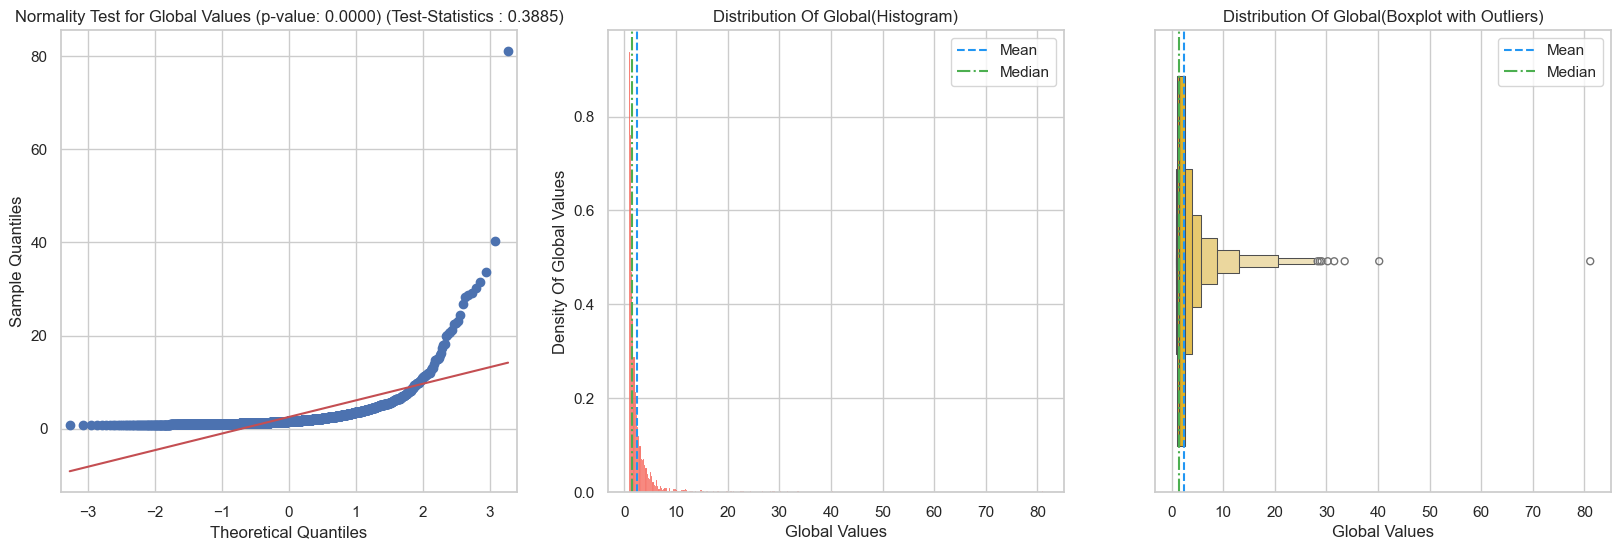

In [33]:
sales_values = ['North America', 'Europe', 'Japan', 'Rest of World', 'Global']
for sale in sales_values :
    distribution_tests(df, sale, 'norm')

- When I examine the sales values, I see that numerical series such as 'North America', 'Europe', 'Japan' and 'Rest of World' do not match the normal distribution. 

- Likewise, when I examine the sales figures of the games around the world, I see a distribution that is skewed to the right, contrary to the review series.

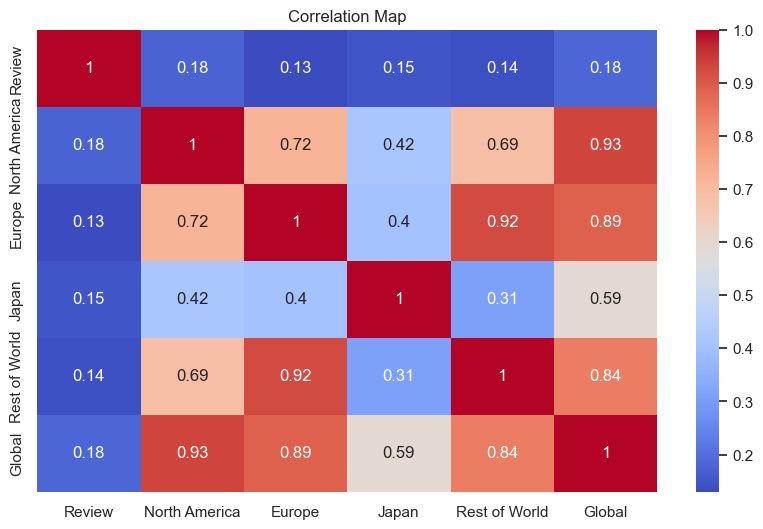

In [34]:
corr_data = df[['Review', 'North America', 'Europe', 'Japan', 'Rest of World', 'Global']]
corr_matrix = corr_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map')

del corr_data

del  corr_matrix


plt.show()

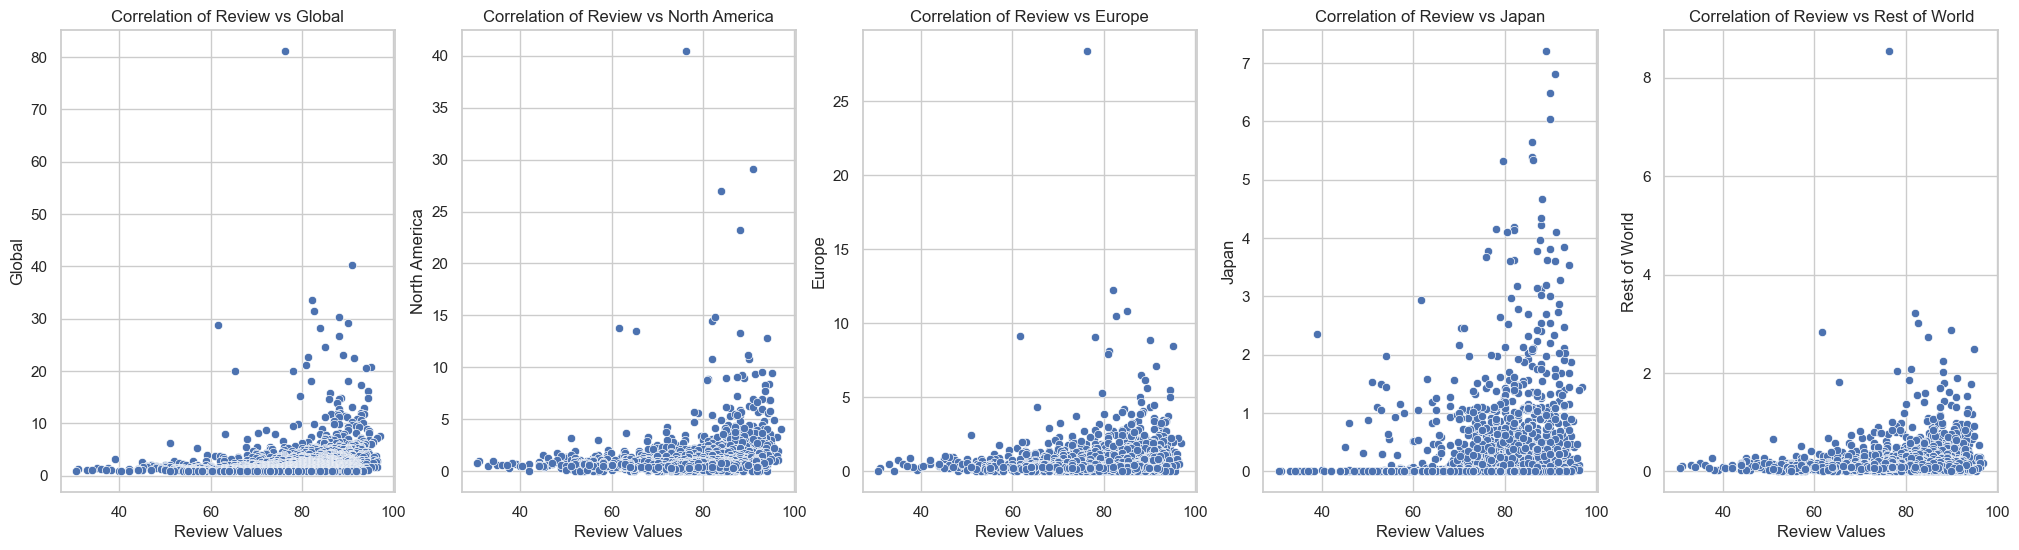

In [35]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(ncols = 5, nrows = 1, figsize = (25,6))
rev_global = sns.scatterplot(data= df, x = 'Review', y = 'Global', ax = ax0)
rev_global.set(xlabel = 'Review Values', ylabel = 'Global',title='Correlation of Review vs Global')

rev_NA = sns.scatterplot(data= df, x = 'Review', y = 'North America', ax = ax1)
rev_NA.set(xlabel = 'Review Values', ylabel = 'North America',title='Correlation of Review vs North America')

rev_EU = sns.scatterplot(data= df, x = 'Review', y = 'Europe', ax = ax2)
rev_EU.set(xlabel = 'Review Values', ylabel = 'Europe',title='Correlation of Review vs Europe')

rev_JP = sns.scatterplot(data= df, x = 'Review', y = 'Japan', ax = ax3)
rev_JP.set(xlabel = 'Review Values', ylabel = 'Japan',title='Correlation of Review vs Japan')

rev_RoW = sns.scatterplot(data= df, x = 'Review', y = 'Rest of World', ax = ax4)
rev_RoW.set(xlabel = 'Review Values', ylabel = 'Rest of World',title='Correlation of Review vs Rest of World')

del rev_global, rev_NA, rev_EU, rev_JP, rev_RoW

plt.show()

- When I examine the relationship between my review and sales data, it appears that there is a weak relationship between all my sales data and my review score data. But this relationship may be masked because the Review and Sales data are not normally distributed. We will be examining this in more detail.

- Now let's draw a regplot to see the linearity of the data after the correlation graphs.

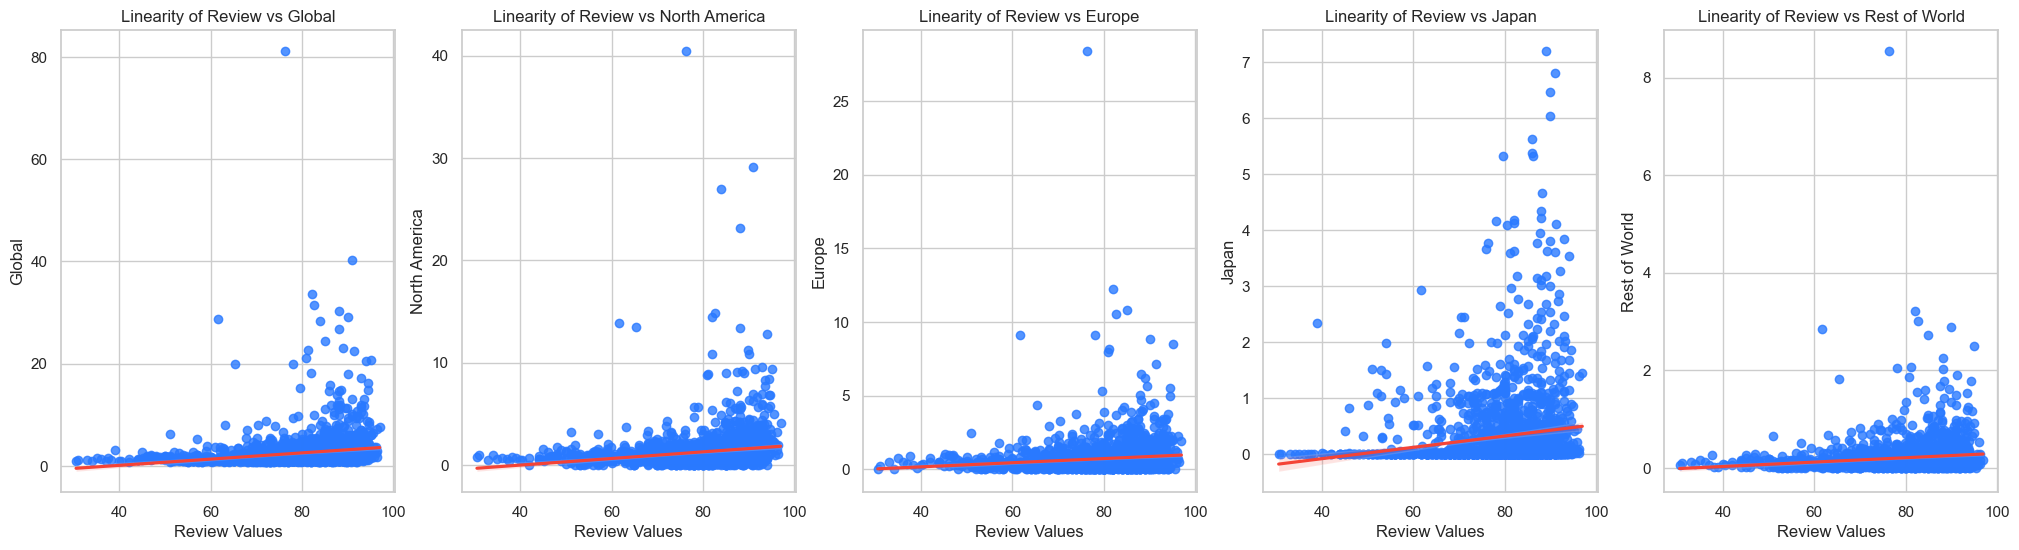

In [36]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(ncols = 5, nrows = 1, figsize = (25,6))
rev_global = sns.regplot(data= df, x = 'Review', y = 'Global', line_kws={"color":"#F44336"}, scatter_kws={"color": "#2979FF"},ax = ax0)
rev_global.set(xlabel = 'Review Values', ylabel = 'Global',title='Linearity of Review vs Global')

rev_NA = sns.regplot(data= df, x = 'Review', y = 'North America', line_kws={"color":"#F44336"}, scatter_kws={"color": "#2979FF"},ax = ax1)
rev_NA.set(xlabel = 'Review Values', ylabel = 'North America',title='Linearity of Review vs North America')

rev_EU = sns.regplot(data= df, x = 'Review', y = 'Europe', line_kws={"color":"#F44336"}, scatter_kws={"color": "#2979FF"},ax = ax2)
rev_EU.set(xlabel = 'Review Values', ylabel = 'Europe',title='Linearity of Review vs Europe')

rev_JP = sns.regplot(data= df, x = 'Review', y = 'Japan', line_kws={"color":"#F44336"}, scatter_kws={"color": "#2979FF"},ax = ax3)
rev_JP.set(xlabel = 'Review Values', ylabel = 'Japan',title='Linearity of Review vs Japan')

rev_RoW = sns.regplot(data= df, x = 'Review', y = 'Rest of World',line_kws={"color":"#F44336"}, scatter_kws={"color": "#2979FF"}, ax = ax4)
rev_RoW.set(xlabel = 'Review Values', ylabel = 'Rest of World',title='Linearity of Review vs Rest of World')

del rev_global, rev_NA, rev_EU, rev_JP, rev_RoW

plt.show()

General Comment of Graphs:

   - Linear Relationship: The regression line shown with a red line in all graphs generally shows a positive trend. This suggests that as assessment values ​​increase, the number of assessments in the relevant geographic area also increases. However, this relationship has a different strength in each graph.

   - Data Distribution: The distribution of data points along the regression line indicates how well the model fits. In some graphs, data points are closer to the linear line, while in others there is more scatter. This indicates that the model works better in some regions and less well in others.

   - Outliers: In all graphs, there are some data points (outliers) that fall quite far from the regression line. These outliers can affect the overall trend and reduce the accuracy of the model.

Special Comments on Graphics:

   - Global: The global chart shows a general trend covering the entire world. Because it contains more data points than other charts, it can provide a more reliable result.
   
   - North America, Europe, Japan, Rest of World: These charts allow you to compare rating behavior in different regions. For example, a more pronounced linear relationship is observed in the North America and Europe charts compared to other regions. This may suggest that the reviewing behavior of users in these regions is more consistent.

**- Additionally, in order to perform detailed analysis on Review values, I would first like to perform a transformation operation on the Review value. To perform transformation on Review values, I perform Cube transformation, that is, I 3rd power each value. Thus, I make a Cubes on the Review values.**

**- When I examine my sales data, I see that they are all distributed skewed to the right. In this case, as I progress my analytical work on my sales data, I need to apply a transformation to my sales data, just like I did with Review Values.**

**- For right-skewed data, log transformation or sqrt transformation is generally performed. But I will do the Cube Root transformation during my work.**

In [37]:
df['ReviewCb'] = df['Review'] ** 3


df['NA_CBRT'] = np.cbrt(df['North America']*1000000)
df['EU_CBRT'] = np.cbrt(df['Europe']*1000000)
df['JP_CBRT'] = np.cbrt(df['Japan']*1000000)
df['ROW_CBRT'] = np.cbrt(df['Rest of World']*1000000)
df['GB_CBRT'] = np.cbrt(df['Global']*1000000)

I performed the transformations I needed for the numerical variables I had.

Now, for these data that I have transformed, I will re-perform the normality tests and re-examine the relationships between my review values ​​after the transformation and my sales data after the transformation.

---------- Normality Test About REVIEWCB ----------

Normality Test Results Using With Shapiro Wilk's Test : 0.00000 

Test Statistics For Shapiro Wilks : 0.9816 

Test Statistics For Anderson Darling : 8.9663 
Significance Level For Anderson Test : [15.  10.   5.   2.5  1. ] 
Critical Values For Anderson Test : [0.575 0.655 0.785 0.916 1.09 ] 



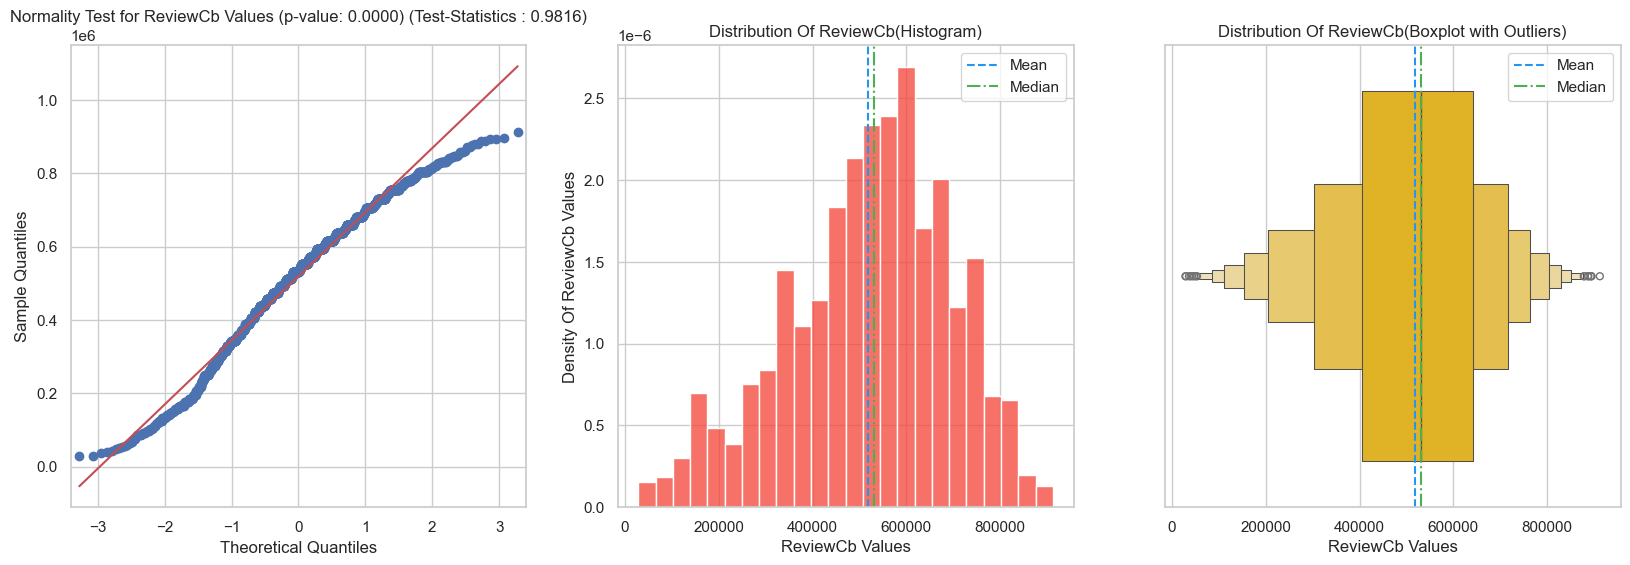

In [38]:
distribution_tests(df, 'ReviewCb', 'norm')

- When I run the normality test again after the data transformations, I see that the normality assumption is not met. However, when I examine the graphs, I can clearly see that the efficiency is more similar to normal distribution than before.

---------- Normality Test About NA_CBRT ----------

Normality Test Results Using With Shapiro Wilk's Test : 0.00000 

Test Statistics For Shapiro Wilks : 0.9105 

Test Statistics For Anderson Darling : 41.9382 
Significance Level For Anderson Test : [15.  10.   5.   2.5  1. ] 
Critical Values For Anderson Test : [0.575 0.655 0.785 0.916 1.09 ] 



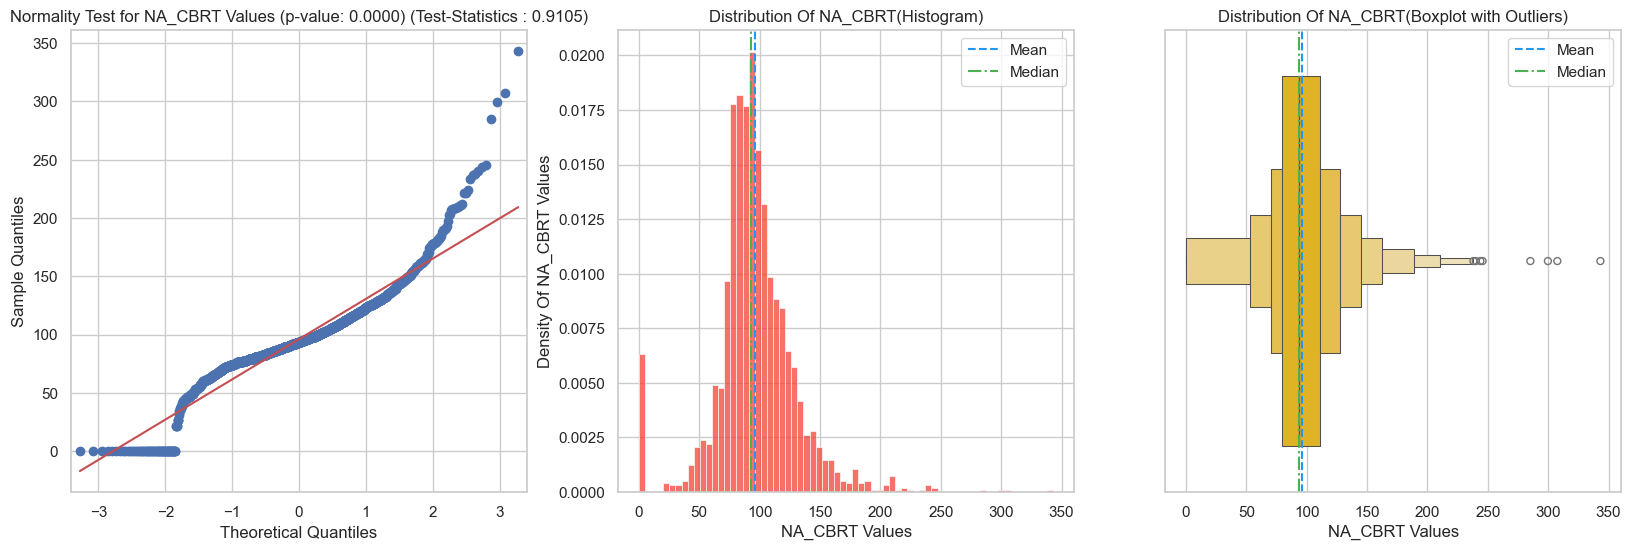

---------- Normality Test About EU_CBRT ----------

Normality Test Results Using With Shapiro Wilk's Test : 0.00000 

Test Statistics For Shapiro Wilks : 0.9562 

Test Statistics For Anderson Darling : 20.0148 
Significance Level For Anderson Test : [15.  10.   5.   2.5  1. ] 
Critical Values For Anderson Test : [0.575 0.655 0.785 0.916 1.09 ] 



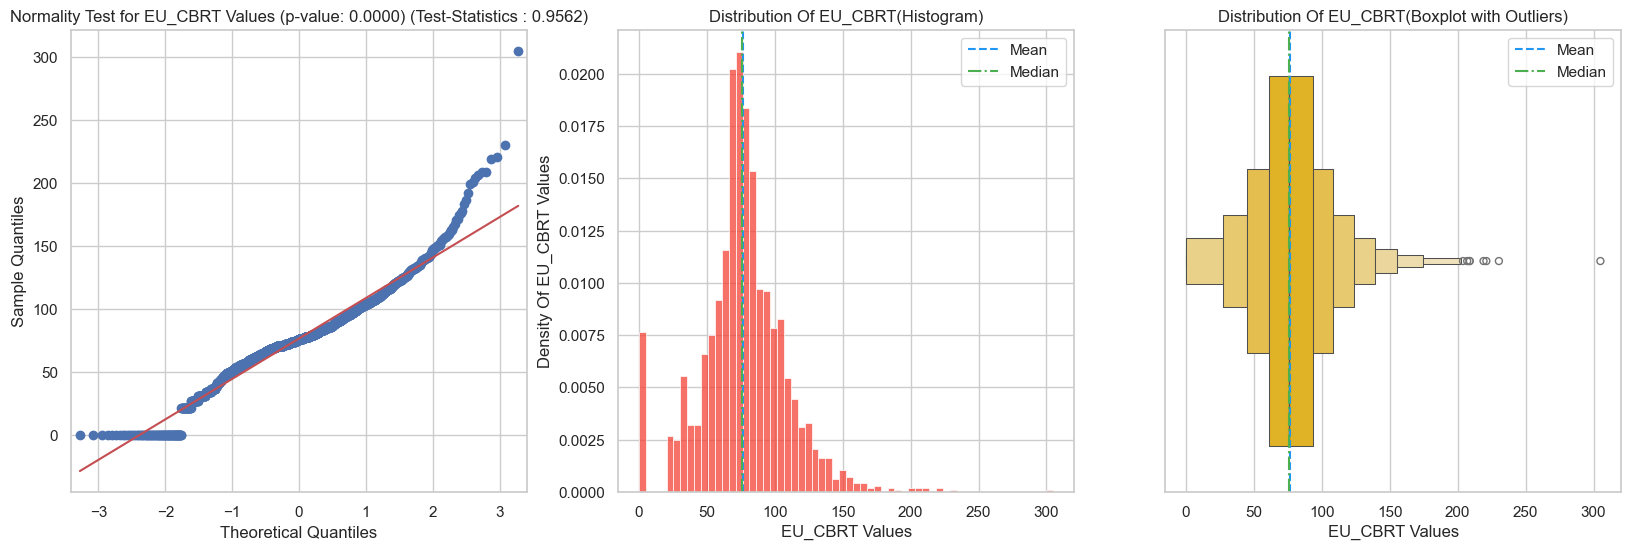

---------- Normality Test About JP_CBRT ----------

Normality Test Results Using With Shapiro Wilk's Test : 0.00000 

Test Statistics For Shapiro Wilks : 0.8391 

Test Statistics For Anderson Darling : 109.8409 
Significance Level For Anderson Test : [15.  10.   5.   2.5  1. ] 
Critical Values For Anderson Test : [0.575 0.655 0.785 0.916 1.09 ] 



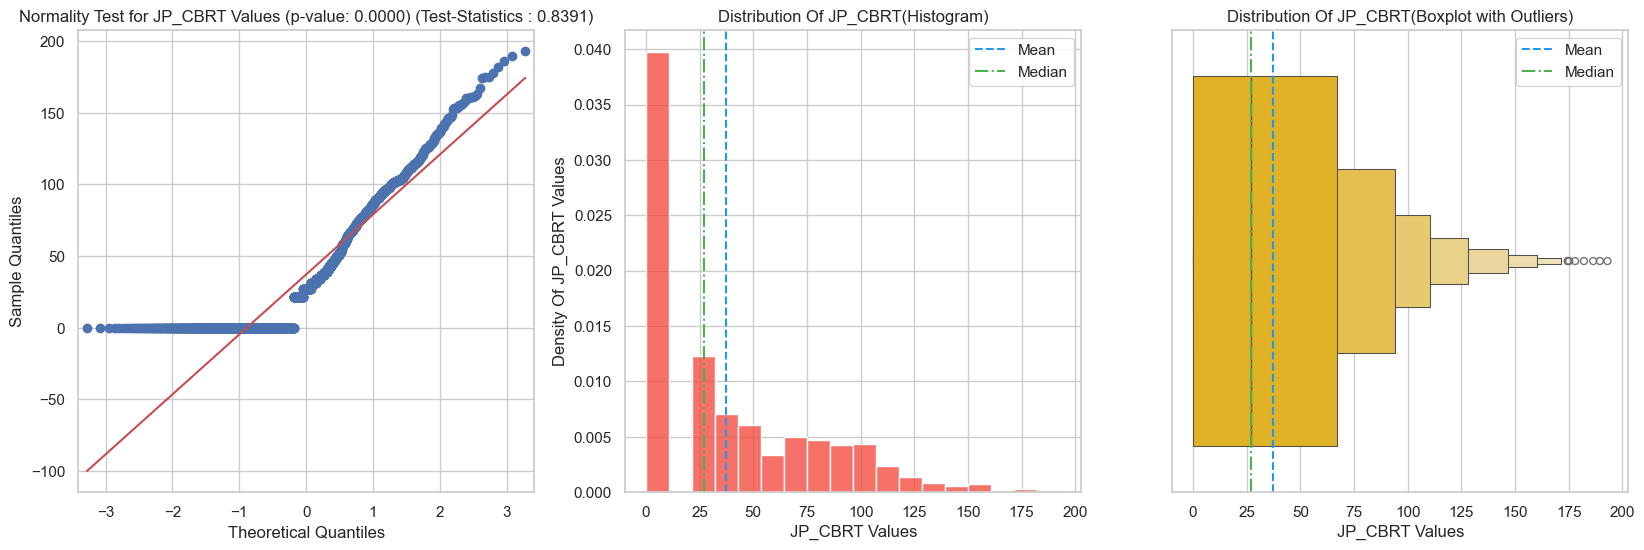

---------- Normality Test About ROW_CBRT ----------

Normality Test Results Using With Shapiro Wilk's Test : 0.00000 

Test Statistics For Shapiro Wilks : 0.9436 

Test Statistics For Anderson Darling : 23.827 
Significance Level For Anderson Test : [15.  10.   5.   2.5  1. ] 
Critical Values For Anderson Test : [0.575 0.655 0.785 0.916 1.09 ] 



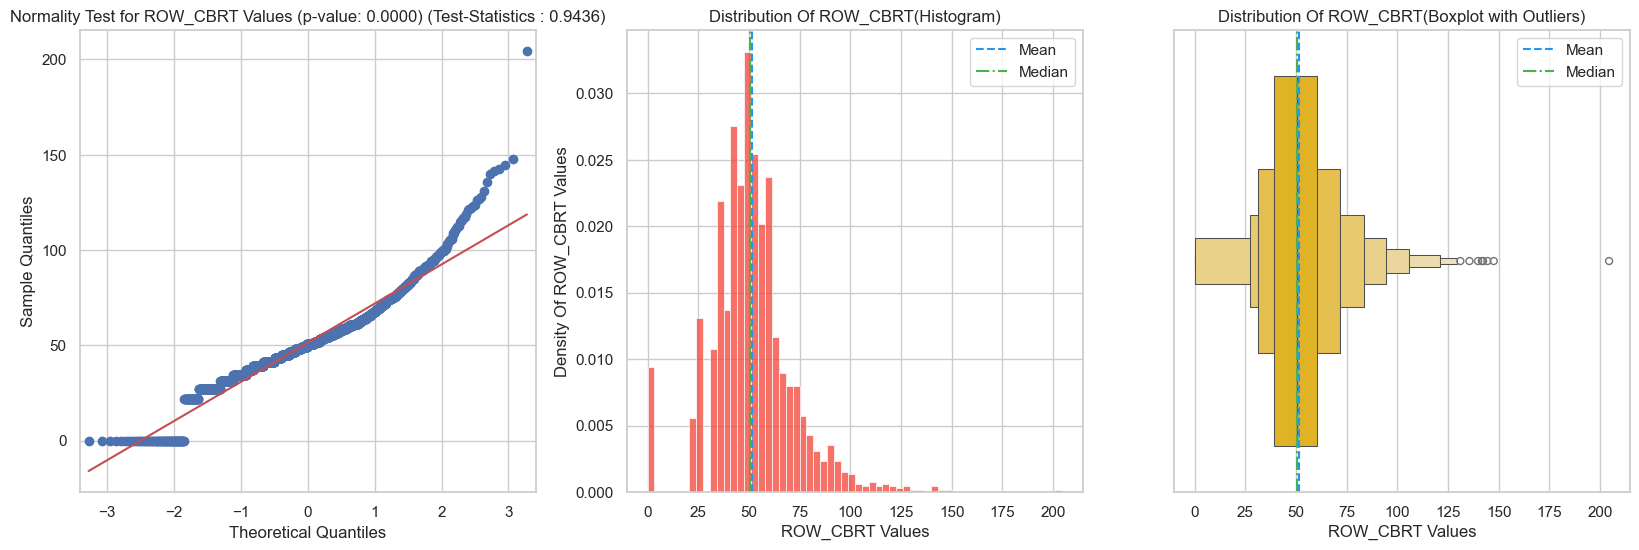

---------- Normality Test About GB_CBRT ----------

Normality Test Results Using With Shapiro Wilk's Test : 0.00000 

Test Statistics For Shapiro Wilks : 0.7670 

Test Statistics For Anderson Darling : 104.7639 
Significance Level For Anderson Test : [15.  10.   5.   2.5  1. ] 
Critical Values For Anderson Test : [0.575 0.655 0.785 0.916 1.09 ] 



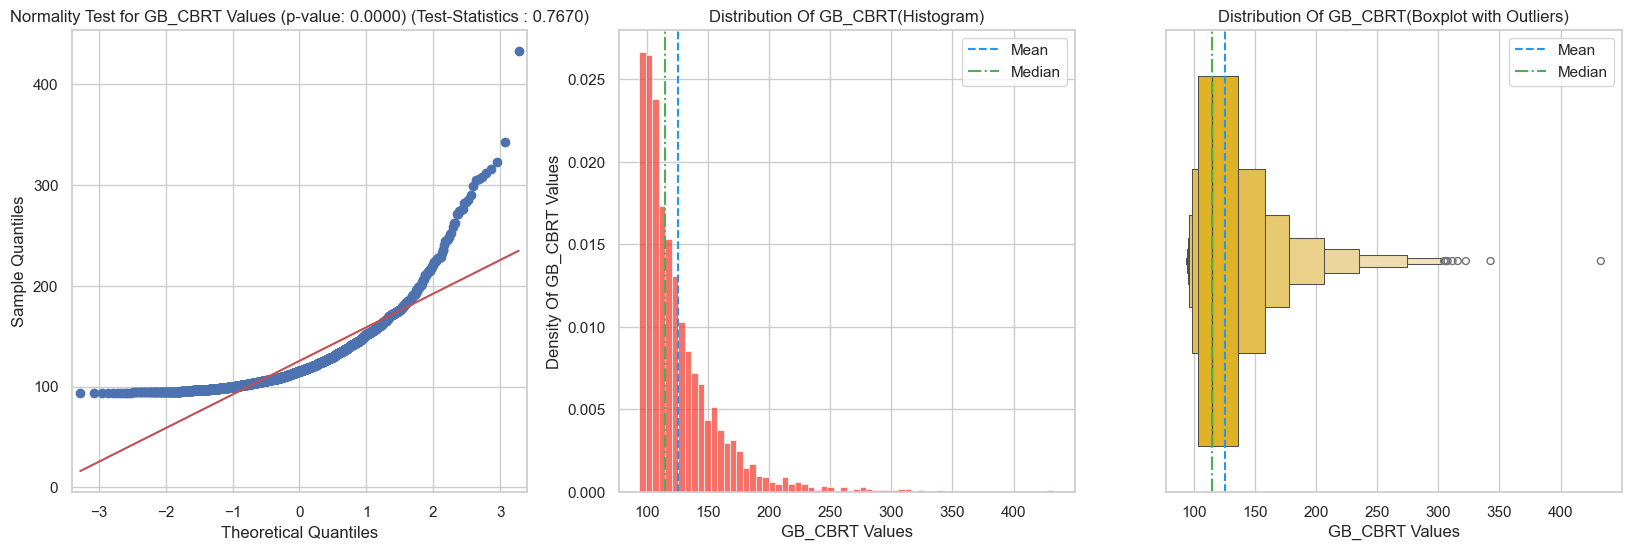

In [39]:
sales_values_CBRT = ['NA_CBRT', 'EU_CBRT', 'JP_CBRT', 'ROW_CBRT', 'GB_CBRT']

for sale in sales_values_CBRT :
    distribution_tests(df, sale, 'norm')

- When I apply transformation to my sales data, I see that my variables such as North America, Europe, Japan, Rest Of World are closer to normal distribution than before, while the skewness in my Global variable still continues.

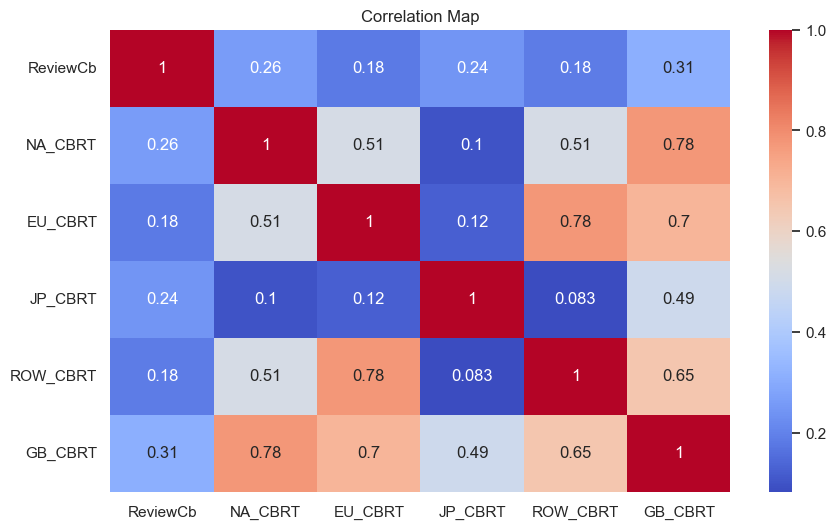

In [40]:
corr_data_tr = df[['ReviewCb', 'NA_CBRT', 'EU_CBRT', 'JP_CBRT', 'ROW_CBRT', 'GB_CBRT']]
corr_matrix_tr = corr_data_tr.corr()
sns.heatmap(corr_matrix_tr, annot=True, cmap='coolwarm')
plt.title('Correlation Map')

del corr_data_tr, corr_matrix_tr

plt.show()

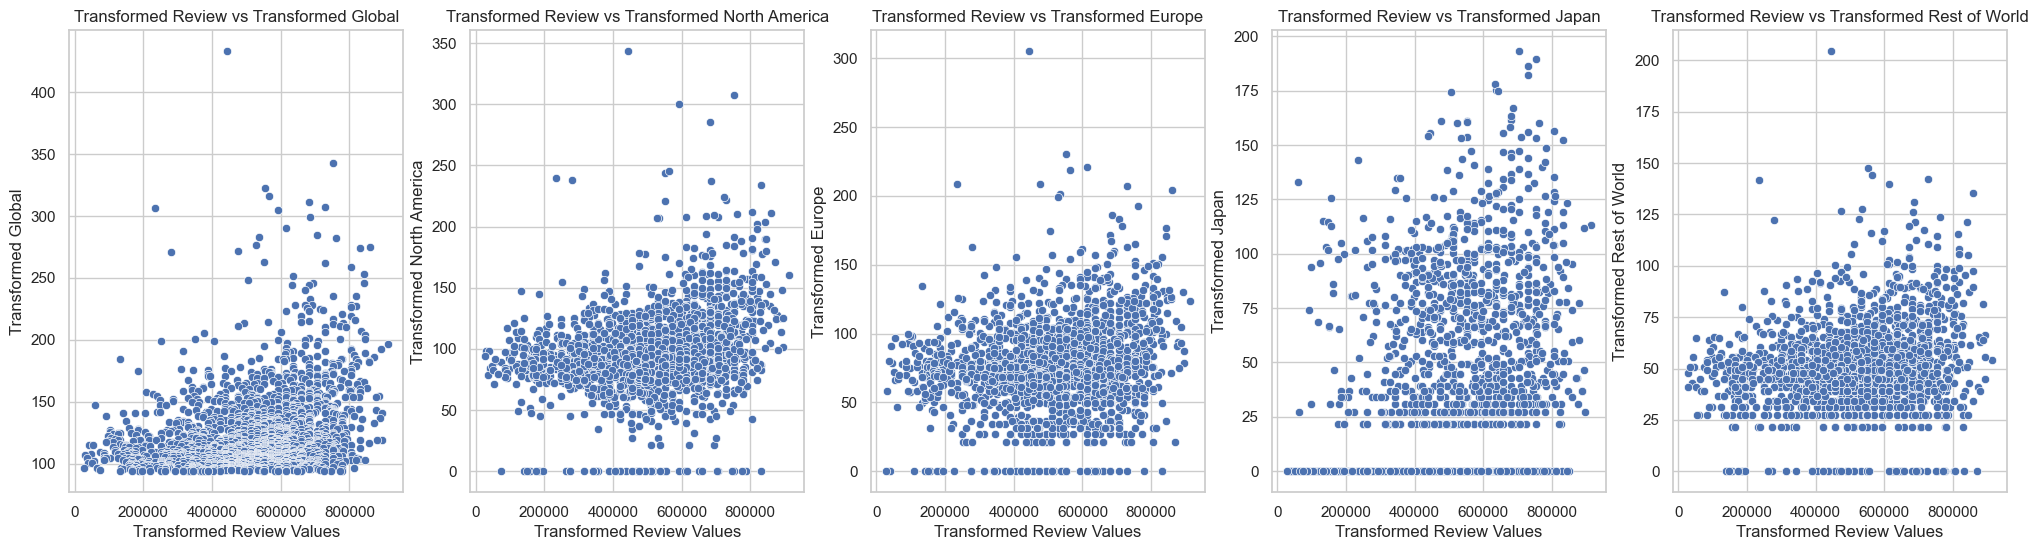

In [41]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(ncols = 5, nrows = 1, figsize = (25,6))
rev_global = sns.scatterplot(data= df, x = 'ReviewCb', y = 'GB_CBRT', ax = ax0)
rev_global.set(xlabel = 'Transformed Review Values', ylabel = 'Transformed Global',title='Transformed Review vs Transformed Global')

rev_NA = sns.scatterplot(data= df, x = 'ReviewCb', y = 'NA_CBRT', ax = ax1)
rev_NA.set(xlabel = 'Transformed Review Values', ylabel = 'Transformed North America',title='Transformed Review vs Transformed North America')

rev_EU = sns.scatterplot(data= df, x = 'ReviewCb', y = 'EU_CBRT', ax = ax2)
rev_EU.set(xlabel = 'Transformed Review Values', ylabel = 'Transformed Europe',title='Transformed Review vs Transformed Europe')

rev_JP = sns.scatterplot(data= df, x = 'ReviewCb', y = 'JP_CBRT', ax = ax3)
rev_JP.set(xlabel = 'Transformed Review Values', ylabel = 'Transformed Japan',title='Transformed Review vs Transformed Japan')

rev_RoW = sns.scatterplot(data= df, x = 'ReviewCb', y = 'ROW_CBRT', ax = ax4)
rev_RoW.set(xlabel = 'Transformed Review Values', ylabel = 'Transformed Rest of World',title='Transformed Review vs Transformed Rest of World')

del rev_global, rev_NA, rev_EU, rev_JP, rev_RoW

plt.show()

Common Features in Charts:

   - Positive Relationship: All graphs show that there is an overall positive relationship between "Transformed Evaluation" and geographical regions. That is, as the "Converted Review" value increases, the number of reviews in the relevant geographic area tends to increase.

   - Data Distribution: Data points show a certain distribution around the regression line. However, this distribution varies from graph to graph. In some graphs, data points exhibit a tighter clustering, while in others a more dispersed structure is observed.

   - Outliers: In all graphs, there are some data points (outliers) that fall quite far from the regression line. These outliers may affect the analysis results.
Differences Between Charts:

Data Density: Some charts (especially Global and North America) have higher data density than others. This indicates that the amount of data in that region is greater and contributes to more reliable analysis results.

Density of Distribution: The distribution of data points varies from graph to graph. In some graphs, data points exhibit a tighter clustering, while in others a more dispersed structure is observed. This may suggest that evaluation behaviors differ in different regions.

Effect of Outliers: The number and distribution of outliers differ from graph to graph. In some graphs, the impact of outliers is more pronounced.

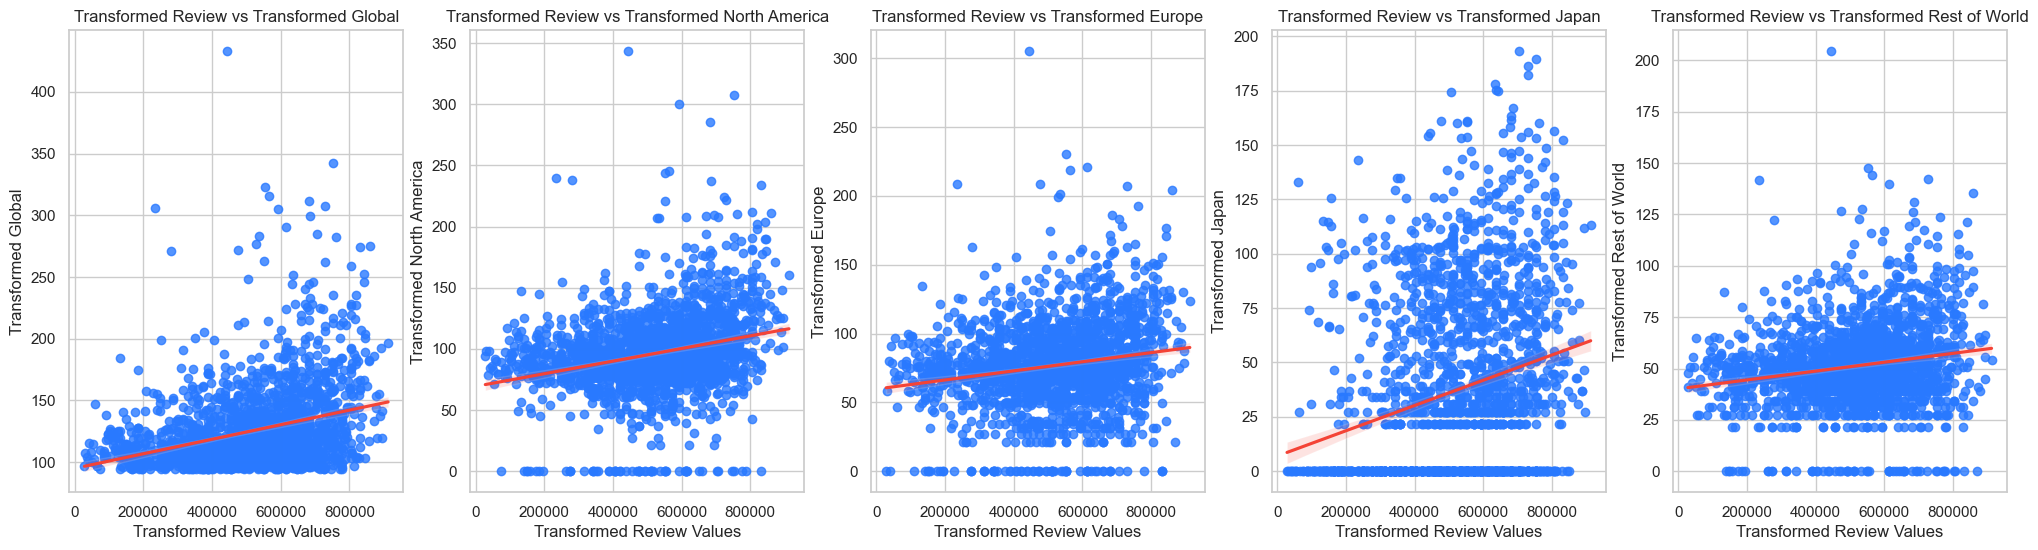

In [42]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(ncols = 5, nrows = 1, figsize = (25,6))
rev_global = sns.regplot(data= df, x = 'ReviewCb', y = 'GB_CBRT', line_kws={"color":"#F44336"}, scatter_kws={"color": "#2979FF"},ax = ax0)
rev_global.set(xlabel = 'Transformed Review Values', ylabel = 'Transformed Global',title='Transformed Review vs Transformed Global')

rev_NA = sns.regplot(data= df, x = 'ReviewCb', y = 'NA_CBRT', line_kws={"color":"#F44336"}, scatter_kws={"color": "#2979FF"},ax = ax1)
rev_NA.set(xlabel = 'Transformed Review Values', ylabel = 'Transformed North America',title='Transformed Review vs Transformed North America')

rev_EU = sns.regplot(data= df, x = 'ReviewCb', y = 'EU_CBRT', line_kws={"color":"#F44336"}, scatter_kws={"color": "#2979FF"},ax = ax2)
rev_EU.set(xlabel = 'Transformed Review Values', ylabel = 'Transformed Europe',title='Transformed Review vs Transformed Europe')

rev_JP = sns.regplot(data= df, x = 'ReviewCb', y = 'JP_CBRT', line_kws={"color":"#F44336"}, scatter_kws={"color": "#2979FF"},ax = ax3)
rev_JP.set(xlabel = 'Transformed Review Values', ylabel = 'Transformed Japan',title='Transformed Review vs Transformed Japan')

rev_RoW = sns.regplot(data= df, x = 'ReviewCb', y = 'ROW_CBRT',line_kws={"color":"#F44336"}, scatter_kws={"color": "#2979FF"}, ax = ax4)
rev_RoW.set(xlabel = 'Transformed Review Values', ylabel = 'Transformed Rest of World',title='Transformed Review vs Transformed Rest of World')

del rev_global, rev_NA, rev_EU, rev_JP, rev_RoW

plt.show()

This is an interesting situation. Let's break down what's happening and explain the implications:

Initial Data Distribution:

    - Review scores: Left-skewed
    - Sales data (North America, Europe, Japan, Rest of World, Global): Right-skewed


Transformations Applied:

    - Review scores: Cube transformation (x^3)
    - Sales data: Cube root transformation (cbrt(x))


Observed Result:

    - Before transformation: Weak relationship between Review and Global sales
    - After transformation: More linear relationship



Explanation:

   - Purpose of Transformations:
        - Transformations are often applied to make data more normally distributed and to linearize relationships between variables. This can help in meeting assumptions of many statistical techniques and can reveal patterns that might be obscured in the original data.

   - Effect of Transformations:

        - Cube transformation (x^3) for left-skewed data (Review scores) tends to spread out smaller values more than larger ones, potentially balancing out the left skew.
        - Cube root transformation (cbrt(x)) for right-skewed data (Sales) compresses larger values more than smaller ones, potentially balancing out the right skew.


Revealing the Underlying Relationship:

    - The more linear relationship you observe after transformation suggests that there is indeed a relationship between review scores and sales, but it was masked by the non-normal distributions of your original data.

Interpretation:

    - The transformation reveals that as transformed review scores increase, transformed sales tend to increase in a more predictable (linear) manner.
This doesn't necessarily mean the relationship is stronger, but rather that it's more consistent across the range of values after accounting for the skewness in both variables.



Logical Explanation and Inference:

   - Non-linear Nature of Original Data:
        - In the original data, the relationship between reviews and sales might have been disproportionate. For example, a small increase in review scores for already highly-rated games might correspond to a large increase in sales, while the same increase for lower-rated games might have little effect.

   - Market Dynamics:
        - This could reflect real-world market dynamics where top-rated games see exponential growth in sales, while lower-rated games struggle to gain traction.

   - Transformed Perspective:
        - The transformations effectively "normalize" these market dynamics, showing a more consistent relationship between the perceived quality of games (reviews) and their market performance (sales).


Statistical Implications:

The more linear relationship after transformation suggests that review scores are indeed a predictor of sales, but the relationship is complex and non-linear in the original scale.
This transformation allows for more reliable use of linear models and correlation analyses.


Practical Implications:

    - For game developers and publishers, this suggests that improving review scores could consistently lead to better sales across the spectrum, but the actual increase in sales (in original units) might be more dramatic for already successful games.


**When explaining this data, you could say:**

"Our analysis reveals a complex but significant relationship between game review scores and global sales. While this relationship wasn't immediately apparent in the raw data due to skewed distributions, appropriate mathematical transformations uncovered a more consistent pattern. This suggests that review scores do influence sales, but the impact varies across the spectrum of game popularity and quality. The transformations we applied help to normalize these market dynamics, allowing us to see a more uniform relationship between game quality (as measured by reviews) and market success (as measured by sales)."

Remember to always note that while the transformations help in analysis and uncovering patterns, any predictions or conclusions should be carefully translated back to the original scale for real-world applicability.



## Analysis For Review Values : 

### Analysis About Transformed Review Values by Genre 

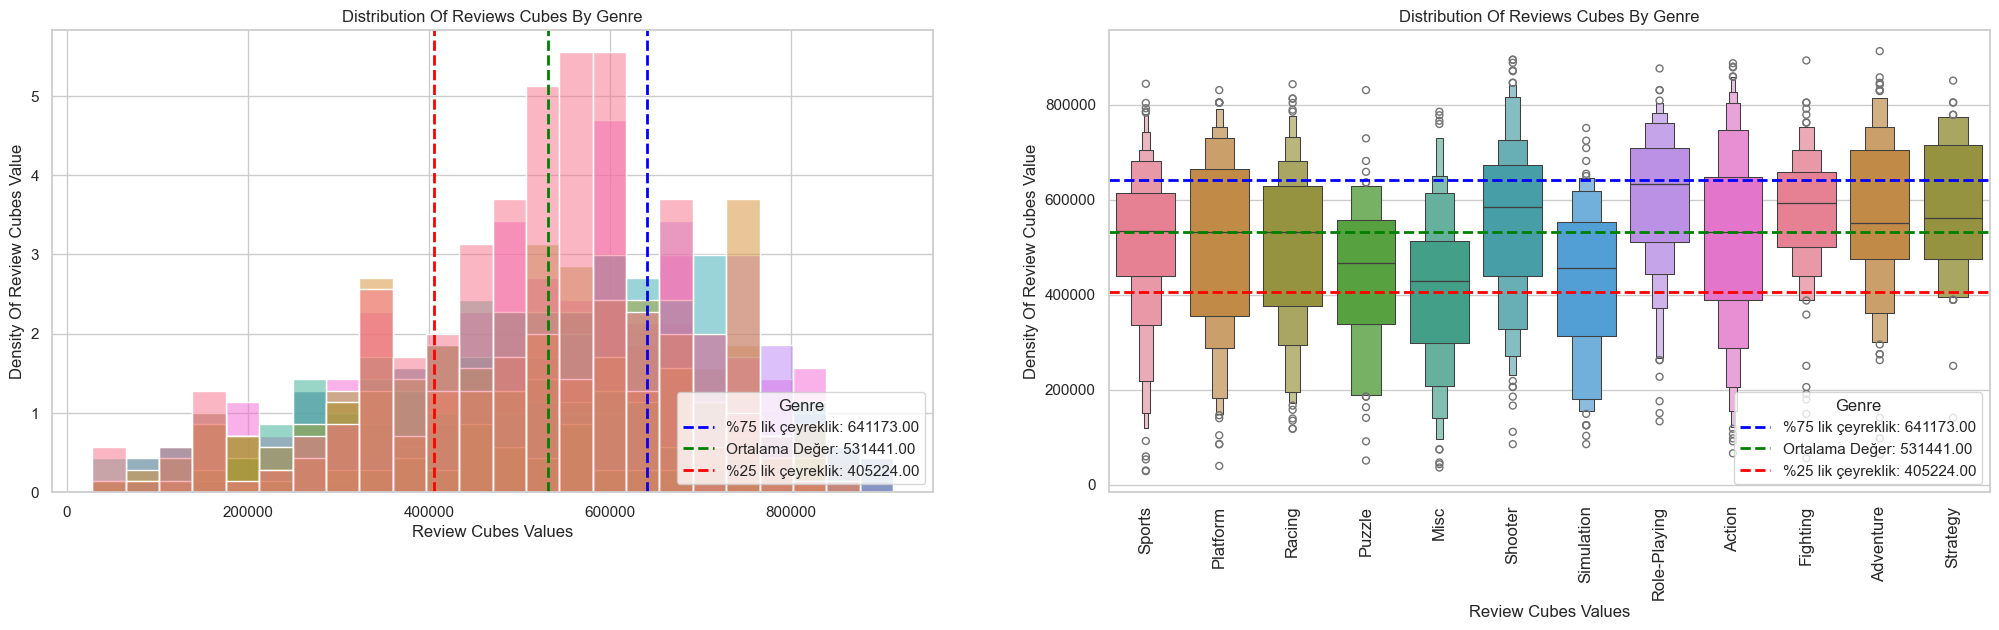

In [43]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))

q1 = df['ReviewCb'].quantile(0.25)
q3 = df['ReviewCb'].quantile(0.75)
median = df['ReviewCb'].median()

custom_palette = sns.color_palette("husl", 9)
review_hist = sns.histplot(data = df,x = 'ReviewCb', stat = 'density', hue = 'Genre', palette = custom_palette,ax = ax0)

review_hist.set_xlabel("Review Cubes Values")
review_hist.set_ylabel("Density Of Review Cubes Value")
review_hist.set_title("Distribution Of Reviews Cubes By Genre",)
review_hist.set_yticklabels(
    review_hist.get_yticklabels(),  
    fontsize = 11
)
#sns.move_legend(chart, "upper left", bbox_to_anchor=(1, 1))

ax0.axvline(x = q3, color = 'blue', linestyle = 'dashed', linewidth = 2 ,label=f"%75 lik çeyreklik: {q3:.2f}")
ax0.axvline(x = median, color = 'green', linestyle = 'dashed', linewidth = 2 , label=f"Ortalama Değer: {median:.2f}")
ax0.axvline(x = q1, color = 'red', linestyle = 'dashed', linewidth = 2 ,label=f"%25 lik çeyreklik: {q1:.2f}")
ax0.legend(title='Genre', loc='lower right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))



review_box = sns.boxenplot(data = df,x = 'Genre',y = 'ReviewCb', palette = custom_palette,ax = ax1)

review_box.set_xlabel("Review Cubes Values")
review_box.set_ylabel("Density Of Review Cubes Value")
review_box.set_title("Distribution Of Reviews Cubes By Genre",)
review_box.set_yticklabels(
    review_box.get_yticklabels(),  
    fontsize = 11
)

review_box.set_xticklabels(
    review_box.get_xticklabels(),  
    fontsize = 12,
    rotation = 90
)


ax1.axhline(y = q3, color = 'blue', linestyle = 'dashed', linewidth = 2 ,label=f"%75 lik çeyreklik: {q3:.2f}")
ax1.axhline(y = median, color = 'green', linestyle = 'dashed', linewidth = 2 , label=f"Ortalama Değer: {median:.2f}")
ax1.axhline(y = q1, color = 'red', linestyle = 'dashed', linewidth = 2 ,label=f"%25 lik çeyreklik: {q1:.2f}")

ax1.legend(title='Genre', bbox_to_anchor=(0.5, 0., 0.5, 0.5), loc='lower right')
sns.set_theme(style = "whitegrid")

del review_hist, review_box, q1,q3, median

plt.show()

- However, as we can see more clearly in our second graph, the median values ​​of Role-playing, shooter, fighting, action games are higher than the others.But we should not forget that the dataset we have is not a homogeneous dataset. High mean-median may be misleading since equal amounts of games from each game round are not evaluated. When we leave this situation aside, game Review points in the Misc type and Simulation game Review Points have lower mean-median.

- Since we are working with an unbalanced data set, the situations seen in these graphs may contain randomness. So I'm going to run a few tests to check whether these graphs we come across have statistical significance.

- First of all, we will sample from the Imbalance dataset with Non-Parametric tests since our data is not normally distributed.


In [44]:
def difference_tests(dataset, stat_column, cat_column ,test_name = 'kruskal', thres = 0.05):
    categories = dataset[cat_column].unique()
    test_groups = [dataset[dataset[cat_column] == cat_value][stat_column] for cat_value in categories]
    
    if test_name == 'kruskal':
        h_statistic, p_value = stats.kruskal(*test_groups)
        if p_value <= thres:
            print(f"{test_name.capitalize()} test Resulsts : \n\t\t The P-Value is {p_value:.5f}, and Test-Statistic is {h_statistic:.5f}.\n\n\t\t Mean of the {p_value:.5f}, 'H0 Hypothesis is Rejected,\n\t\t Fail to reject Ha. So, there is a difference between category's values significantly. \n ")
        
            tukey_results = pairwise_tukeyhsd(dataset[stat_column], dataset[cat_column])
            result_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
            print(result_df[result_df['reject'] == True].sort_values(by = 'meandiff', ascending = False))
        else:
            print(f"{test_name.capitalize()} test Resulsts : \n\t\t The P-Value is {p_value:.5f}, and Test-Statistic is {h_statistic:.5f}.\n\n\t\t Mean of the {p_value:.5f}, 'H0 Hypothesis is Fail to Rejected,\n\t\t Ha is  Rejected. So, there isn't a difference between category's values significantly. \n")

In [45]:
difference_tests(df, 'ReviewCb', 'Genre',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 167.26228.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
          group1        group2   meandiff  p-adj      lower      upper  reject
33          Misc  Role-Playing  191157.89   0.00  130968.32  251347.45    True
46        Puzzle  Role-Playing  164085.38   0.00   71582.71  256588.05    True
37          Misc      Strategy  163019.73   0.00   66109.02  259930.44    True
64    Simulation      Strategy  148269.75   0.00   44508.11  252031.40    True
34          Misc       Shooter  139915.58   0.00   82080.93  197750.22    True
50        Puzzle      Strategy  135947.22   0.01   16257.43  255637.01    True
47        Puzzle       Shooter  112843.07   0.00   21855.12  203831.02    True
51        Racing  Role-Playing  106843.82   0.00   48975.42  164712.22    True
36          Misc        Sports   97802.23   0.00   44301.67

- As can be seen here, when we look at the p-value in our test outputs, we see that it is lower than the alpha level. In this case, we can say that at least two of the Genre variable classes have different Review mean-median values compared to the others.

- Now, to see which groups have different averages with each other, we will use the Tukey Test in scipy.stats.multicomp package to see the differences. 

- In my Kruskal test, I have seen the conclusion between my categories that my Review values ​​show difference.

- After which categories there is this difference? I set out from the question of the Tukey test. After my Tukey tests, I can see it in the table above,

- When I examine the TukeyHSD test results, I see that the groups with the largest difference between their averages are the game groups in the Misc-RolePlaying, Role Playing-Simulation, Misc-Strategy, Fighting -Misc and Puzzle- Role Playing rounds.

### Analysis Review Values By Platform Type

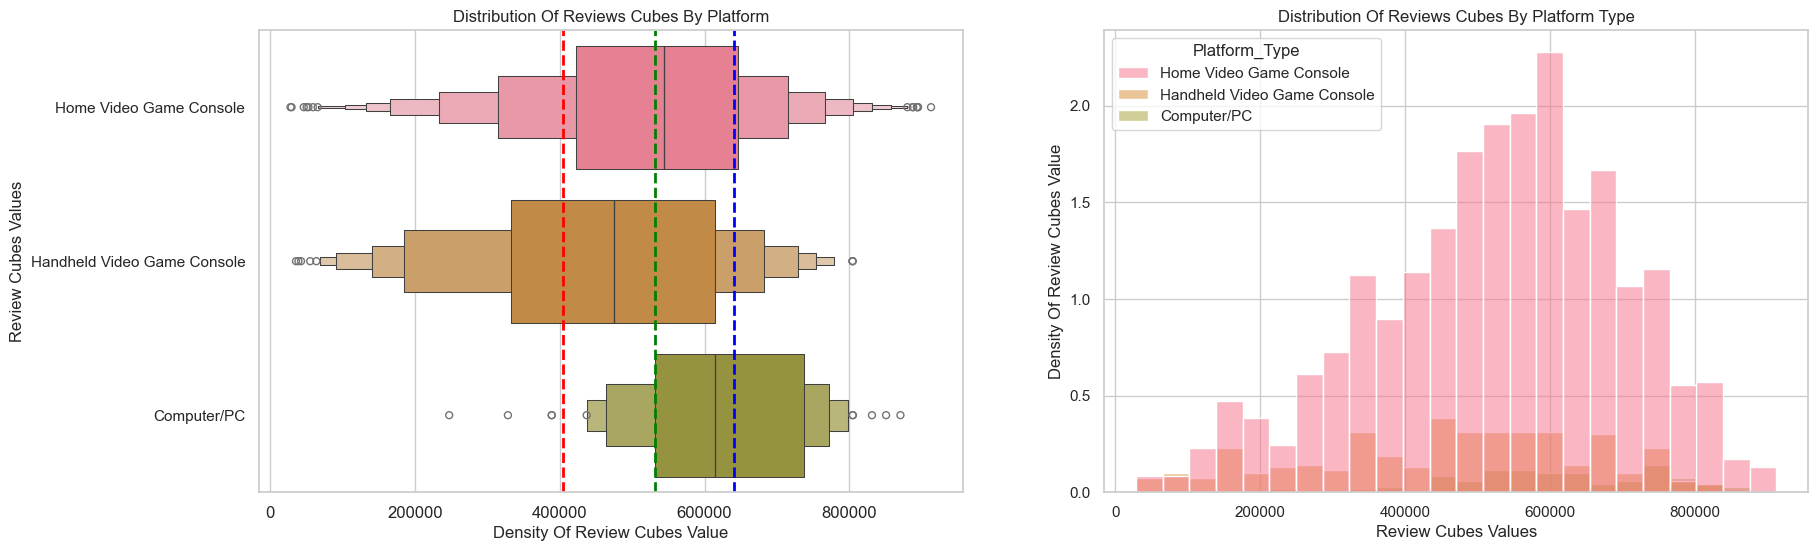

In [46]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

custom_palette = sns.color_palette("husl", 9)
review_hist = sns.histplot(data = df,x = 'ReviewCb', stat = 'density', palette = custom_palette,hue = 'Platform_Type', ax = ax1)

review_hist.set_xlabel("Review Cubes Values")
review_hist.set_ylabel("Density Of Review Cubes Value")
review_hist.set_title("Distribution Of Reviews Cubes By Platform Type",)
review_hist.set_yticklabels(
    review_hist.get_yticklabels(),  
    fontsize = 11
)
#sns.move_legend(chart, "upper left", bbox_to_anchor=(1, 1))

review_box = sns.boxenplot(data = df,y = 'Platform_Type',x = 'ReviewCb',palette = custom_palette, ax = ax0)

review_box.set_ylabel("Review Cubes Values")
review_box.set_xlabel("Density Of Review Cubes Value")
review_box.set_title("Distribution Of Reviews Cubes By Platform",)
review_box.set_xticklabels(
    review_box.get_xticklabels(),  
    fontsize = 11
)

review_box.set_xticklabels(
    review_box.get_xticklabels(),  
    fontsize = 12
)

q1 = df['ReviewCb'].quantile(0.25)
q3 = df['ReviewCb'].quantile(0.75)
median = df['ReviewCb'].median()

ax0.axvline(x = q3, color = 'blue', linestyle = 'dashed', linewidth = 2 ,label=f"%75 Quantile: {q3:.2f}")
ax0.axvline(x = median, color = 'green', linestyle = 'dashed', linewidth = 2 , label=f"Median: {median:.2f}")
ax0.axvline(x = q1, color = 'red', linestyle = 'dashed', linewidth = 2 ,label=f"%25 Quantile: {q1:.2f}")


sns.set_theme(style = "whitegrid")

plt.show()

In [47]:
difference_tests(df, 'ReviewCb', 'Platform_Type',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 50.85829.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
                        group1                       group2   meandiff  p-adj      lower      upper  reject
2  Handheld Video Game Console      Home Video Game Console   68783.68   0.00   42847.43   94719.93    True
1                  Computer/PC      Home Video Game Console  -90178.18   0.00 -139160.59  -41195.76    True
0                  Computer/PC  Handheld Video Game Console -158961.86   0.00 -212456.33 -105467.38    True


- We again perform an another Kruskal Test for Platform Type. And P Value resulted as smaller than alpha value. This mean is, there is a significantly differences between Platform Type classes. Well, we'll perform another Tukey test.

- Significant Differences: All comparisons show "True" in the reject column, indicating statistically significant differences between all pairs of platform types at the 0.05 alpha level.
- P-values: All adjusted p-values (p-adj column) are less than 0.05, confirming the significant differences.

- Confidence Intervals: The lower and upper bounds do not include 0 for any comparison, supporting the significant differences.

### Analysis Review Values By Platform

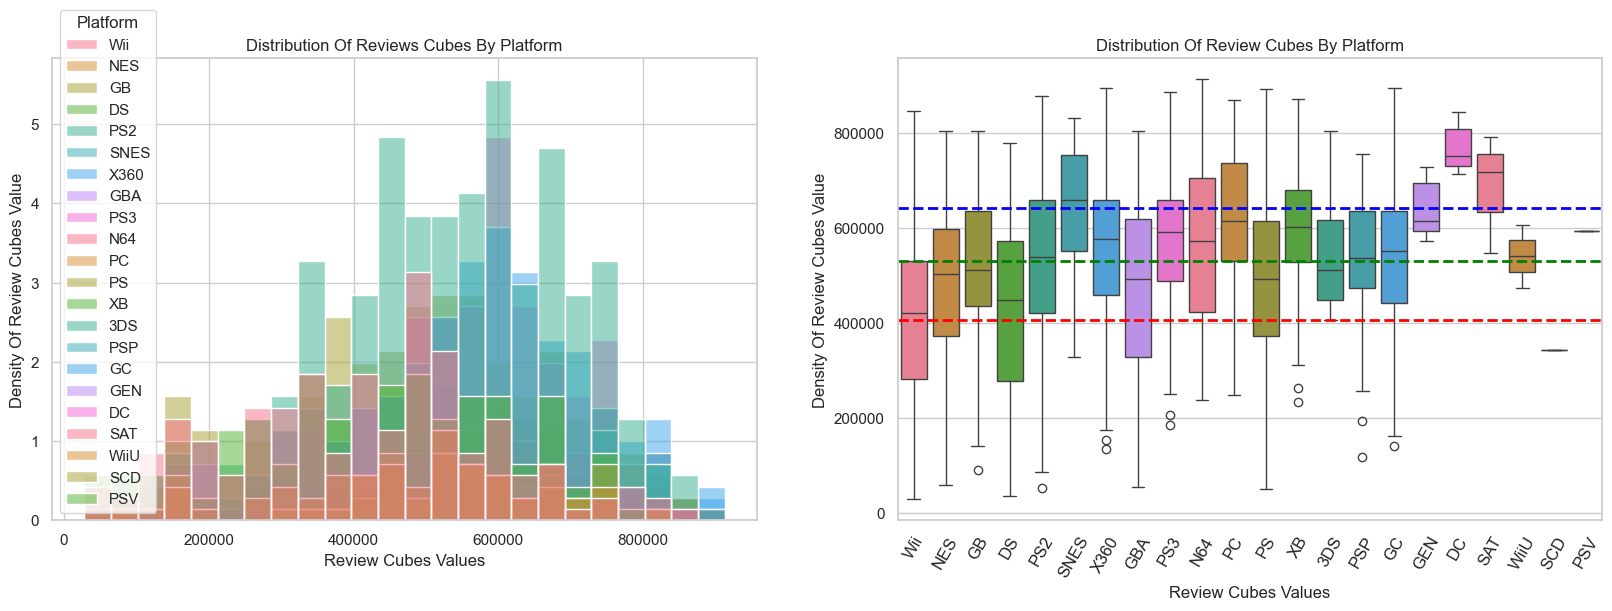

In [48]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
custom_palette = sns.color_palette("husl", 9)
review_hist = sns.histplot(data = df,x = 'ReviewCb', stat = 'density', palette = custom_palette,hue = 'Platform', ax = ax0)

review_hist.set_xlabel("Review Cubes Values")
review_hist.set_ylabel("Density Of Review Cubes Value")
review_hist.set_title("Distribution Of Reviews Cubes By Platform",)
review_hist.set_yticklabels(
    review_hist.get_yticklabels(),  
    fontsize = 11
)
#sns.move_legend(chart, "upper left", bbox_to_anchor=(1, 1))

review_box = sns.boxplot(data = df,x = 'Platform',y = 'ReviewCb',palette= custom_palette, ax = ax1)

review_box.set_xlabel("Review Cubes Values")
review_box.set_ylabel("Density Of Review Cubes Value")
review_box.set_title("Distribution Of Review Cubes By Platform",)
review_box.set_yticklabels(
    review_box.get_yticklabels(),  
    fontsize = 11
)

review_box.set_xticklabels(
    review_box.get_xticklabels(),  
    fontsize = 12,
    rotation = 60
)

q1 = df['ReviewCb'].quantile(0.25)
q3 = df['ReviewCb'].quantile(0.75)
median = df['ReviewCb'].median()

ax1.axhline(y = q3, color = 'blue', linestyle = 'dashed', linewidth = 2 ,label=f"%75 Quantile: {q3:.2f}")
ax1.axhline(y = median, color = 'green', linestyle = 'dashed', linewidth = 2 , label=f"Median Value: {median:.2f}")
ax1.axhline(y = q1, color = 'red', linestyle = 'dashed', linewidth = 2 ,label=f"%25 Quantile: {q1:.2f}")


sns.set_theme(style = "whitegrid")

plt.show()

In [49]:
difference_tests(df, 'ReviewCb', 'Platform',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 226.42224.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
    group1 group2   meandiff  p-adj      lower      upper  reject
55      DS   SNES  219727.27   0.00  115559.26  323895.28    True
44      DS    GEN  210699.42   0.01   26149.81  395249.03    True
90     GBA   SNES  188480.59   0.00   73757.98  303203.21    True
47      DS     PC  187045.08   0.00  101866.26  272223.91    True
227    Wii     XB  184422.48   0.00  100680.85  268164.10    True
148    NES   SNES  176167.82   0.00   56483.91  295851.72    True
171     PS   SNES  173285.26   0.00   72916.11  273654.40    True
59      DS     XB  167348.40   0.00   82571.15  252125.66    True
82     GBA     PC  155798.40   0.00   57993.82  253602.99    True
226    Wii   X360  149734.80   0.00   88415.19  211054.42    True
140    NES     PC  143485.63   0.00   39906.

- When I examine the Tukey Test results, I see that the binary groups with the largest difference between the median review values ​​of the platforms are DS - SNES, DS-GEN, DS-PC, DC-Wii, DC-DS, DC-GBA, DC-PS.

### Analysis About Review Values By Console Generation

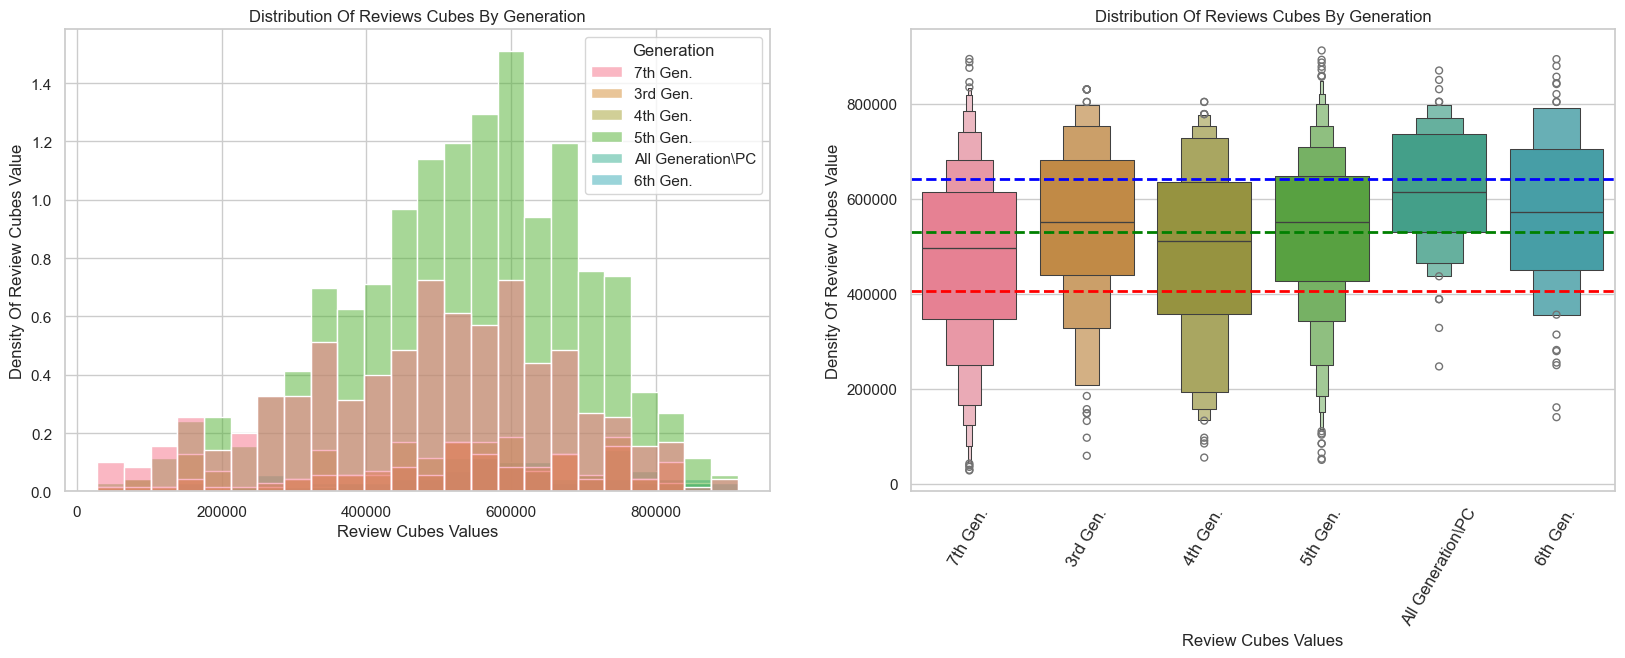

In [50]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
custom_palette = sns.color_palette("husl", 9)
review_hist = sns.histplot(data = df,x = 'ReviewCb', stat = 'density', palette = custom_palette ,hue = 'Generation', ax = ax0)

review_hist.set_xlabel("Review Cubes Values")
review_hist.set_ylabel("Density Of Review Cubes Value")
review_hist.set_title("Distribution Of Reviews Cubes By Generation",)
review_hist.set_yticklabels(
    review_hist.get_yticklabels(),  
    fontsize = 11
)
#sns.move_legend(chart, "upper left", bbox_to_anchor=(1, 1))

review_box = sns.boxenplot(data = df,x = 'Generation',y = 'ReviewCb',palette =custom_palette, ax = ax1)

review_box.set_xlabel("Review Cubes Values")
review_box.set_ylabel("Density Of Review Cubes Value")
review_box.set_title("Distribution Of Reviews Cubes By Generation",)
review_box.set_yticklabels(
    review_box.get_yticklabels(),  
    fontsize = 11
)

review_box.set_xticklabels(
    review_box.get_xticklabels(),  
    fontsize = 12,
    rotation = 60
)

q1 = df['ReviewCb'].quantile(0.25)
q3 = df['ReviewCb'].quantile(0.75)
median = df['ReviewCb'].median()

ax1.axhline(y = q3, color = 'blue', linestyle = 'dashed', linewidth = 2 ,label=f"%75 Quantile: {q3:.2f}")
ax1.axhline(y = median, color = 'green', linestyle = 'dashed', linewidth = 2 , label=f"Median Value: {median:.2f}")
ax1.axhline(y = q1, color = 'red', linestyle = 'dashed', linewidth = 2 ,label=f"%25 Quantile: {q1:.2f}")


sns.set_theme(style = "whitegrid")

plt.show()

- In the Boxen plot graph on the right, Review values ​​in other generations except PC are distributed very similarly to each other. Let's test again to see this:

In [51]:
difference_tests(df, 'ReviewCb', 'Generation',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 56.54735.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
      group1             group2  meandiff  p-adj      lower     upper  reject
14  7th Gen.  All Generation\PC 135306.00   0.00   73376.96 197235.04    True
8   4th Gen.  All Generation\PC 123568.88   0.00   51604.97 195532.80    True
11  5th Gen.  All Generation\PC  85243.14   0.00   24939.40 145546.88    True
6   4th Gen.           6th Gen.  77116.90   0.04    1385.94 152847.86    True
10  5th Gen.           7th Gen. -50062.86   0.00  -76216.11 -23909.62    True
3   3rd Gen.           7th Gen. -63334.04   0.01 -116504.74 -10163.34    True
12  6th Gen.           7th Gen. -88854.02   0.00 -155123.00 -22585.03    True


- When we examine the test results above, we see that there are significant differences between some binary pairs. Namely,
    - 3rd Gen. vs 7th Gen. (p-adj = 0.01)
    - 4th Gen. vs 7th Gen. (p-adj < alpha)
    - 4th Gen. vs All Generation\PC (p-adj < alpha)
    - 5th Gen. vs 7th Gen. (p-adj < alpha)
    - 5th Gen. vs All Generation\PC (p-adj < alpha)
    - 6th Gen. vs 7th Gen. (p-adj < alpha )
    - 7th Gen. vs All Generation\PC (p-adj < alpha)
 
- There are significant review differences between pairs. However, when we consider the meandiff column in the table,

    - 7th Gen. vs All Generation\PC: 135306.00
    - 5th Gen. vs All Generation\PC: 85243.14
    - 4th Gen. vs All Generation\PC: 123568.88
    - 6th Gen. vs 7th Generation : -88854.02

    there are significant differences between the pairs.

- There are no significant differences between most adjacent generations (e.g. 3rd vs 4th, 4th vs 5th), suggesting gradual changes except 6th vs 7th.

- The "All Generation\PC" category appears to be significantly different from later generations (4th, 5th, 7th), indicating a possible trend or shift over time.

### Analysis About Review Values By Publisher

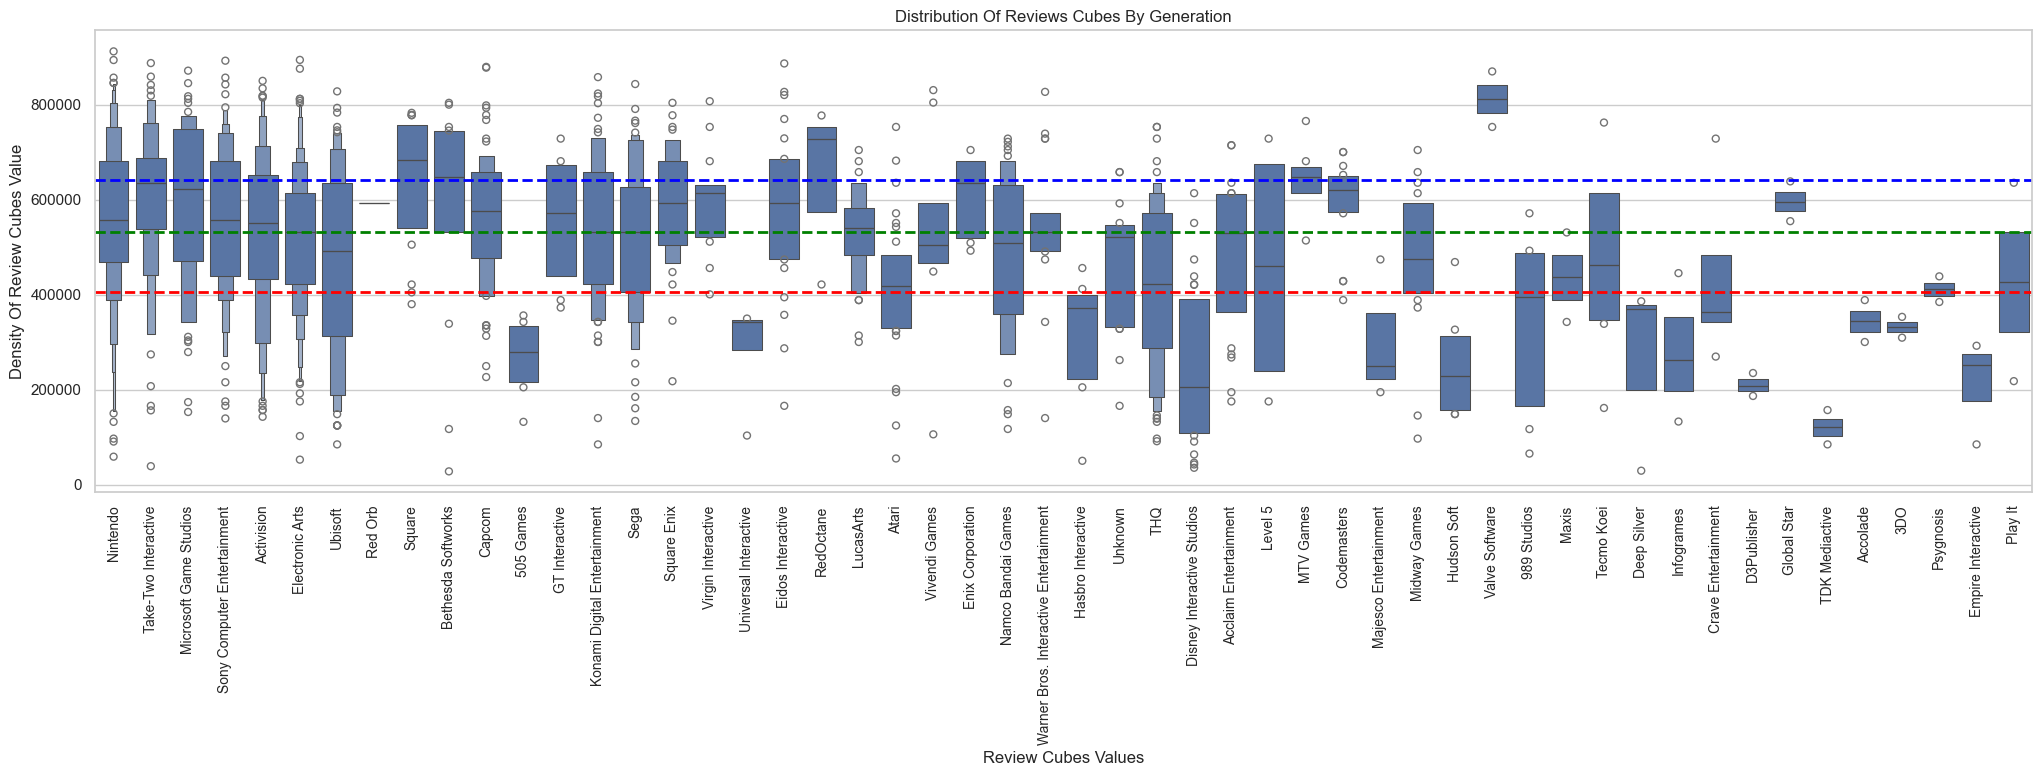

In [52]:
fig, ax = plt.subplots(figsize=(25, 6))

value_counts = df['Publisher'].value_counts()
frequent_publishers = value_counts[value_counts > 1].index.tolist()
df_frequent = df[df['Publisher'].isin(frequent_publishers)]


review_box = sns.boxenplot(data = df_frequent,x = 'Publisher',y = 'ReviewCb', ax = ax)

review_box.set_xlabel("Review Cubes Values")
review_box.set_ylabel("Density Of Review Cubes Value")
review_box.set_title("Distribution Of Reviews Cubes By Generation",)
review_box.set_yticklabels(
    review_box.get_yticklabels(),  
    fontsize = 11
)

review_box.set_xticklabels(
    review_box.get_xticklabels(),  
    fontsize = 10,
    rotation = 90
)

q1 = df['ReviewCb'].quantile(0.25)
q3 = df['ReviewCb'].quantile(0.75)
median = df['ReviewCb'].median()

ax.axhline(y = q3, color = 'blue', linestyle = 'dashed', linewidth = 2 ,label=f"%75 Quantile: {q3:.2f}")
ax.axhline(y = median, color = 'green', linestyle = 'dashed', linewidth = 2 , label=f"Median Value: {median:.2f}")
ax.axhline(y = q1, color = 'red', linestyle = 'dashed', linewidth = 2 ,label=f"%25 Quantile: {q1:.2f}")


sns.set_theme(style = "whitegrid")

plt.show()

In [53]:
difference_tests(df_frequent, 'ReviewCb', 'Publisher',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 264.36551.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
                            group1                                  group2   meandiff  p-adj       lower      upper  reject
1277                TDK Mediactive                          Valve Software  690679.89   0.02    48700.88 1332658.90    True
542                    D3Publisher                          Valve Software  601520.43   0.03    15476.46 1187564.41    True
727             Empire Interactive                          Valve Software  595902.16   0.01    58783.99 1133020.34    True
619     Disney Interactive Studios                          Valve Software  560074.35   0.00    87590.59 1032558.10    True
887                    Hudson Soft                          Valve Software  553036.42   0.02    28862.76 1077210.09    True
97                       5

- Here is, we see the results of Kruskal Test. And, we found a significantly differences between publisher classes.

## Sales Values Analysis : 

### Is there a differences between Locations ? (North America, Asia etc.)

- Previously, before starting my exploratory data analysis studies, I had performed a cbrt transformation on my sales data while examining the relationship between my review variable and my sales data. Since I have made this transformation, I will continue to work on the sales data that I have transformed in the next stages.

- Additionally, I need to perform normality assumption and variance homogeneity tests to see whether my sales figures in different regions are based on a statistical basis. Previously, I had performed the normality assumption test after making the transformation. My converted sales data are still not normally distributed, but they are close to normal distribution in appearance.

In [54]:
north_america_CBRT = df['NA_CBRT']
europe_CBRT = df['EU_CBRT']
japan_CBRT = df['JP_CBRT']
rest_of_world_CBRT = df['ROW_CBRT']

levene_statistic, p_value = stats.levene(north_america_CBRT, europe_CBRT, japan_CBRT, rest_of_world_CBRT)

print(f"Levene's test statistic: {levene_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05  # common significance level
if p_value > alpha:
    print("Fail to reject the null hypothesis. The variances are homogeneous.")
else:
    print("Reject the null hypothesis. The variances are not homogeneous.")

Levene's test statistic: 223.9340
p-value: 0.0000
Reject the null hypothesis. The variances are not homogeneous.


- 4 different sales in the data set (global business variable, North America, Europe, Japan, Rest of World, I do not take this value because it includes the sum of the variables.) .

- In the above graphics and the Shapiro Wilks test, I saw that 4 variables were not normal according to the results of Anderson Darling test results. In order to test whether there was significant difference between these 4 changes, I had to look at the variance homogeneity to decide which of the parametric or non-parametric tests. Above, according to the results of the Levene test, I saw that the variances of 4 varieties were not homogeneous.

- In this case, I would like to do Kruskal Wallis H test to see if there is a difference between 4 changes. This test is Non-Parametric Test and is used in cases where the assumptions of normality and variance homogeneity are not provided.

In [55]:
statistic, p_value = stats.kruskal(north_america_CBRT, europe_CBRT, japan_CBRT, rest_of_world_CBRT)

print(f'Kruskal-Wallis test statistic: {statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Interpret the results
alpha = 0.05  # common significance level
if p_value <= alpha:
    print("Reject the null hypothesis. There are significant differences among the groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences among the groups.")

Kruskal-Wallis test statistic: 2764.8247
p-value: 0.0000
Reject the null hypothesis. There are significant differences among the groups.


Dunn's test results (p-values):
          EU_CBRT  JP_CBRT  NA_CBRT  ROW_CBRT
EU_CBRT      1.00     0.00     0.00      0.00
JP_CBRT      0.00     1.00     0.00      0.00
NA_CBRT      0.00     0.00     1.00      0.00
ROW_CBRT     0.00     0.00     0.00      1.00


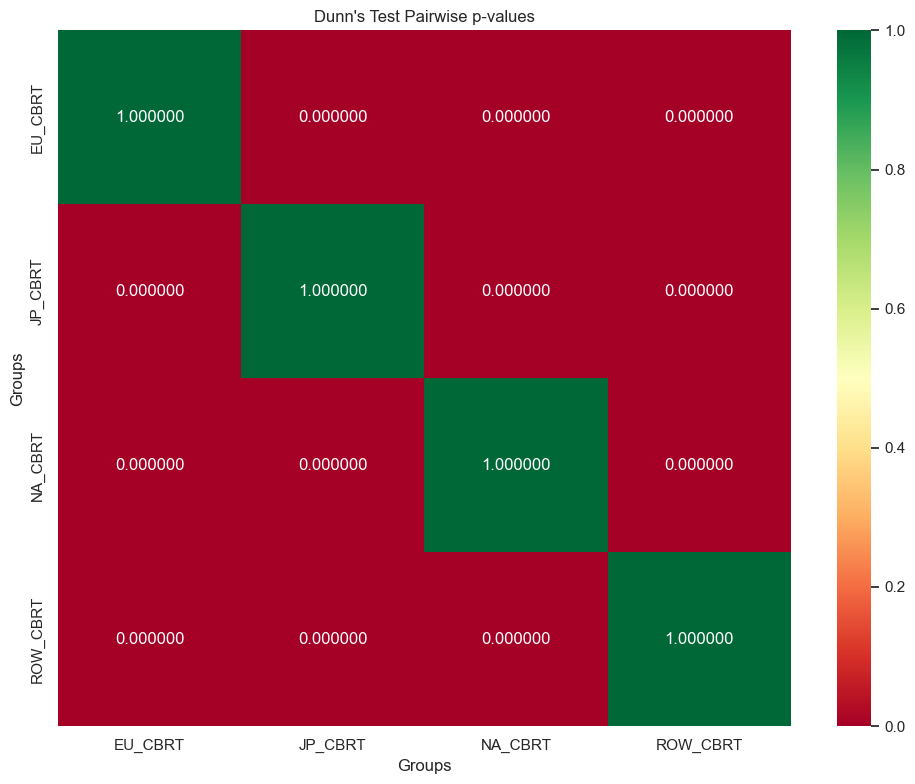


Mean differences:
NA_CBRT - EU_CBRT: 19.2704
NA_CBRT - JP_CBRT: 58.9910
NA_CBRT - ROW_CBRT: 44.8217
EU_CBRT - JP_CBRT: 39.7205
EU_CBRT - ROW_CBRT: 25.5513
JP_CBRT - ROW_CBRT: -14.1693


In [56]:
data_temp = pd.DataFrame({
    'value': pd.concat([north_america_CBRT, europe_CBRT, japan_CBRT, rest_of_world_CBRT]),
    'group': ['NA_CBRT'] * len(north_america_CBRT) +
             ['EU_CBRT'] * len(europe_CBRT) +
             ['JP_CBRT'] * len(japan_CBRT) +
             ['ROW_CBRT'] * len(rest_of_world_CBRT)
})

# Perform Dunn's test
import matplotlib.colors as colors 
dunn_result = sp.posthoc_dunn(data_temp, val_col='value', group_col='group', p_adjust='bonferroni')

# Print the results
print("Dunn's test results (p-values):")
print(dunn_result)




# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_result, annot=True, cmap='RdYlGn', fmt=".6f")  # Adjust formatting as needed
plt.title("Dunn's Test Pairwise p-values")
plt.xlabel("Groups")
plt.ylabel("Groups")
plt.tight_layout()
plt.show()


# Calculate and print mean differences
groups = ['NA_CBRT', 'EU_CBRT', 'JP_CBRT', 'ROW_CBRT']
print("\nMean differences:")
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        diff = data_temp[data_temp['group'] == groups[i]]['value'].mean() - data_temp[data_temp['group'] == groups[j]]['value'].mean()
        print(f"{groups[i]} - {groups[j]}: {diff:.4f}")

- Based on the results, you can conclude that there are statistically significant differences in value between all groups. You can also identify the groups with the highest and lowest average values, and calculate the magnitude of the mean differences between specific groups.

- The heatmap shows the p-values for all pairwise comparisons between groups. A low p-value (typically less than 0.05) indicates that the difference in means between two groups is statistically significant after accounting for multiple comparisons using the Bonferroni correction.

- In heatmap, all the p-values are 0.00, which means that all pairwise comparisons are statistically significant. You can comment on this by saying:

    - "The results of Dunn's test with Bonferroni correction for multiple comparisons show statistically significant differences in value between all groups (p-value < 0.00)."
    

- The code calculates the mean difference in value between each pair of groups. For example, "North America cbrt - Europe cbrt : 19.2704" means that the average transoformed value in the North America group is 19.2704 higher than the average transformed value in the Europe group.

- You can comment on the mean differences between the groups that you are most interested in. For example, you might say:

    - "The North America group has the highest average value (followed by Europe, Japan, and Rest of World)."
    - "The mean difference in transformed value between North America and Europe is 19.2704."

In [57]:
def hist_box_distribution(dataset, stat_column , cat_column):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    custom_palette = sns.color_palette("husl", 9)
    hist_dataset = sns.histplot(data = dataset,x = stat_column, stat = 'density', palette = custom_palette ,hue = cat_column, ax = ax0)

    hist_dataset.set_xlabel(f"{stat_column} Sales Values")
    hist_dataset.set_ylabel(f"Density Of {stat_column} Sales Value")
    hist_dataset.set_title(f"Distribution Of {stat_column} By {cat_column}",)
    hist_dataset.set_yticklabels(
        hist_dataset.get_yticklabels(),  
        fontsize = 11
    )
    #sns.move_legend(chart, "upper left", bbox_to_anchor=(1, 1))
    
   
    box_dataset = sns.boxenplot(data = dataset,x = cat_column,y = stat_column ,palette = custom_palette, ax = ax1)

    box_dataset.set_xlabel(f"{stat_column} Values")
    box_dataset.set_ylabel(f"Density Of {stat_column} Value")
    box_dataset.set_title(f"Distribution Of {stat_column} By {cat_column}",)
    box_dataset.set_yticklabels(
        box_dataset.get_yticklabels(),  
        fontsize = 12
        )

    box_dataset.set_xticklabels(box_dataset.get_xticklabels(),  
        fontsize = 12,rotation = 60
                                
        )

    q1 = dataset[stat_column].quantile(0.25)
    q3 = dataset[stat_column].quantile(0.75)
    median = dataset[stat_column].median()

    ax1.axhline(y = q3, color = 'blue', linestyle = 'dashed', linewidth = 2 ,label=f"%75. Quantile: {q3:.2f}")
    ax1.axhline(y = median, color = 'green', linestyle = 'dashed', linewidth = 2 , label=f"Mean Value: {median:.2f}")
    ax1.axhline(y = q1, color = 'red', linestyle = 'dashed', linewidth = 2 ,label=f"%25. Quantile: {q1:.2f}")
    
    ax0.axvline(x = q3, color = 'blue', linestyle = 'dashed', linewidth = 2 ,label=f"%75. Quantile: {q3:.2f}")
    ax0.axvline(x = median, color = 'green', linestyle = 'dashed', linewidth = 2 , label=f"Mean Value: {median:.2f}")
    ax0.axvline(x = q1, color = 'red', linestyle = 'dashed', linewidth = 2 ,label=f"%25. Quantile: {q1:.2f}")
    
    
    
    sns.set_theme(style = "whitegrid")

    plt.show()

## North America Sales Analysis :

### North America Sales Analysis Between Generation : 

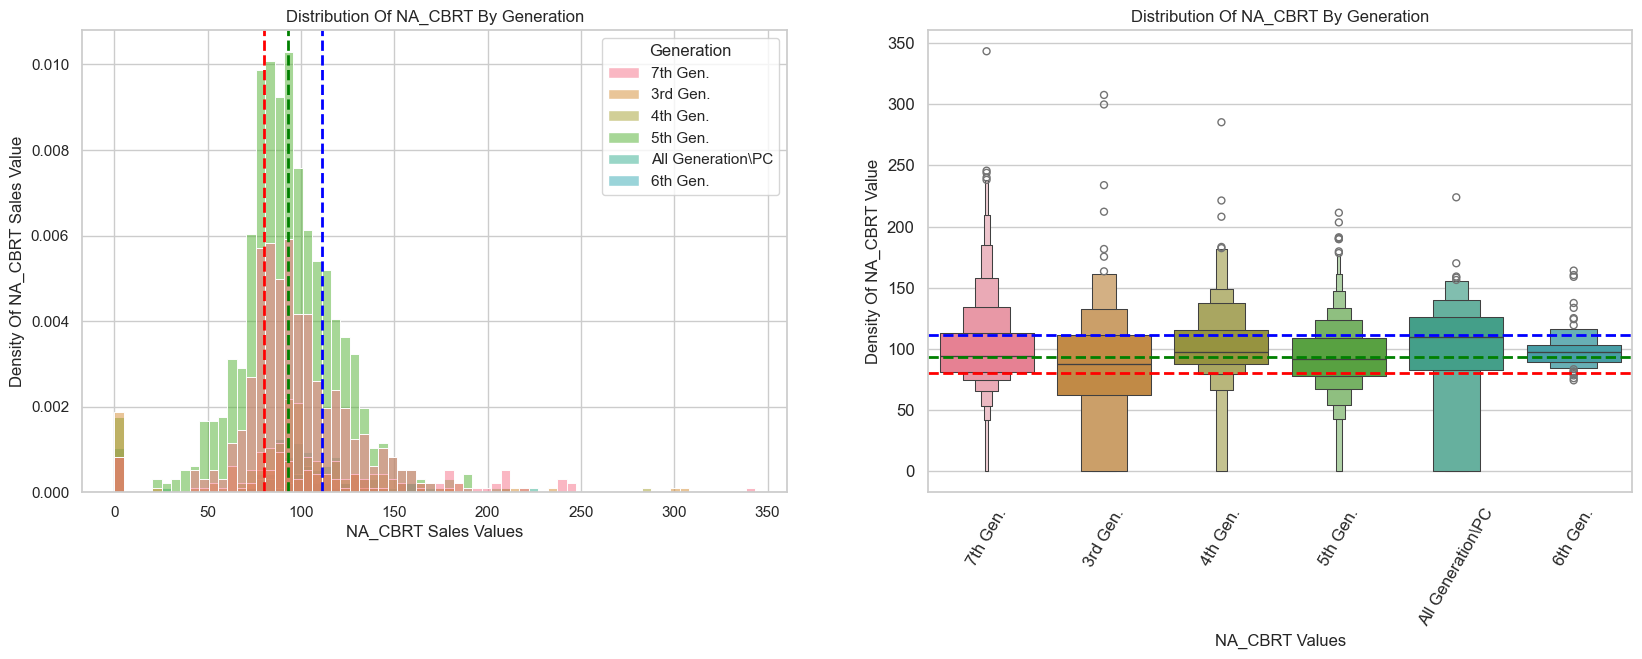

In [58]:
hist_box_distribution(df, 'NA_CBRT', 'Generation')

In [59]:
difference_tests(df, 'NA_CBRT', 'Generation',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 35.91449.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
      group1    group2  meandiff  p-adj  lower  upper  reject
0   3rd Gen.  4th Gen.     15.35   0.01   2.48  28.22    True
3   3rd Gen.  7th Gen.     15.20   0.00   4.60  25.80    True
10  5th Gen.  7th Gen.      8.12   0.00   2.91  13.33    True


- This analysis shows that there are significant differences between the purchasing behaviors of different generations in the North American market. For example, there are significant differences between generation 5 and 4, 5th and 7th generations, 3rd and 5th generation. This indicates that the sales behaviors of these generations are different from each other.

- The fact that different generations' interests and preferences for products require companies to shape their marketing strategies according to these differences.

- According to the results of the analysis, there are statistically significant differences in sales between different generations in North America. These differences may be caused by factors such as consumption habits of each generation, preferred products or demographic characteristics.

### North America Sales Analysis About Platform Types 

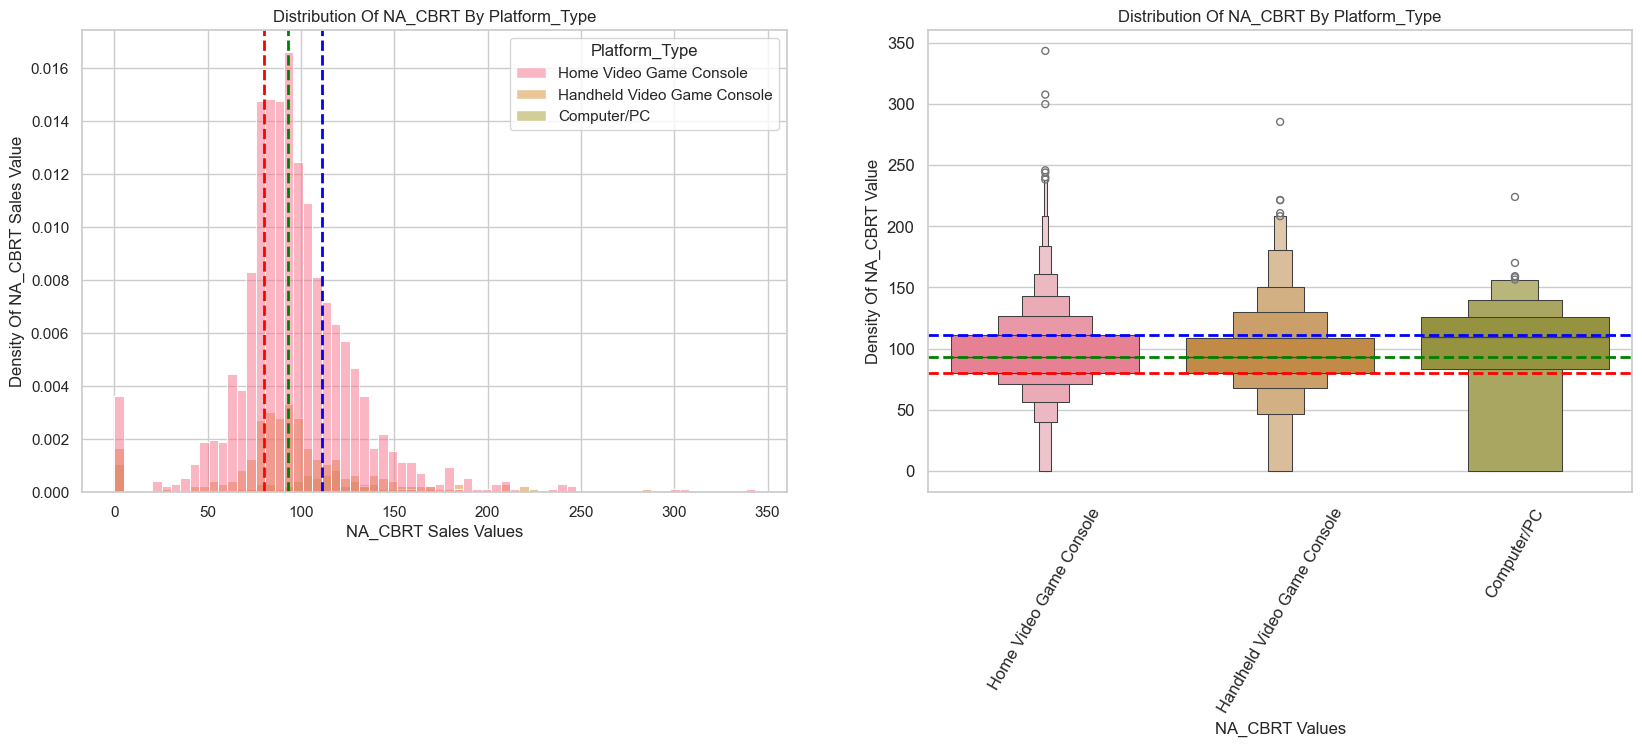

In [60]:
hist_box_distribution(df, 'NA_CBRT', 'Platform_Type')

In [61]:
difference_tests(df, 'NA_CBRT', 'Platform_Type',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00938, and Test-Statistic is 9.33819.

		 Mean of the 0.00938, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
Empty DataFrame
Columns: [group1, group2, meandiff, p-adj, lower, upper, reject]
Index: []


- This analysis shows that the sales of different game platform species in North America are different from each other. In other words, it is concluded that there is a statistically significant difference between the averages of sales between different platform species. These differences may be due to many factors such as platform types of players, features of games, marketing strategies.

### North America Sales Analysis Between Platforms : 

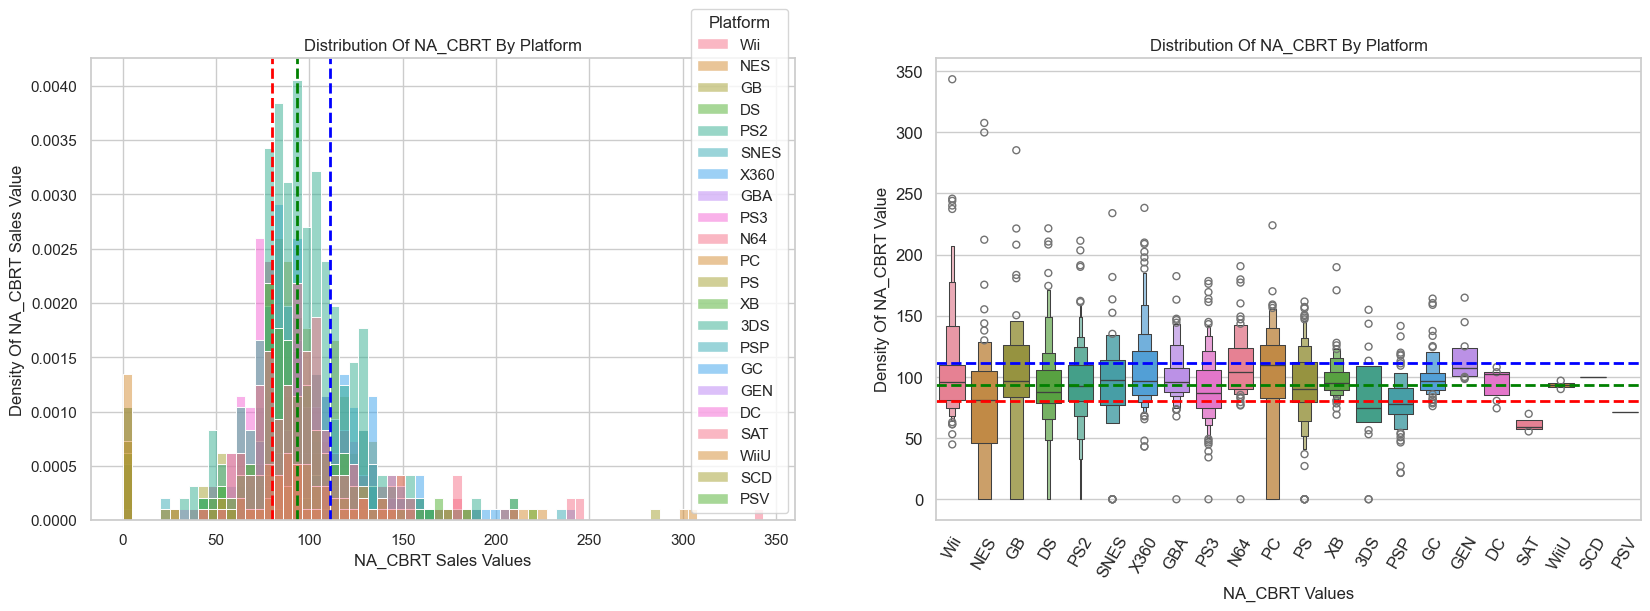

In [62]:
hist_box_distribution(df, 'NA_CBRT', 'Platform')

In [63]:
difference_tests(df, 'NA_CBRT', 'Platform',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 126.65255.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
    group1 group2  meandiff  p-adj  lower  upper  reject
201    PSP   X360     27.28   0.00   9.83  44.73    True
199    PSP    Wii     25.98   0.00   7.84  44.12    True
151    NES   X360     25.37   0.00   7.58  43.15    True
149    NES    Wii     24.06   0.00   5.60  42.52    True
193    PS3   X360     15.28   0.00   3.38  27.19    True
191    PS3    Wii     13.98   0.02   1.08  26.87    True
58      DS   X360     13.73   0.02   0.77  26.70    True
174     PS   X360     13.52   0.01   1.91  25.13    True
184    PS2   X360     12.25   0.00   1.85  22.65    True
86     GBA    PSP    -21.23   0.04 -42.09  -0.36    True
126    N64    NES    -27.92   0.00 -50.49  -5.34    True
131    N64    PSP    -29.83   0.00 -52.15  -7.52    True


- Kruskal-Wallis Test Results

    - P-value: Calculated as 0.00000. This is a very low value and indicates that there is a statistically significant difference between the average of sales between different platforms. So, it can be said that there is a real sales difference between different platforms, not by chance.
    
    - Test Statistics: 126.65255. This value indicates the magnitude of the difference between different platforms. The high value indicates that the difference between the platforms is quite large.

### North America Sales Analysis Between Genre:

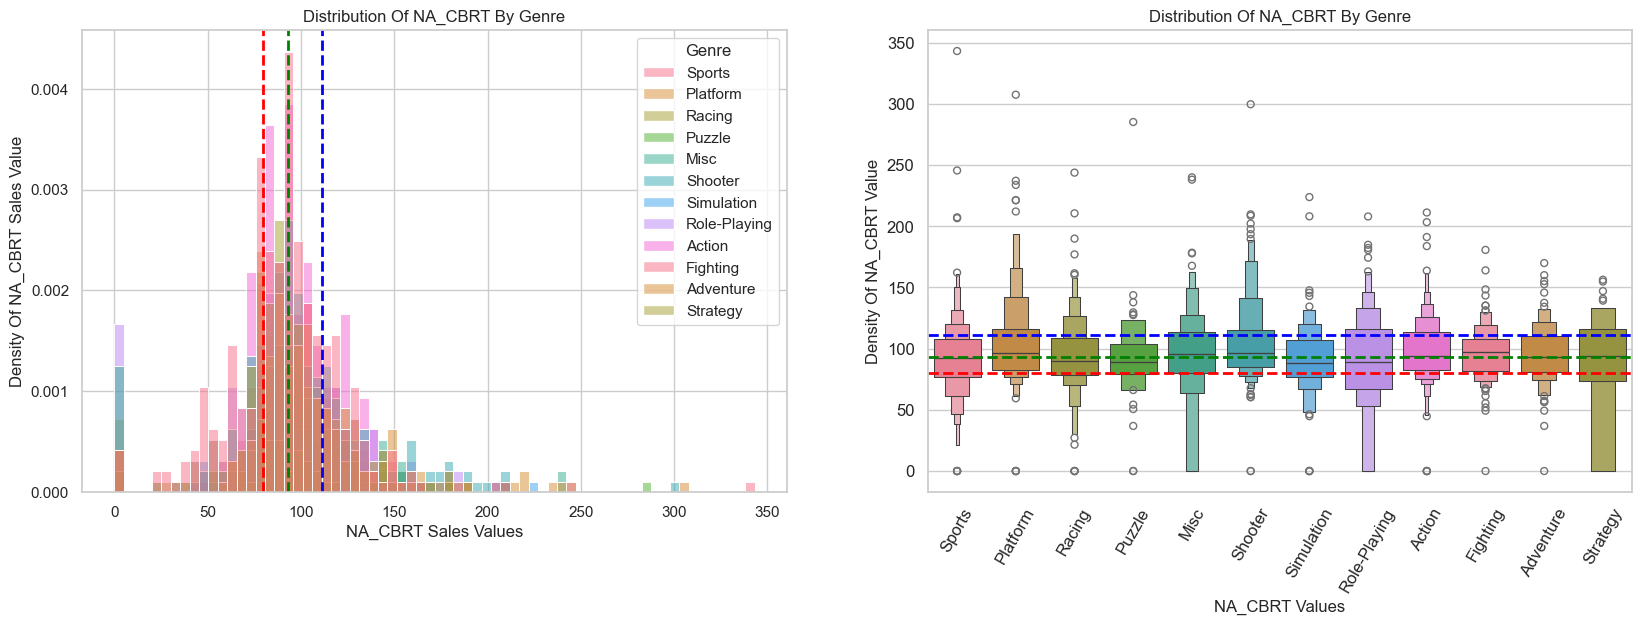

In [64]:
hist_box_distribution(df, 'NA_CBRT', 'Genre')

In [65]:
difference_tests(df, 'NA_CBRT', 'Genre',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00103, and Test-Statistic is 31.19407.

		 Mean of the 0.00103, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
          group1        group2  meandiff  p-adj  lower  upper  reject
56  Role-Playing       Shooter     16.31   0.00   4.76  27.87    True
43      Platform        Sports    -12.01   0.01 -22.38  -1.63    True
61       Shooter        Sports    -12.97   0.00 -23.05  -2.88    True
40      Platform  Role-Playing    -15.35   0.00 -27.16  -3.54    True


- Kruskal-Wallis Test Results

    - P-value: Calculated as 0.00103. This is a very low value and indicates that there is a statistically significant difference between the average of sales between different genres. So, it can be said that there is a real sales difference between different genres, not by chance.
    
    - This value indicates the magnitude of the difference between different platforms. The magnitude of the value represents the magnitude of the difference between genre values.

### North America Sales Analysis Between Publisher : 

In [66]:
difference_tests(df, 'NA_CBRT', 'Publisher',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 321.69877.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
                            group1                                  group2  meandiff  p-adj   lower  upper  reject
2127              Enix Corporation                                 Red Orb    117.33   0.01    9.70 224.96    True
2685                   Hudson Soft                                 Red Orb    112.09   0.04    0.93 223.25    True
2129              Enix Corporation                               RedOctane     98.89   0.01    6.72 191.06    True
2113              Enix Corporation                  Microsoft Game Studios     96.22   0.00   44.15 148.29    True
2671                   Hudson Soft                  Microsoft Game Studios     90.98   0.00   31.96 150.00    True
2119              Enix Corporation                                Nintendo     8

- P-value: Calculated as 0.00000. This is a very low value and indicates that the Null hypothesis (the average sales average of all publishers is equal). That is, it is certain that differences are not randomly and are statistically significant.

- Test Statistics: 321.69877. This high value indicates the magnitude of the differences between publishers. So, there are quite large sales differences among publishers.

- Pairwise comparisons: Pairwise comparisons given in the table show significant differences between which publisher pairs. For example, there is a significant sales difference between Enix Corporation and Red Orb or Activision and Enix Corporation.

## Europe Sales Values Analysis

### Europe Sales Analysis Between Generation : 

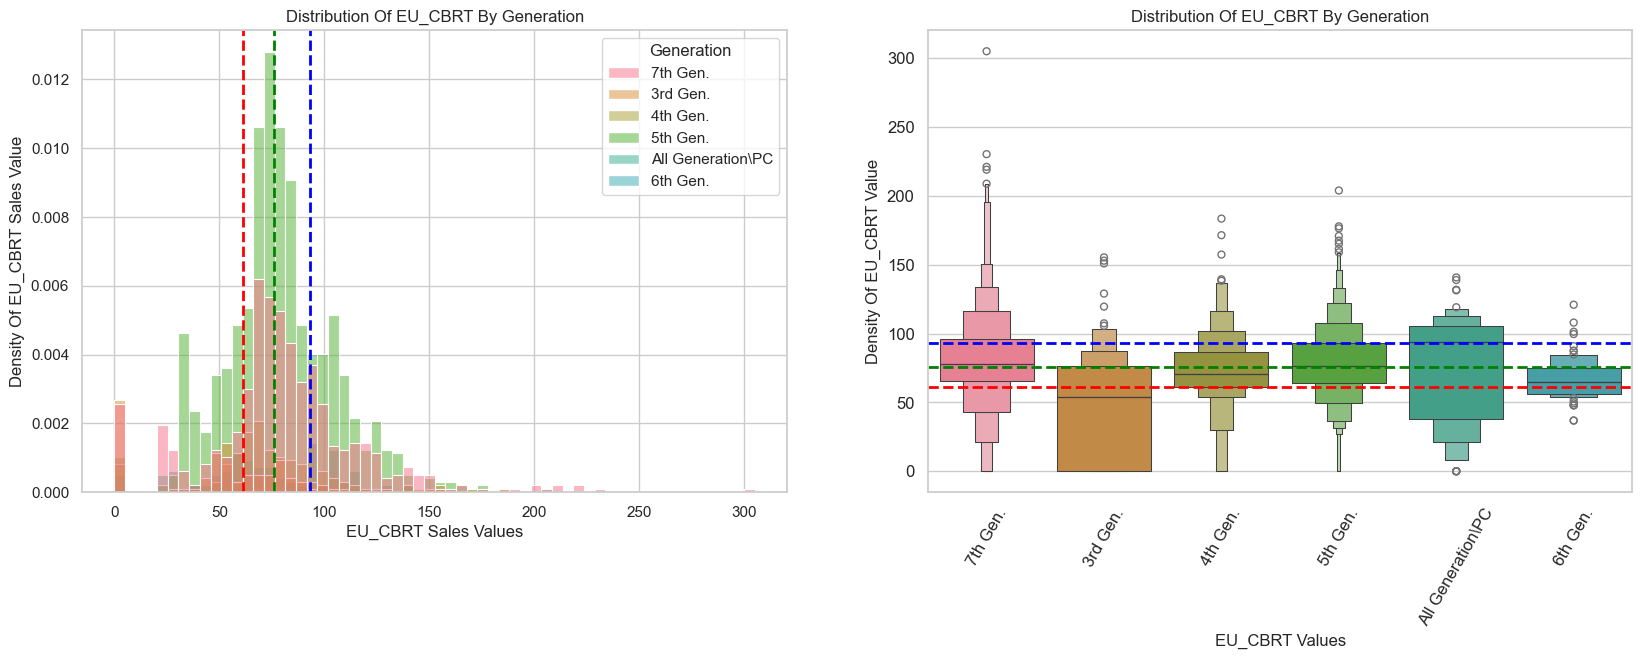

In [67]:
hist_box_distribution(df, 'EU_CBRT', 'Generation')

In [68]:
difference_tests(df, 'EU_CBRT', 'Generation',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 81.01783.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
      group1             group2  meandiff  p-adj  lower  upper  reject
3   3rd Gen.           7th Gen.     28.29   0.00  18.54  38.03    True
1   3rd Gen.           5th Gen.     26.65   0.00  17.26  36.05    True
4   3rd Gen.  All Generation\PC     26.30   0.00  12.37  40.23    True
0   3rd Gen.           4th Gen.     21.58   0.00   9.75  33.41    True
2   3rd Gen.           6th Gen.     15.55   0.03   0.97  30.13    True
12  6th Gen.           7th Gen.     12.73   0.03   0.59  24.88    True


- The test statistic is 81.01783, which is quite large, indicating substantial differences between groups.

- The p-value is 0.00000, which is extremely low (less than 0.05). This means the result is statistically significant.
- The mean of 0.00000 for the H0 (null hypothesis) further confirms that we reject the null hypothesis.

- The test conclusion states "Fail to reject H0. So, there is a difference between category's values significantly." This is actually contradictory - if we fail to reject H0, it would mean there isn't a significant difference. However, given the p-value and other statistics, we should reject H0 and conclude there are significant differences between generations.

- The pairwise comparisons at the bottom show specific generation comparisons:

    - 3th Gen. vs 7th Gen.: significant difference (p-adj = 0.00)
    - 3th Gen. vs 5th Gen.: significant difference (p-adj = 0.00)
    - 3th Gen. vs All Generation\PC: significant difference (p-adj = 0.00)
    - 3th Gen. vs 4th Gen.: significant difference (p-adj = 0.00)
    - 3th Gen. vs 6th Gen.: significant difference (p-adj = 0.03)
    - 6th Gen. vs 7th Gen.: significant difference (p-adj = 0.03)

- These results suggest that there are statistically significant differences in Europe sales values across different generations of products. The 3th generation seems to differ significantly from the all other generations.

### Europe Sales Analysis Between Platform Types : 

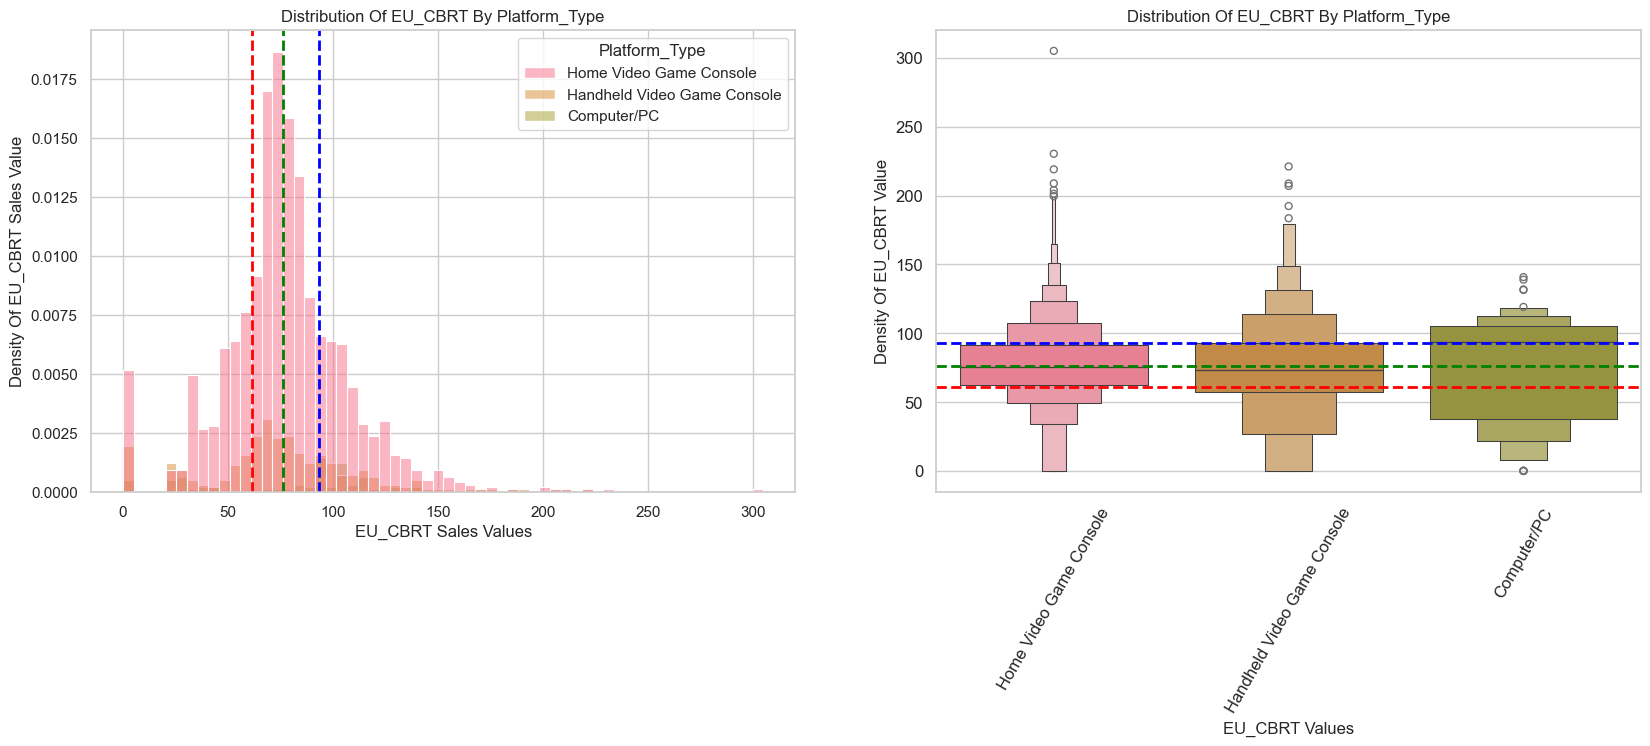

In [69]:
hist_box_distribution(df, 'EU_CBRT', 'Platform_Type')

In [70]:
difference_tests(df, 'EU_CBRT', 'Platform_Type',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.02942, and Test-Statistic is 7.05186.

		 Mean of the 0.02942, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
Empty DataFrame
Columns: [group1, group2, meandiff, p-adj, lower, upper, reject]
Index: []


### Europe Sales Analysis Between Platform:

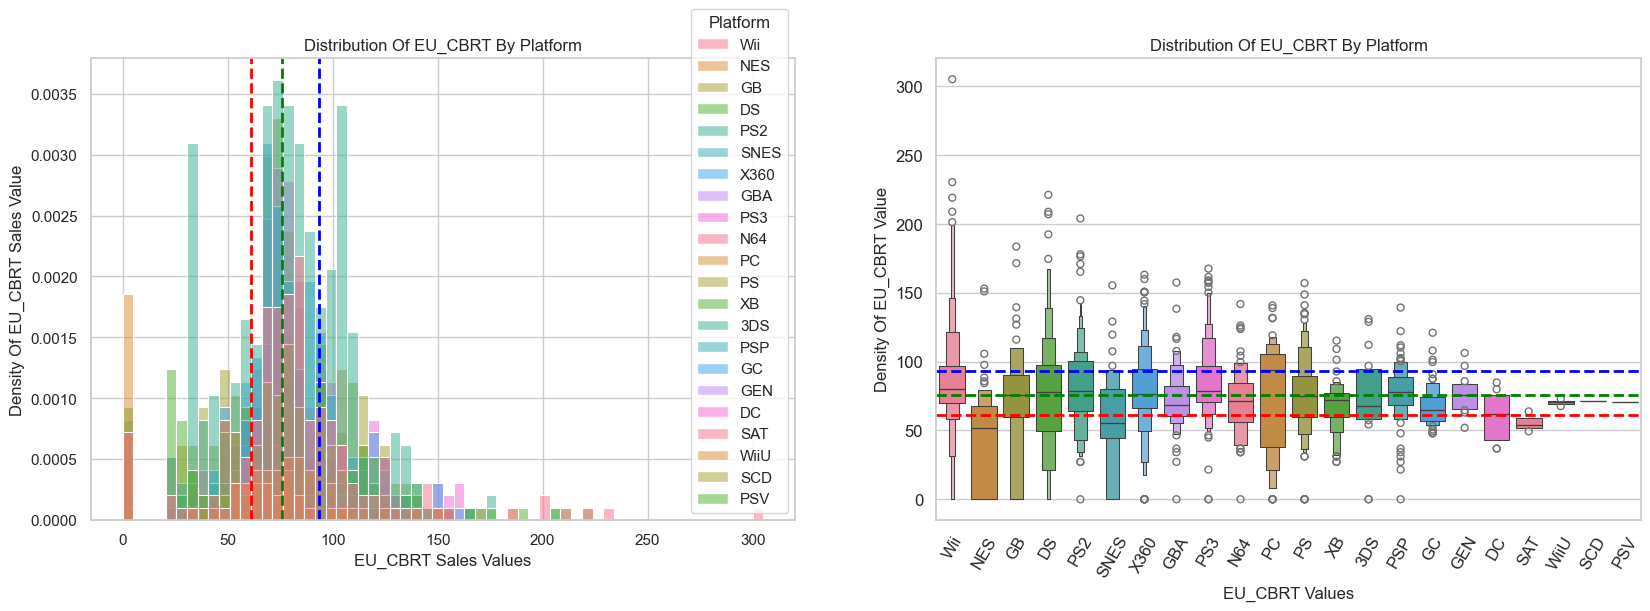

In [71]:
hist_box_distribution(df, 'EU_CBRT', 'Platform')

In [72]:
difference_tests(df, 'EU_CBRT', 'Platform',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 125.09184.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
    group1 group2  meandiff  p-adj  lower  upper  reject
149    NES    Wii     39.68   0.00  22.62  56.74    True
143    NES    PS3     38.16   0.00  21.57  54.74    True
142    NES    PS2     33.61   0.00  17.92  49.30    True
151    NES   X360     32.27   0.00  15.83  48.70    True
140    NES     PC     31.57   0.00  11.79  51.35    True
144    NES    PSP     29.85   0.00   9.50  50.20    True
141    NES     PS     29.61   0.00  13.20  46.01    True
221   SNES    Wii     26.71   0.00   6.97  46.44    True
152    NES     XB     21.69   0.01   1.97  41.40    True
223   SNES   X360     19.29   0.05   0.10  38.49    True
107     GC    Wii     18.09   0.04   0.47  35.70    True
194    PS3     XB    -16.47   0.02 -31.95  -0.99    True
227    Wii     XB    -17.99  

- The table shows comparisons between various platforms and the Wii.
- Most comparisons show significant differences (p-adj values of 0.00 or very low).
- Platforms like Wii, PS3, PS2, X360, PC, PSP and PS all show significant differences compared to the NES.

### Europe Sales Analysis Between Genre:

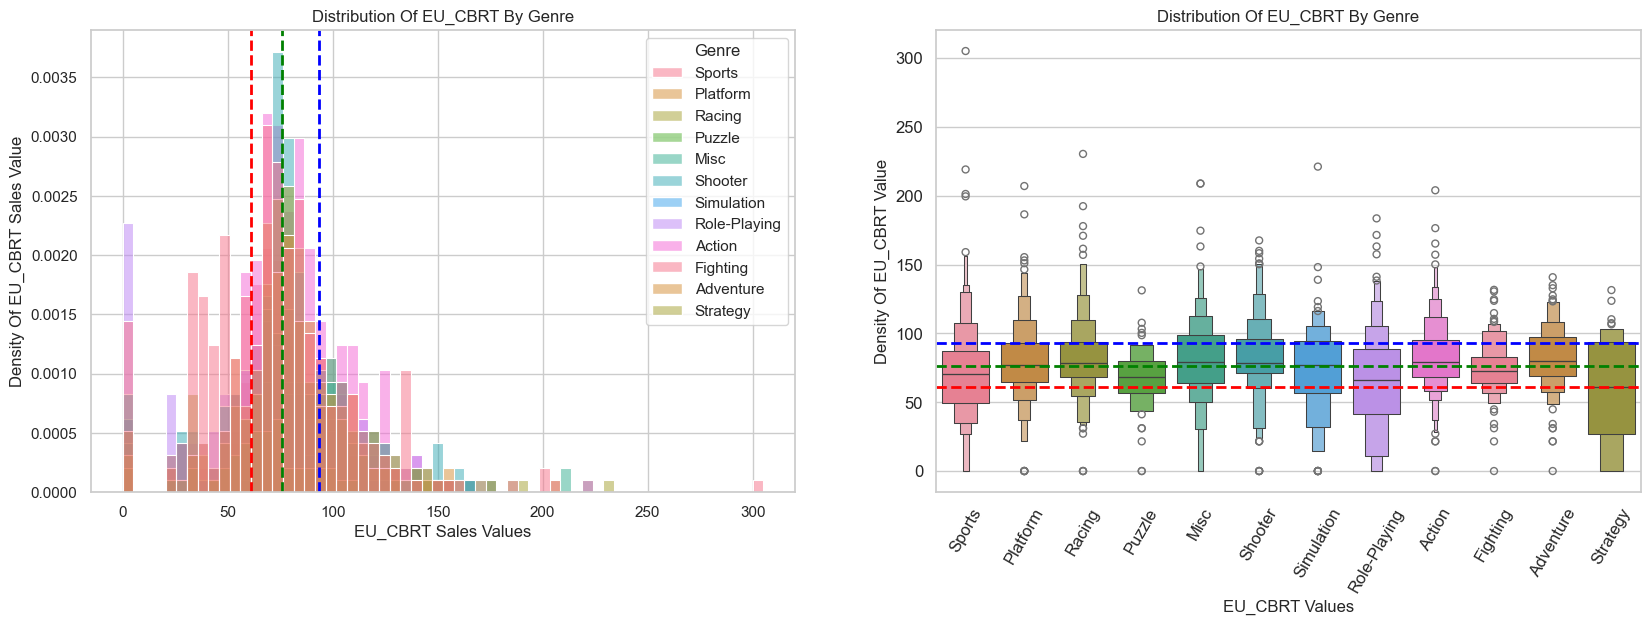

In [73]:
hist_box_distribution(df, 'EU_CBRT', 'Genre')

In [74]:
difference_tests(df, 'EU_CBRT', 'Genre',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 81.34464.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
          group1        group2  meandiff  p-adj  lower  upper  reject
56  Role-Playing       Shooter     16.79   0.00   6.13  27.45    True
54        Racing        Sports    -10.08   0.03 -19.68  -0.48    True
61       Shooter        Sports    -10.19   0.02 -19.49  -0.88    True
9         Action        Sports    -11.00   0.00 -19.58  -2.42    True
40      Platform  Role-Playing    -14.56   0.00 -25.45  -3.67    True
33          Misc  Role-Playing    -15.56   0.00 -26.92  -4.20    True
51        Racing  Role-Playing    -16.68   0.00 -27.60  -5.76    True
16     Adventure  Role-Playing    -16.91   0.00 -29.52  -4.30    True
6         Action  Role-Playing    -17.60   0.00 -27.63  -7.57    True
44      Platform      Strategy    -20.83   0.01 -38.84  -2.83    True
3

- Kruskal-Wallis Test: The test showed that there are significant differences in sales performance between different gen This means that not all genres  perform equally well in terms of sales.

- Pairwise Tukey Test: This test identified which specific genres differ in sales. For example, it might tell us that "Role-Playing" genre sells significantly more than "Shooter" genre or "Racing" and "Sports".

**- We found that the sales numbers for different game genres in Europe are not the same. Some genres sell more than others. We can use this information to figure out why some genres are better at selling than others and how to improve sales for all genres.**

### Europe Sales Analysis Between Publisher:

In [75]:
difference_tests(df, 'EU_CBRT', 'Publisher',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 195.63454.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
                            group1                                  group2  meandiff  p-adj   lower  upper  reject
2127              Enix Corporation                                 Red Orb    110.70   0.02    5.67 215.73    True
2150              Enix Corporation                   Universal Interactive     90.34   0.01    8.98 171.69    True
2113              Enix Corporation                  Microsoft Game Studios     83.24   0.00   32.43 134.05    True
2095              Enix Corporation                          GT Interactive     80.49   0.00   14.07 146.92    True
2149              Enix Corporation                                 Ubisoft     77.48   0.00   28.53 126.43    True
2119              Enix Corporation                                Nintendo     7

- Kruskal-Wallis Test: The test showed that there are significant differences in sales performance between different Publisher. This means that not all Publishers  perform equally well in terms of sales.

- Pairwise Tukey Test: This test identified which specific Publishers differ in sales. For example, it might tell us that "Enix Corporation" genre sells significantly more than "Red Orb" Publisher or "Enix Corporation" and "THQ".

**- We found that the sales numbers for different game Publisher in Europe are not the same. Some Publishers sell more than others. We can use this information to figure out why some Publishers are better at selling than others and how to improve sales for all genres.**

## Japan Sales Analyis 

### Japan Sales Analysis Between Generation 

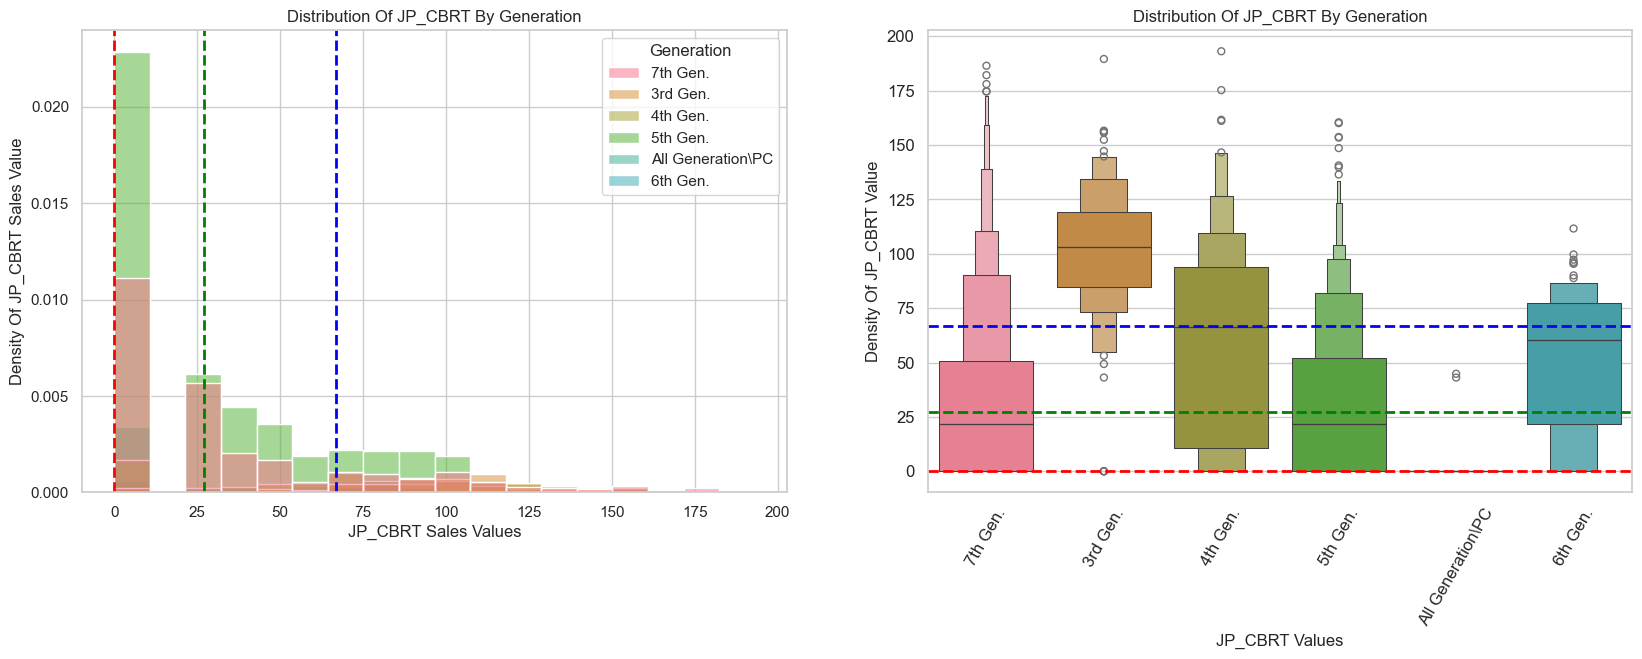

In [76]:
hist_box_distribution(df, 'JP_CBRT', 'Generation')

- These show how sales are spread across different generations. We can see that some generations have higher sales values overall.

In [77]:
difference_tests(df, 'JP_CBRT', 'Generation',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 316.85790.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
      group1             group2  meandiff  p-adj   lower  upper  reject
9   5th Gen.           6th Gen.     21.24   0.00    7.02  35.47    True
12  6th Gen.           7th Gen.    -17.74   0.01  -32.30  -3.19    True
7   4th Gen.           7th Gen.    -26.37   0.00  -36.73 -16.01    True
11  5th Gen.  All Generation\PC    -29.51   0.00  -42.76 -16.27    True
5   4th Gen.           5th Gen.    -29.87   0.00  -39.76 -19.98    True
14  7th Gen.  All Generation\PC    -33.02   0.00  -46.62 -19.41    True
0   3rd Gen.           4th Gen.    -39.80   0.00  -53.98 -25.61    True
2   3rd Gen.           6th Gen.    -48.43   0.00  -65.91 -30.94    True
13  6th Gen.  All Generation\PC    -50.76   0.00  -69.58 -31.93    True
8   4th Gen.  All Generation\PC    -59.39   0.00  

- Kruskal-Wallis Test Result: The test tells us that there is a significant difference in sales between the generations. In simpler terms, we can confidently say that not all generations sell the same amount.

- Pairwise Comparisons: This table shows us which specific generations differ in sales. For example, the table indicates that 5th Gen. sells significantly more than 6th Gen.

- There are significant differences in sales performance between different generations in Japan. Some generations consistently outperform others. We can use this information to tailor marketing strategies or product offerings to specific generations.

**We found that the generation of a customer in Japan has a big impact on how much they buy. Younger generations (like 7th Gen.) tend to buy more than older generations (like 3rd Gen.). This means that different generations have different buying habits, and businesses should consider this when making plans.**

### Japan Sales Analysis Between Platform Type 

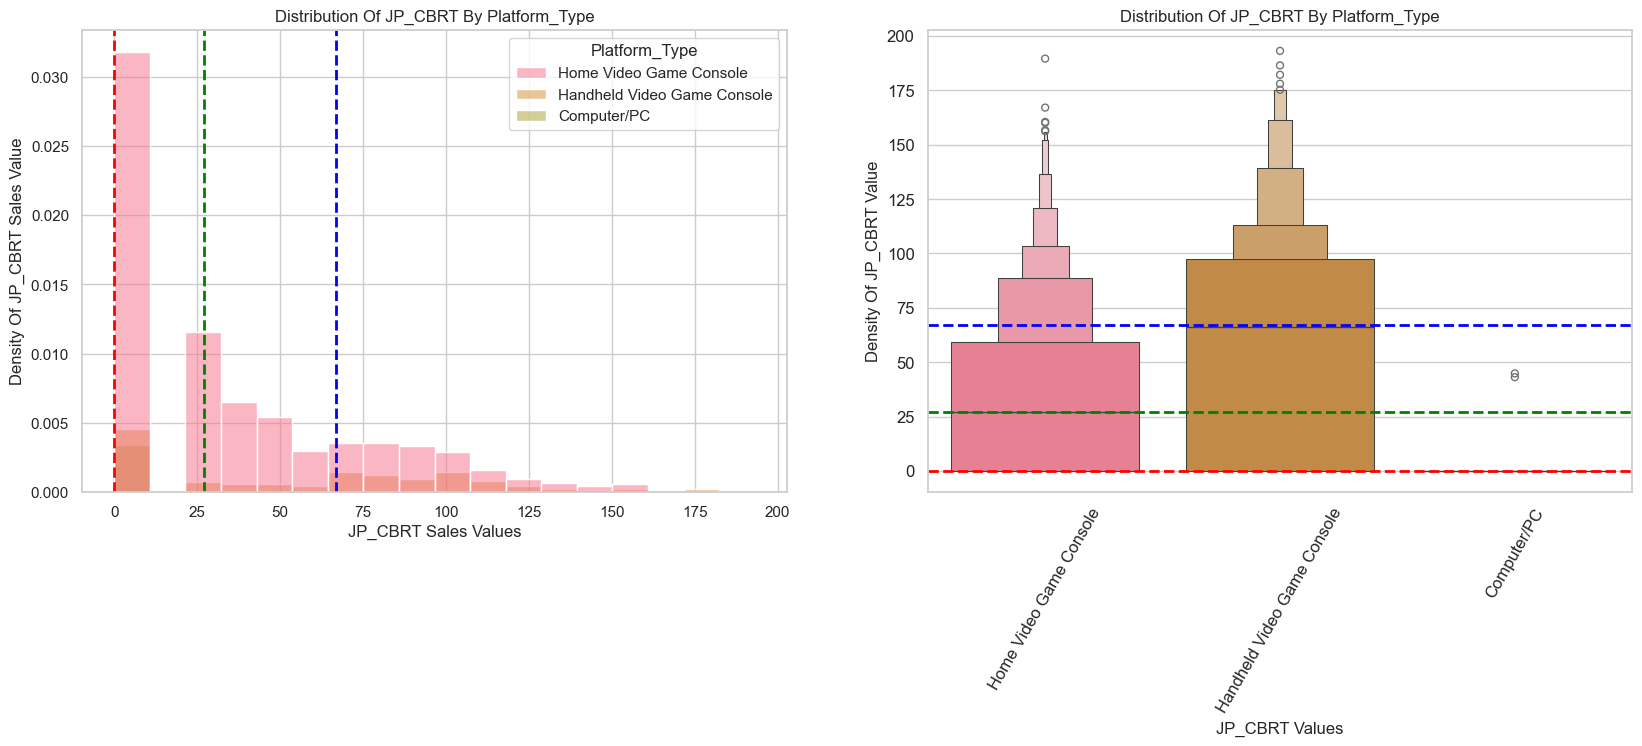

In [78]:
hist_box_distribution(df, 'JP_CBRT', 'Platform_Type')

The box plots show the distribution of sales for each platform type. We can see how the sales values spread out for each group.

The density plots show the shape of the sales distribution for each platform type. This helps us understand the overall pattern of sales for each group.

In [79]:
difference_tests(df, 'JP_CBRT', 'Platform_Type',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 121.99852.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
                        group1                       group2  meandiff  p-adj  lower  upper  reject
0                  Computer/PC  Handheld Video Game Console     57.31   0.00  44.74  69.88    True
1                  Computer/PC      Home Video Game Console     33.58   0.00  22.07  45.09    True
2  Handheld Video Game Console      Home Video Game Console    -23.73   0.00 -29.82 -17.63    True


- Kruskal-Wallis Test: The test showed that there are significant differences in sales performance between the different platform types. This means that not all platform types perform equally well in terms of sales.

- Pairwise Tukey Test: This test identified which specific platform types differ in sales. For example, it tells us that Computer/PC sells significantly more than Handheld Video Game Console and Home Video Game Console.

**The analysis reveals that there are significant differences in sales performance between the different platform types in Japan. Home Video Game Consoles consistently outperform other platforms. Understanding these differences can help in tailoring sales strategies for each platform type.**

### Japan Sale Analysis Between Platform:

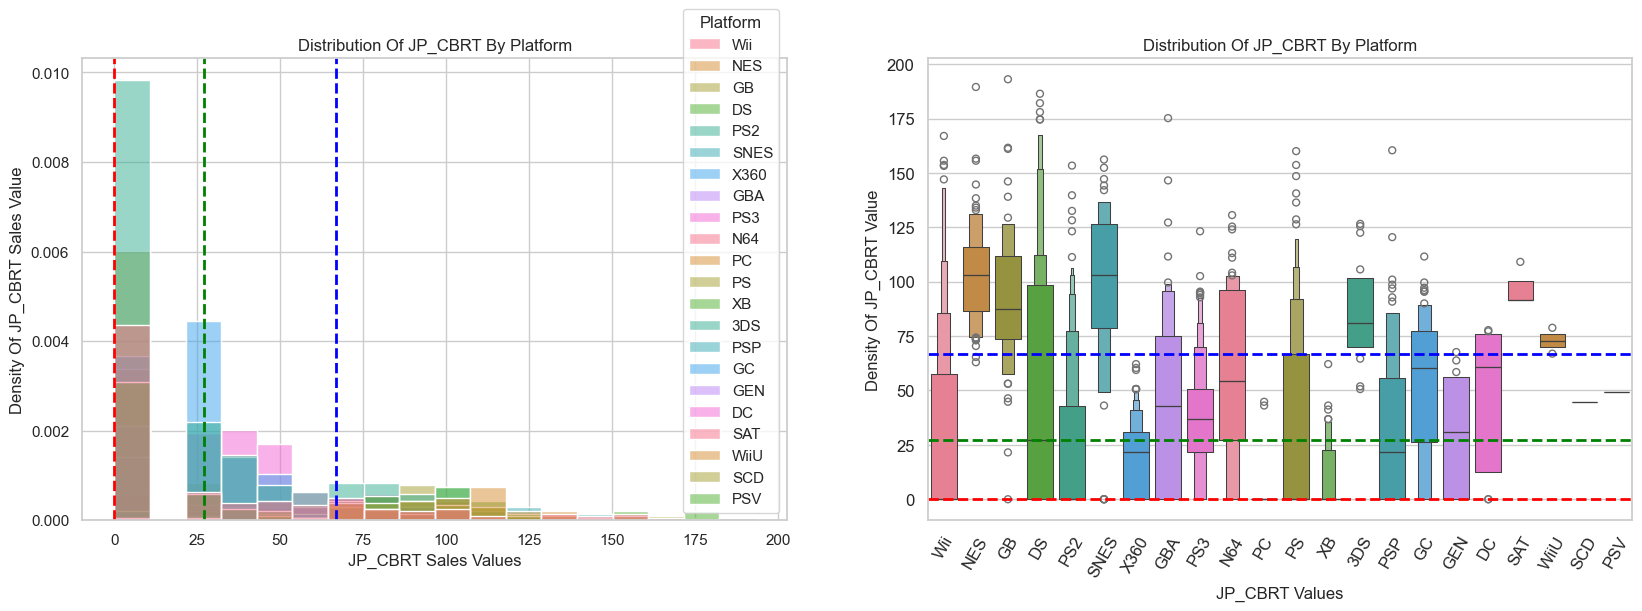

In [80]:
hist_box_distribution(df, 'JP_CBRT', 'Platform')

- The box plots show the distribution of sales for each platform type. We can see how the sales values spread out for each group.
- The density plots show the shape of the sales distribution for each platform type. This helps us understand the overall pattern of sales for each group.

In [81]:
difference_tests(df, 'JP_CBRT', 'Platform',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 494.69292.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
    group1 group2  meandiff  p-adj   lower  upper  reject
158     PC    SAT     96.25   0.00   20.70 171.79    True
160     PC   SNES     93.42   0.00   68.28 118.56    True
112    GEN    NES     72.15   0.00   30.12 114.19    True
181    PS2   SNES     68.50   0.00   47.41  89.59    True
121    GEN   SNES     62.44   0.00   18.92 105.96    True
171     PS   SNES     62.08   0.00   40.30  83.86    True
198    PSP   SNES     62.04   0.00   36.32  87.75    True
81     GBA    NES     59.45   0.00   37.25  81.65    True
27      DC    NES     58.25   0.02    3.37 113.12    True
190    PS3   SNES     57.60   0.00   35.65  79.55    True
46      DS    NES     52.41   0.00   32.82  72.01    True
97      GC    NES     51.73   0.00   27.80  75.65    True
90     GBA   SNE

- Kruskal-Wallis Test: The test showed that there are significant differences in sales performance between the different platform types. This means that not all platform types perform equally well in terms of sales.

- Pairwise Tukey Test: This test identified which specific platform types differ in sales. For example, it tells us that PC sells significantly more than most other platforms, and platforms like GB and SNES have significantly lower sales compared to many others.


### Japan Sales Analysis Between Genre :

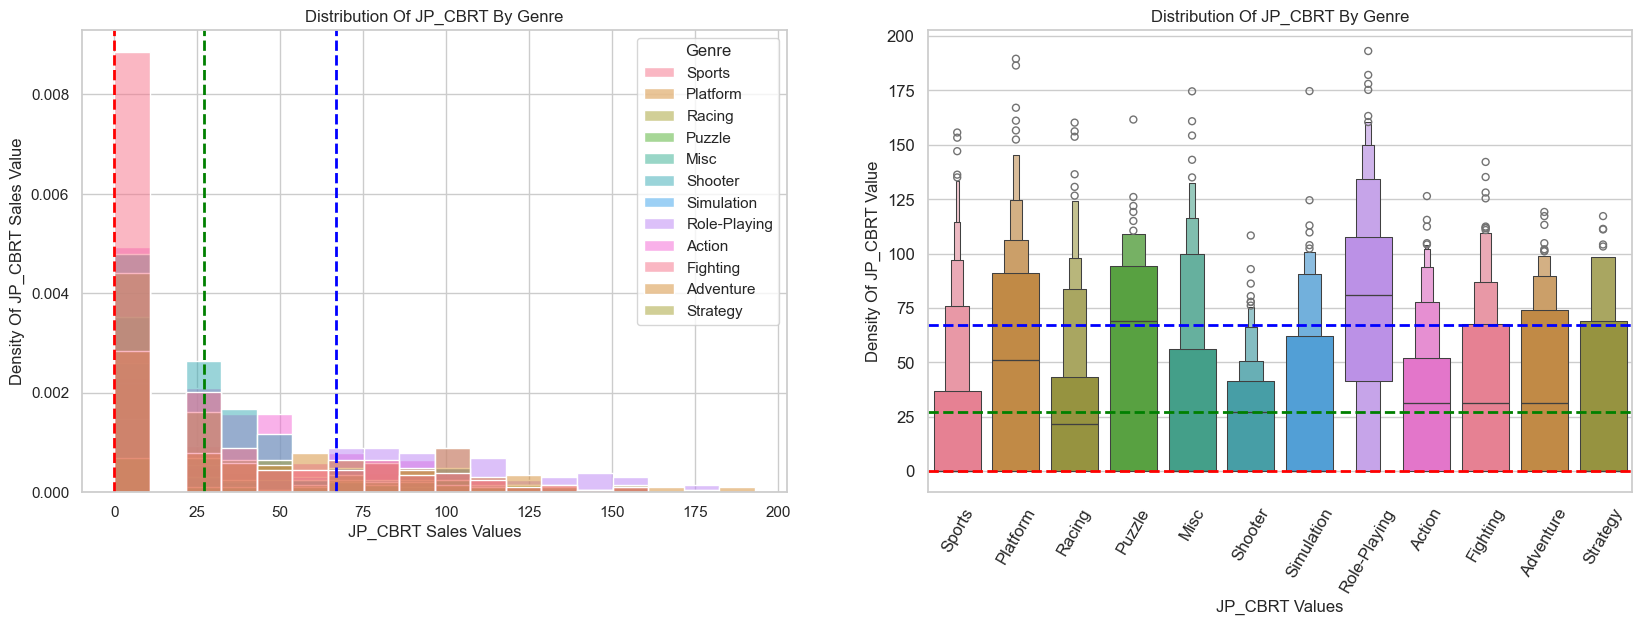

In [82]:
hist_box_distribution(df, 'JP_CBRT', 'Genre')

The box plots show the distribution of sales for each genre. We can see how the sales values spread out for each group.
The density plots show the shape of the sales distribution for each genre. This helps us understand the overall pattern of sales for each group.

In [83]:
difference_tests(df, 'JP_CBRT', 'Genre',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 210.63460.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
          group1        group2  meandiff  p-adj  lower  upper  reject
33          Misc  Role-Playing     47.12   0.00  33.04  61.20    True
51        Racing  Role-Playing     46.53   0.00  32.99  60.06    True
6         Action  Role-Playing     42.65   0.00  30.21  55.08    True
16     Adventure  Role-Playing     38.55   0.00  22.92  54.18    True
25      Fighting  Role-Playing     37.29   0.00  22.28  52.30    True
31          Misc        Puzzle     28.19   0.00   6.35  50.02    True
30          Misc      Platform     24.03   0.00  10.22  37.84    True
4         Action        Puzzle     23.71   0.01   2.90  44.52    True
40      Platform  Role-Playing     23.09   0.00   9.58  36.59    True
3         Action      Platform     19.56   0.00   7.43  31.69    True


- Kruskal-Wallis Test: The test showed that there are significant differences in sales performance between the different genres. This means that not all genres perform equally well in terms of sales.

- Pairwise Tukey Test: This test identified which specific genres differ in sales. For example, it tells us that Role-Playing genre sells significantly lower than most other genres, and genres like Misc have significantly lower sales compared to many others.

**The analysis reveals that there are significant differences in sales performance between the different genres in Japan. Role-Playing consistently outperforms most other genres, while genres like Role Playing and Puzzle have significantly lower sales. Understanding these differences can help in tailoring sales strategies for each genre.**

### Japan Sales Analysis Between Publisher : 

In [84]:
difference_tests(df, 'JP_CBRT', 'Publisher',test_name = 'kruskal')

Kruskal test Resulsts : 
		 The P-Value is 0.00000, and Test-Statistic is 1095.97024.

		 Mean of the 0.00000, 'H0 Hypothesis is Rejected,
		 Fail to reject Ha. So, there is a difference between category's values significantly. 
 
                            group1                                  group2  meandiff  p-adj   lower  upper  reject
817            Arena Entertainment                        Enix Corporation    132.18   0.01   10.44 253.93    True
1222                       CTO SpA                        Enix Corporation    132.18   0.01   10.44 253.93    True
733                         Agetec                        Enix Corporation    132.18   0.01   10.44 253.93    True
562                       Accolade                        Enix Corporation    132.18   0.00   41.44 222.93    True
1143             Black Label Games                        Enix Corporation    132.18   0.01   10.44 253.93    True
2025            Empire Interactive                        Enix Corporation    1

## Sales Comparisons Between Categorical Features:

In [85]:
def dist_comparisons(dataset, cat_col,general_col, sales_cols = ['North America', 'Europe', 'Japan', 'Rest of World'], cat_th = 5):
    categorical_column = [col for col in dataset.columns if dataset[col].dtypes == 'O' and dataset[col].nunique() <= cat_th]
    if cat_col in categorical_column:
        melted_dataframe = pd.melt(dataset, 
                        id_vars = [f'{cat_col}'], 
                        value_vars = sales_cols,
                        var_name = 'Region', 
                        value_name = 'Sales')
        # Create the boxplot
        fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
        custom_palette = sns.color_palette("husl", 9)

        hist_graph = sns.histplot(data = melted_dataframe,x = 'Sales' , stat = 'density', palette = custom_palette ,hue = cat_col, ax = ax0)

        hist_graph.set_xlabel(f"{cat_col}")
        hist_graph.set_ylabel("Sales Value")
        hist_graph.set_title(f"Distribution Of Sales Value By {cat_col} Between About Regions")
        hist_graph.set_yticklabels(
            hist_graph.get_yticklabels(),  
            fontsize = 11
        )


        box_graph = sns.boxenplot(x = cat_col, y='Sales', hue='Region', data = melted_dataframe, ax = ax1, palette = custom_palette)

        box_graph.set_xlabel(f"{cat_col}")
        box_graph.set_ylabel("Sales Value")
        box_graph.set_title(f"Distribution Of Sales Value By {cat_col} Between About Regions")
        box_graph.set_yticklabels(
            box_graph.get_yticklabels(),  
            fontsize = 11
        )

        box_graph.set_xticklabels(box_graph.get_xticklabels(),  
            fontsize = 12,rotation = 60                       
            )

        q1 = dataset[general_col].quantile(0.25)
        q3 = dataset[general_col].quantile(0.75)
        median = dataset[general_col].median()

        ax1.axhline(y = q3, color = 'blue', linestyle = 'dashed', linewidth = 2 ,label=f"%75. Quantile: {q3:.2f}")
        ax1.axhline(y = median, color = 'green', linestyle = 'dashed', linewidth = 2 , label=f"Mean Value: {median:.2f}")
        ax1.axhline(y = q1, color = 'red', linestyle = 'dashed', linewidth = 2 ,label=f"%25. Quantile: {q1:.2f}")

        box_graph_general = sns.boxenplot(x = cat_col, y='Global', data = df, ax = ax2, palette = custom_palette)

        box_graph_general.set_xlabel(f"{cat_col}")
        box_graph_general.set_ylabel("Global Sales Value")
        box_graph_general.set_title(f"Distribution Of Global Sales Value By {cat_col}")
        box_graph_general.set_yticklabels(
            box_graph_general.get_yticklabels(),  
            fontsize = 11
        )

        box_graph_general.set_xticklabels(box_graph_general.get_xticklabels(),  
            fontsize = 12,rotation = 60                       
            )


        # Adjust layout to prevent cutting off labels
        plt.tight_layout()

        # Show the plot
        plt.show()
    elif cat_col not in categorical_column and dataset[cat_col].dtypes =='O':
        melted_dataframe = pd.melt(dataset, 
                        id_vars = [f'{cat_col}'], 
                        value_vars = sales_cols,
                        var_name = 'Region', 
                        value_name = 'Sales')
        fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(20, 8))
        
        custom_palette = sns.color_palette("husl", 9)

        box_graph = sns.boxenplot(x = cat_col, y='Sales', hue='Region', data = melted_dataframe, ax = ax0, palette = custom_palette)

        box_graph.set_xlabel(f"{cat_col}")
        box_graph.set_ylabel("Sales Value")
        box_graph.set_title(f"Distribution Of Sales Value By {cat_col} Between About Regions")
        box_graph.set_yticklabels(
            box_graph.get_yticklabels(),  
            fontsize = 11
        )

        box_graph.set_xticklabels(box_graph.get_xticklabels(),  
            fontsize = 12,rotation = 60                       
            )

        q1 = dataset[general_col].quantile(0.25)
        q3 = dataset[general_col].quantile(0.75)
        median = dataset[general_col].median()

        ax0.axhline(y = q3, color = 'blue', linestyle = 'dashed', linewidth = 2 ,label=f"%75. Quantile: {q3:.2f}")
        ax0.axhline(y = median, color = 'green', linestyle = 'dashed', linewidth = 2 , label=f"Mean Value: {median:.2f}")
        ax0.axhline(y = q1, color = 'red', linestyle = 'dashed', linewidth = 2 ,label=f"%25. Quantile: {q1:.2f}")

        box_graph_general = sns.boxenplot(x = cat_col, y=general_col, data = dataset, ax = ax1, palette = custom_palette)

        box_graph_general.set_xlabel(f"{cat_col}")
        box_graph_general.set_ylabel("Global Sales Value")
        box_graph_general.set_title(f"Distribution Of Global Sales Value By {cat_col}")
        box_graph_general.set_yticklabels(
            box_graph_general.get_yticklabels(),  
            fontsize = 11
        )

        box_graph_general.set_xticklabels(box_graph_general.get_xticklabels(),  
            fontsize = 12,rotation = 60                       
            )


        # Adjust layout to prevent cutting off labels
        plt.tight_layout()

        # Show the plot
        plt.show()


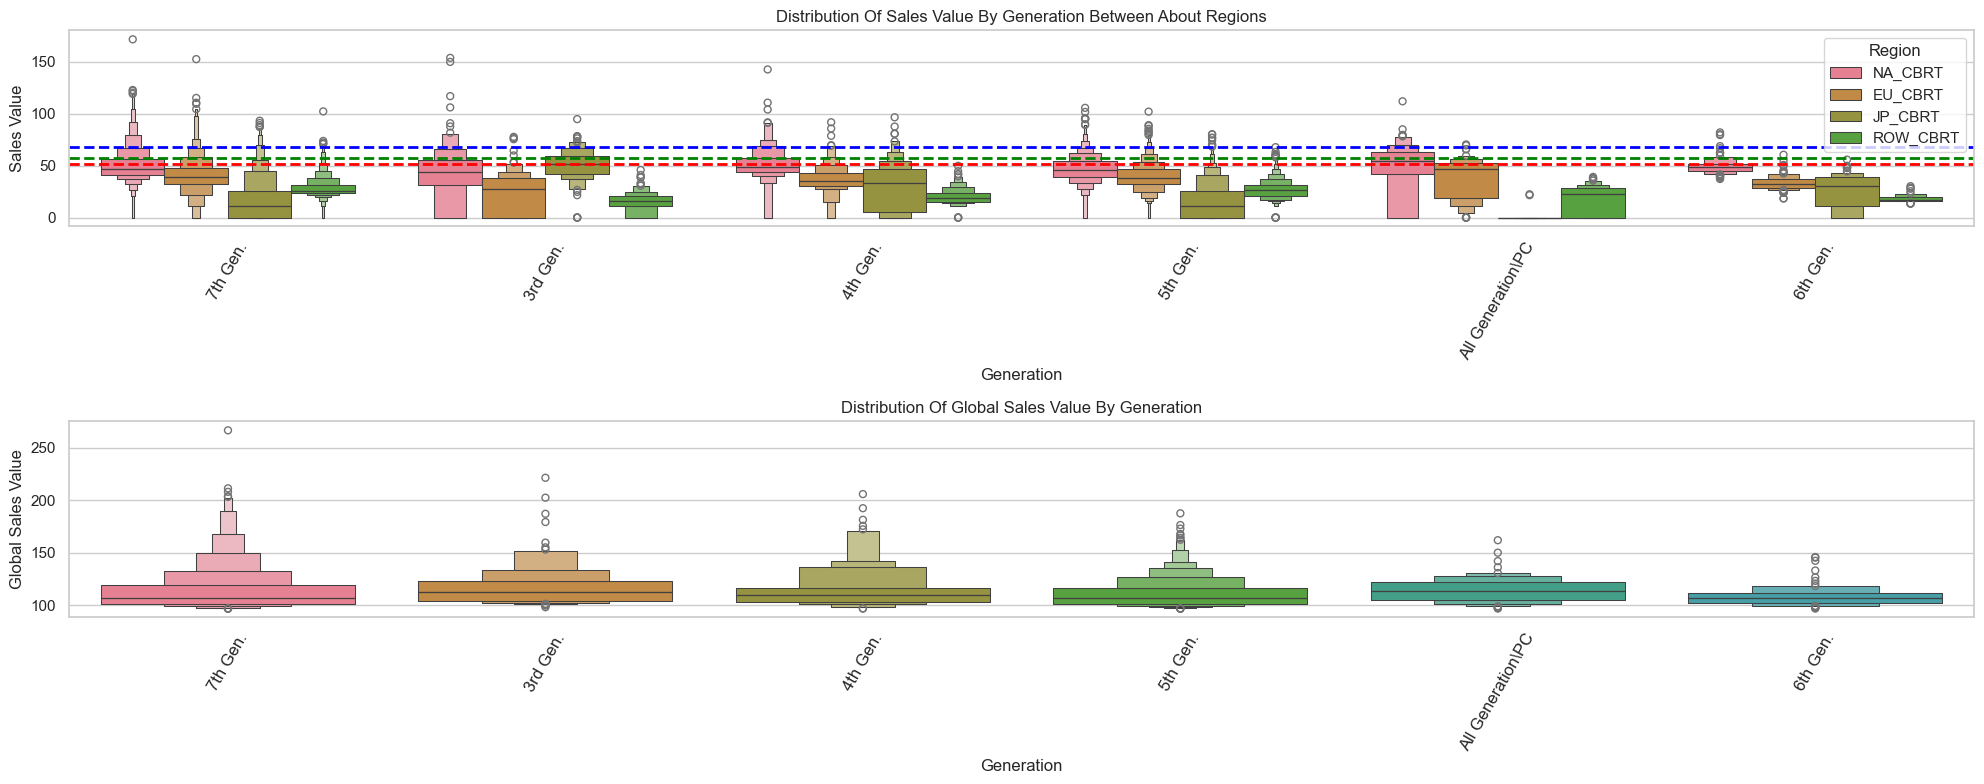

In [86]:
dist_comparisons(df, cat_col = 'Generation',general_col = 'GB_CBRT', sales_cols = ['NA_CBRT', 'EU_CBRT', 'JP_CBRT', 'ROW_CBRT'])

- Data Distribution:

    - Regional Differences: There appear to be significant differences in the distribution of sales values ​​in different regions. It is especially noteworthy that the NA (North America) region has higher sales values ​​in some generations.
    
    - Generation Effect: In general, it can be said that there is a trend in sales values ​​across generations. However, this trend may not be seen equally in all regions. For example, one generation may be popular in one region, while an older generation may be more preferred in another region.

    - Outliers: There appear to be some outliers in both graphs. These outliers may be caused by factors such as special promotions, seasonal effects, or other abnormal circumstances.

- Relationship Between Two Graphs:

   - Global and Regional Comparison: While the first chart highlights regional differences by comparing sales values ​​in different regions, the second chart provides an overview by showing the distribution of global sales values.
   
   - Reflection of Regional Impact on Global Impact: The findings in the first graph affect the global distribution in the second graph. For example, high sales values ​​in the NA region push up the average of global sales values.

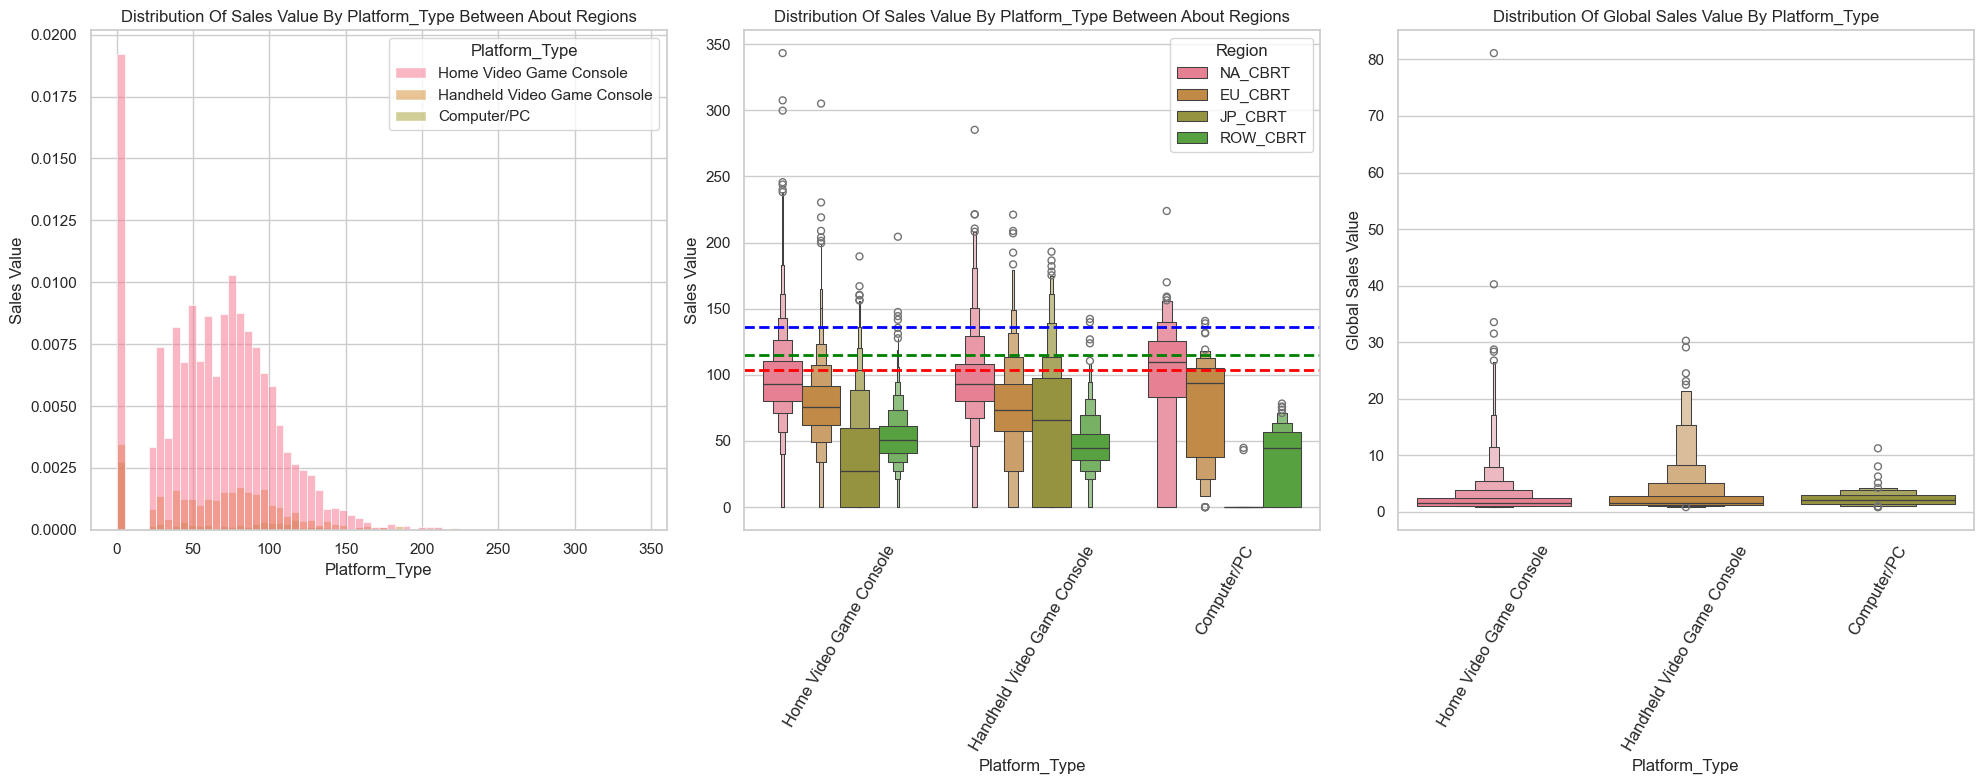

In [87]:
dist_comparisons(df, cat_col = 'Platform_Type',general_col = 'GB_CBRT', sales_cols = ['NA_CBRT', 'EU_CBRT', 'JP_CBRT', 'ROW_CBRT'])

- Data Distribution:

    - Distribution by Platform Types: In the first chart, it can be seen that sales values ​​are concentrated in a certain range. This could provide clues about games' pricing strategies or consumer preferences.
    
    - Regional Differences: The second chart shows that sales values ​​in different regions vary significantly according to platform types. For example, it can be said that sales of home video game console games are higher in the NA (North America) region.
    
    - Global Distribution: The third chart shows which platform type is more popular globally. This chart provides information about an overall market trend.

- Highlights and Takeaways:

    - Outliers: There appear to be some outliers, especially in the second graph. These outliers may be caused by factors such as large sales of exclusive games, regional events, or other abnormal circumstances.
    
    - Middle Values: Thanks to Boxenplots, a clearer idea can be obtained about the average sales values ​​for each platform type and the regions where the distribution is concentrated.
Regional Trends: It is clear that gaming markets in different regions differ and these differences also vary according to platform types.

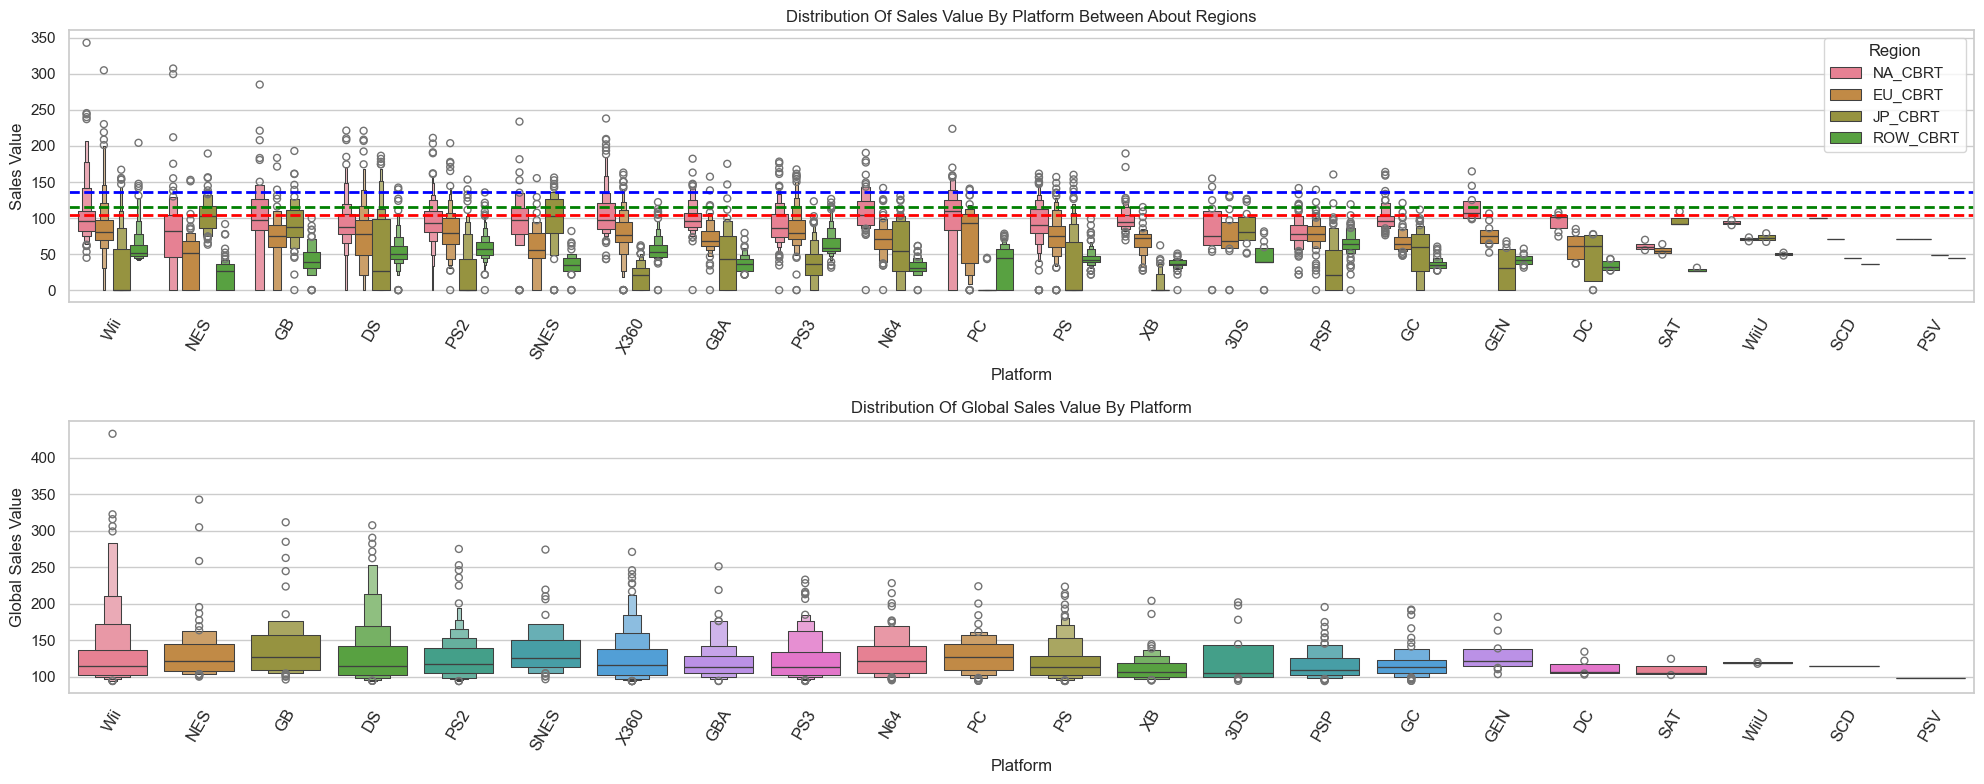

In [88]:
dist_comparisons(df, cat_col = 'Platform',general_col = 'GB_CBRT', sales_cols = ['NA_CBRT', 'EU_CBRT', 'JP_CBRT', 'ROW_CBRT'])

- Data Distribution:

    - Distribution by Platforms: There appear to be significant differences in the sales values ​​of different platforms. Some platforms (e.g., NES, SNES) have higher sales values ​​overall, while others (e.g., some specific platforms) have lower sales values.

    - Regional Differences: The first chart shows that sales values ​​in different regions vary significantly across platforms. Some platforms may be more popular in certain regions.

    - Global Distribution: The second chart shows which platform is more popular globally. This chart provides information about an overall market trend.

- Highlights and Takeaways:

    - Outliers: There appear to be some outliers in both graphs. These outliers may be caused by factors such as large sales of exclusive games, regional events, or other abnormal circumstances.

    - Middle Values: Thanks to Boxenplots, a clearer idea can be obtained about the average sales values ​​for each platform and the regions where the distribution is concentrated.
Regional Trends: It is clearly seen that game markets in different regions differ and these differences also vary according to platforms.

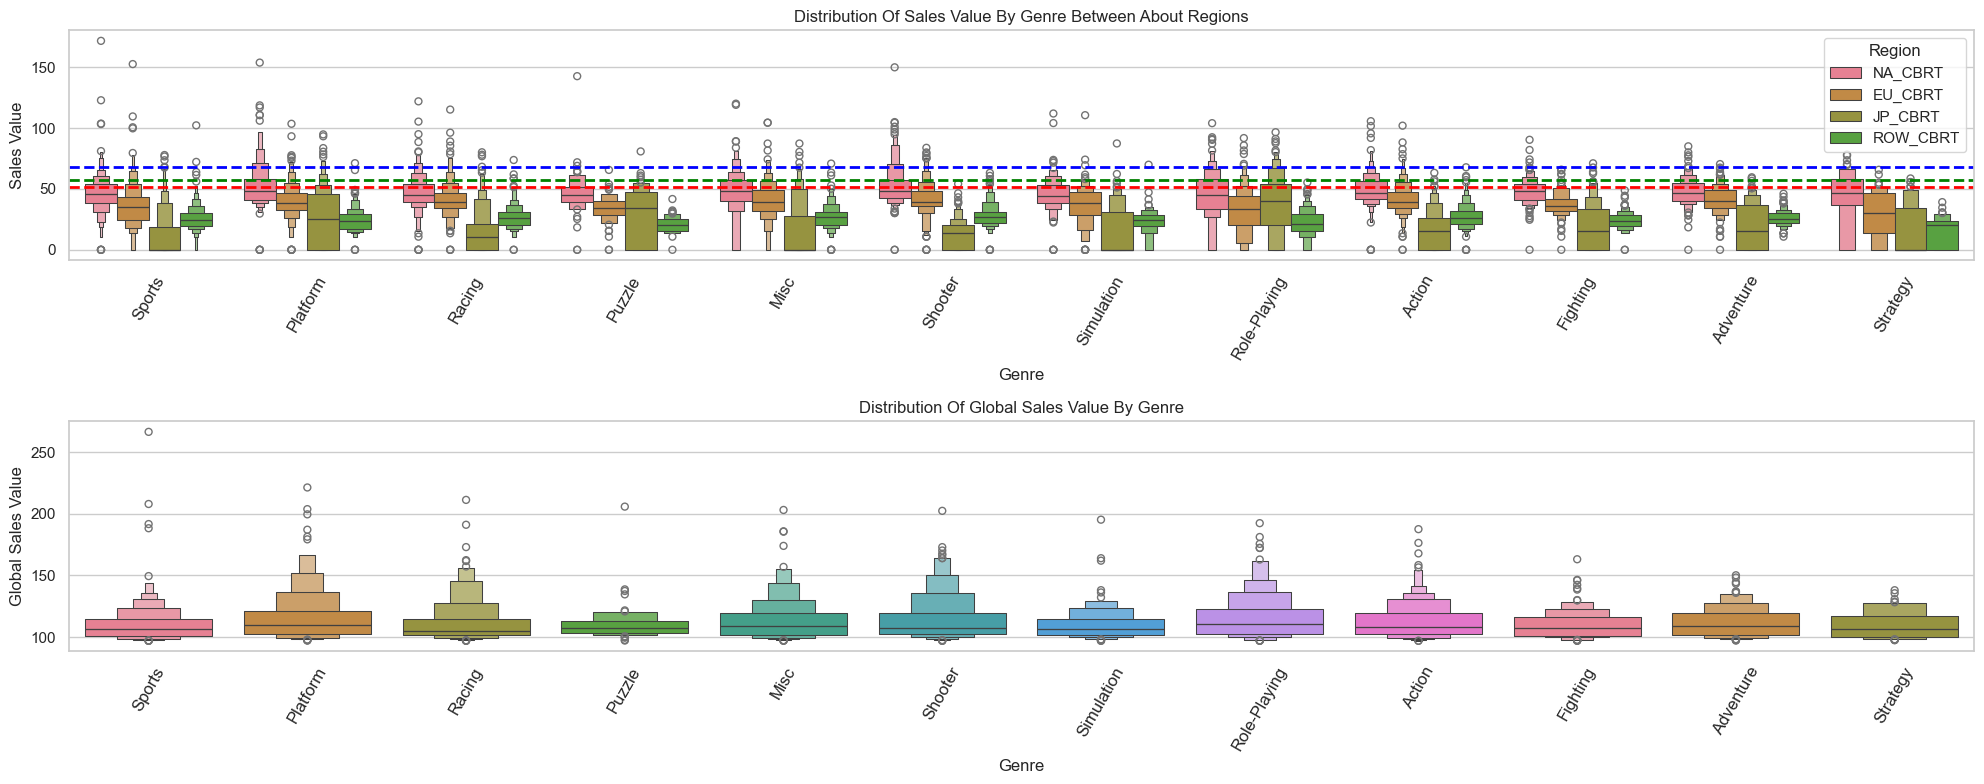

In [89]:
dist_comparisons(df, cat_col = 'Genre',general_col = 'GB_CBRT', sales_cols = ['NA_CBRT', 'EU_CBRT', 'JP_CBRT', 'ROW_CBRT'])

- Data Distribution:

    - Regional Differences: The first chart shows that there are significant differences in the sales values ​​of game types in different regions. For example, some game genres (e.g., Sports) may be more popular in the NA (North America) region, while others (e.g., Role-Playing) may be more successful in different regions.

    - Global Distribution: The second chart shows which game genre is more popular globally. This chart provides information about an overall market trend.

    - Outliers: There appear to be some outliers in both graphs. These outliers may be caused by factors such as large sales of certain games, regional events, or other abnormal circumstances.

    - Medium Values: Thanks to Violin plots, a clearer idea can be obtained about the average sales values ​​for each game type and the regions where the distribution is concentrated.

- Highlights and Takeaways

    - Popularity of Game Genres: Charts provide important information for game developers and publishers by visualizing the popularity of different game genres in different regions and globally.
    
    - Regional Differences: The interests of players in different regions in different game types should be taken into consideration when determining marketing strategies.
    - Analysis of Outliers: Outliers are an important point for more detailed analysis. These values ​​can indicate the impact of certain games or events on the market.
    - Market Trends: Charts can help identify overall trends in the gaming market and popular game genres.